# Final Project: Comparative Sentiment Analysis in Traditional vs. Digital Banking: The Case of Deutsche Bank and N26

By Nanmanat Disayakamonpan

*Text Analysis and Natural Language Processing, Constructor University*

# Table of Contents

<a href='#sdc'>1. Sample, Data, Corpus</a>

- 1.1 Importing Libraries

- 1.2 Web Scraping for Extracting Data

- 1.3 Understanding the Data

- 1.4 Checking Missing Values

<a href='#ds'>2. Descriptive Statistics</a>

- 2.1 Exploratory Data Analysis (EDA)

- 2.2 Text Exploratory before Preprocessing Steps

- 2.3 Preprocessing Steps for Text Analysis

<a href='#mm'>3. Main Analysis and Methodology</a>

- 3.1 Text Mining after Preprocessing Steps

- 3.2 Topic Modeling

- 3.3 Clustering Classification

- 3.4 Employee Sentiment Analysis
                
<a href='#r'>4. Results</a>

<a href='#clo'>5. Conclusions, Limitations, and Outlook</a>

<a href='#ref'>6. References</a>

# 1. Sample, Data, Corpus <a id="sdc"></a>

## 1.1 Importing Libraries 

I imported essential Python libraries for data analysis, natural language processing (NLP), machine learning, and visualization.

In [4]:
# Data Analysis: 
import pandas as pd

# Numerical Computing/Mathematical Operations: 
import numpy as np 

# Data Visualization: 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Natural Language Processing (NLP):
import re # for regular expressions.
import textblob # for simple NLP tasks like sentiment analysis.
import nltk # for NLP tasks such as tokenization and part-of-speech tagging
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
import spacy # for efficient NLP processing and pre-trained models
import gensim # for topic modeling and document similarity
from gensim.corpora import Dictionary # for topic modeling
from gensim.models.ldamodel import LdaModel # for topic modeling 

# Machine Learning: 
import sklearn # for machine learning algorithms and evaluation metrics

# Other Utilities:
import warnings #  for handling warning messages.
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup # for web scraping
from wordcloud import WordCloud # for word cloud generation
from transformers import pipeline # for Hugging Face's transformers.
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # for converting text data into numerical features
from collections import Counter # for calculating the frequency of elements in a collection.
from sklearn.cluster import KMeans # for clustering
from sklearn.metrics import silhouette_score # for evaluation metrics
from spacy.lang.en import English # for tokenizing English text.
from spacy.lang.en.stop_words import STOP_WORDS # A set of common stop words are often filtered out during text processing tasks.

## 1.2 Web Scraping for Extracting Data

The qualitative data source for this study consists of employee reviews extracted by web scraping from ***the Glassdoor platform***, representing two distinct entities within the financial sector: **Deutsche Bank, a traditional banking institution, and N26, a prominent FinTech company.** 

In [5]:
# Define the file paths for the HTML files
html_files = [
    'DataDE/Deutsche_Bank_Reviews1.html',
    'DataDE/Deutsche_Bank_Reviews2.html',
    'DataDE/Deutsche_Bank_Reviews3.html',
    'DataDE/Deutsche_Bank_Reviews4.html',
    'DataDE/Deutsche_Bank_Reviews5.html',
    'DataDE/Deutsche_Bank_Reviews6.html',
    'DataDE/Deutsche_Bank_Reviews7.html',
    'DataDE/Deutsche_Bank_Reviews8.html',
    'DataDE/Deutsche_Bank_Reviews9.html',
    'DataDE/Deutsche_Bank_Reviews10.html',
    'DataDE/Deutsche_Bank_Reviews11.html',
    'DataDE/Deutsche_Bank_Reviews12.html',
    'DataDE/Deutsche_Bank_Reviews13.html',
    'DataDE/Deutsche_Bank_Reviews14.html',
    'DataDE/Deutsche_Bank_Reviews15.html',
    'DataDE/Deutsche_Bank_Reviews16.html',
    'DataDE/Deutsche_Bank_Reviews17.html',
    'DataDE/Deutsche_Bank_Reviews18.html',
    'DataDE/Deutsche_Bank_Reviews19.html',
    'DataDE/Deutsche_Bank_Reviews20.html'
]

# Function to extract data from a single HTML file
def extract_data_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    employee_titles, locations, pros, cons, ratings = [], [], [], [], []
    for tag in soup.find_all(class_="review-details_employee__MeSp3"):
        employee_titles.append(tag.text.strip() if tag else "null")
    for tag in soup.find_all(class_="review-details_location__xxMP7"):
        locations.append(tag.text.strip() if tag else "null")
    for tag in soup.select('span[data-test="review-text-pros"]'):
        pros.append(tag.get_text(strip=True))
    for tag in soup.select('span[data-test="review-text-cons"]'):
        cons.append(tag.get_text(strip=True))
    for tag in soup.find_all(class_="review-details_overallRating__Rxhdr"):
        ratings.append(tag.text.strip() if tag else "null")
    max_len = max(len(employee_titles), len(locations), len(pros), len(cons), len(ratings))
    employee_titles += [None] * (max_len - len(employee_titles))
    locations += [None] * (max_len - len(locations))
    pros += [None] * (max_len - len(pros))
    cons += [None] * (max_len - len(cons))
    ratings += [None] * (max_len - len(ratings))
    return pd.DataFrame({
        "Employee Title": employee_titles,
        "Location": locations,
        "Pros": pros,
        "Cons": cons,
        "Rating": ratings
    })

# Extract data from all HTML files and combine them
all_data_dfs = [extract_data_from_html(file) for file in html_files]
db = pd.concat(all_data_dfs, ignore_index=True)
db['Company Name'] = 'Deutsche Bank'

# Save the combined dataframe to a CSV file (appending to the existing one or creating a new one)
combined_csv_file_path = "DeutschBank_Reviews_combined.csv"
db.to_csv(combined_csv_file_path, index=False)

combined_csv_file_path, db.shape

('DeutschBank_Reviews_combined.csv', (200, 6))

In [6]:
# Define the file paths for the HTML files
html_files2 = [
    'DataN26/N26_Reviews1.html',
    'DataN26/N26_Reviews2.html',
    'DataN26/N26_Reviews3.html',
    'DataN26/N26_Reviews4.html',
    'DataN26/N26_Reviews5.html',
    'DataN26/N26_Reviews6.html',
    'DataN26/N26_Reviews7.html',
    'DataN26/N26_Reviews8.html',
    'DataN26/N26_Reviews9.html',
    'DataN26/N26_Reviews10.html',
    'DataN26/N26_Reviews11.html',
    'DataN26/N26_Reviews12.html',
    'DataN26/N26_Reviews13.html',
    'DataN26/N26_Reviews14.html',
    'DataN26/N26_Reviews15.html',
    'DataN26/N26_Reviews16.html',
    'DataN26/N26_Reviews17.html',
    'DataN26/N26_Reviews18.html',
    'DataN26/N26_Reviews19.html',
    'DataN26/N26_Reviews20.html'
]

# Function to extract data from a single HTML file
def extract_data_from_html(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        html_content = file.read()
    soup = BeautifulSoup(html_content, 'html.parser')
    employee_titles, locations, pros, cons, ratings = [], [], [], [], []
    for tag in soup.find_all(class_="review-details_employee__MeSp3"):
        employee_titles.append(tag.text.strip() if tag else "null")
    for tag in soup.find_all(class_="review-details_location__xxMP7"):
        locations.append(tag.text.strip() if tag else "null")
    for tag in soup.select('span[data-test="review-text-pros"]'):
        pros.append(tag.get_text(strip=True))
    for tag in soup.select('span[data-test="review-text-cons"]'):
        cons.append(tag.get_text(strip=True))
    for tag in soup.find_all(class_="review-details_overallRating__Rxhdr"):
        ratings.append(tag.text.strip() if tag else "null")
    max_len = max(len(employee_titles), len(locations), len(pros), len(cons), len(ratings))
    employee_titles += [None] * (max_len - len(employee_titles))
    locations += [None] * (max_len - len(locations))
    pros += [None] * (max_len - len(pros))
    cons += [None] * (max_len - len(cons))
    ratings += [None] * (max_len - len(ratings))
    return pd.DataFrame({
        "Employee Title": employee_titles,
        "Location": locations,
        "Pros": pros,
        "Cons": cons,
        "Rating": ratings
    })

# Extract data from all HTML files and combine them
all_data_dfs2 = [extract_data_from_html(file) for file in html_files2]
n26 = pd.concat(all_data_dfs2, ignore_index=True)
n26['Company Name'] = 'N26'

# Save the combined dataframe to a CSV file (appending to the existing one or creating a new one)
combined_csv_file_path = "N26_Reviews_combined.csv"
n26.to_csv(combined_csv_file_path, index=False)

combined_csv_file_path, n26.shape

('N26_Reviews_combined.csv', (200, 6))

## 1.3 Understanding the Data

There are two datasets **(“db” and “n26”)** which are job reviews from Deutsche Bank and N26. Each dataset has **200 observations**, ensuring a balanced representation to mitigate potential biases arising from dataset size discrepancies. 

Each dataset has **six features, including five categorical variables: Employee Title, Location, Pros, Cons, and Company Name**. Additionally, **a numerical variable is the Rating** provided by employees. The "Pros" and "Cons" columns consist of positive and negative sentiments based on the respective organizations' work environments, facilitating comparative analysis between Deutsche Bank and N26 across various dimensions such as work-life balance, compensation, organizational culture, and more.

I intend to analyze only the most recent Glassdoor reviews to ensure that my findings reflect the organization's current status. Core sampling characteristics include the review's sentiment, specific mentions of organizational aspects, and overall employee satisfaction. 

Below are the feature names of both datasets along with their descriptions.

Table 1: The feature names of both datasets along with their descriptions.

| **Variable Name** | **Description**                            | **Values**                                                                                     |
|-------------------|--------------------------------------------|------------------------------------------------------------------------------------------------|
| Employee Title    | Employee's Job Title/Position              | Categorical: e.g. Sales Manager/ Senior Analyst/ Business Analyst/ Anonymous Employee          |
| Location          | Office Location in Germany (City, Region)  | Cetegorical: e.g. Munich, Bavaria/ Franfurt am Main/ Berlin                                    |
| Pros              | Positive Reviews                           | Categorical: e.g. Good pay and fair working hours                                              |
| Cons              | Negative Reviews                           | Categorical: e.g. Old systems and lack of flexibility                                          |
| Rating            | Company's Ratings from Employees           | Numeric: from 1 to 5                                                                           |
| Company Name      | Tradition Bank/Fintech Company             | Cetegorical: “Deutsche Bank” or “N26”                                                          |

In [7]:
db.head(10)

Employee Title           Location  \
0                      Compliance Analyst             Berlin   
1                      Vice President M&A  Frankfurt am Main   
2  Graduate Trainee In Technology/Digital  Frankfurt am Main   
3                              Internship  Frankfurt am Main   
4                Corporate Treasury Sales  Frankfurt am Main   
5                            Risk Analyst             Berlin   
6                          Bank Assistant            Hamburg   
7                                 Analyst  Frankfurt am Main   
8             CIB Operation Regional Lead  Frankfurt am Main   
9                              Internship  Frankfurt am Main   

                                                Pros  \
0  The environment within the team was open and n...   
1  Deutsche Bank in Germany still kind of #1, and...   
2  The job stands for a very good work-life balance.   
3                        Flexible work and 39h/ week   
4          Trading floor experience and good socials   
5     Flexible working hours, good work-life balance   
6                    Helpful for everyone job seeker   
7     Friendly and helpful environment, good payment   
8                     Work Life balance, Pay is okay   
9  Facilities, relaxed working hours, opportunity...   

                                                Cons Rating   Company Name  
0              The temporary contract and the salary    5.0  Deutsche Bank  
1  Globally lacking behind BB US banks, but keeps...    5.0  Deutsche Bank  
2             Less challenging for career beginners.    4.0  Deutsche Bank  
3               In Corona times difficult to network    4.0  Deutsche Bank  
4                 Monotone work and no good training    4.0  Deutsche Bank  
5  There is not many Career Development Opportuni...    4.0  Deutsche Bank  
6    i dont know anything about it thank you so much    4.0  Deutsche Bank  
7  Heavy workload sometimes 100h weeks \nLittle t...    4.0  Deutsche Bank  
8           Internal promotion is difficult Politics    4.0  Deutsche Bank  
9                Responsibility, a lot of admin work    2.0  Deutsche Bank

In [8]:
print(db.describe())

       Employee Title Location  \
count             200      200   
unique            125       15   
top            Intern   Berlin   
freq               12       92   

                                                     Pros  \
count                                                 200   
unique                                                200   
top     The environment within the team was open and n...   
freq                                                    1   

                                         Cons Rating   Company Name  
count                                     200    200            200  
unique                                    200      5              1  
top     The temporary contract and the salary    4.0  Deutsche Bank  
freq                                        1     95            200  


In [9]:
n26.head(10)

Employee Title Location  \
0                         Anonymous Employee   Berlin   
1                   Senior Software Engineer   Berlin   
2                         Anonymous Employee   Berlin   
3                            User Researcher   Berlin   
4                         Analytics Engineer   Berlin   
5  International Customer Support Specialist   Berlin   
6                      Compliance Specialist   Berlin   
7                           Product Designer   Berlin   
8                           Backend Engineer   Berlin   
9                     Senior Product Analyst   Berlin   

                                                Pros  \
0       Good teams and setups, solid Ways of working   
1  Work environment relaxed, even better after th...   
2  The teams have some of the nicest and hard wor...   
3             Diverse work, lot's of in-house talent   
4  Wonderful people to work with and state of the...   
5                      Good place to work in general   
6             the company still is quite interesting   
7          Great people. Fun product. Learnt so much   
8  good vibes\ngood peoples\nnice office in the c...   
9  Full Remote work. The product analytics team i...   

                                                Cons Rating Company Name  
0  Management crisis, high turnover on management...    3.0          N26  
1  Management is not really ready to listen opini...    2.0          N26  
2  The managers in this company do not support th...    1.0          N26  
3       Some uncertainty with organisation direction    4.0          N26  
4  Project workflow can be lost in the thread whe...    3.0          N26  
5                       Not so much chance of growth    3.0          N26  
6                            the salary is quite low    3.0          N26  
7  Too many layers in the org after scaling a lot...    5.0          N26  
8      problems with budget regarding salary updates    4.0          N26  
9  Product leaders need more focus on being more ...    3.0          N26

In [10]:
print(n26.describe())

            Employee Title Location  \
count                  200      200   
unique                 129        1   
top     Anonymous Employee   Berlin   
freq                    21      200   

                                                Pros  \
count                                            200   
unique                                           200   
top     Good teams and setups, solid Ways of working   
freq                                               1   

                                                     Cons Rating Company Name  
count                                                 200    200          200  
unique                                                200      5            1  
top     Management crisis, high turnover on management...    4.0          N26  
freq                                                    1     56          200  


## 1.4 Checking Missing Values

After creating two dataframes, I checked each dataset to identify missing values. This information is crucial for understanding the completeness of the dataset and determining any necessary data cleaning or imputation steps before analysis. From the output, I observed that **both DataFrames have none of missing values in any column.** 

In [11]:
# Check for missing values in the db DataFrame
db_missing_values = db.isnull().sum()
print("Missing values in db DataFrame:")
print(db_missing_values)

# Check for missing values in the n26 DataFrame
n26_missing_values = n26.isnull().sum()
print("\nMissing values in n26 DataFrame:")
print(n26_missing_values)

Missing values in db DataFrame:
Employee Title    0
Location          0
Pros              0
Cons              0
Rating            0
Company Name      0
dtype: int64

Missing values in n26 DataFrame:
Employee Title    0
Location          0
Pros              0
Cons              0
Rating            0
Company Name      0
dtype: int64


# 2. Descriptive Statistics <a id="ds"></a>

## 2.1 Exploratory Data Analysis (EDA)

### (1) Work Location

First, I would like to compare **the distribution of office locations by the number of employees for Deutsche Bank and N26**, respectively, by creating a bar graph for each company. 

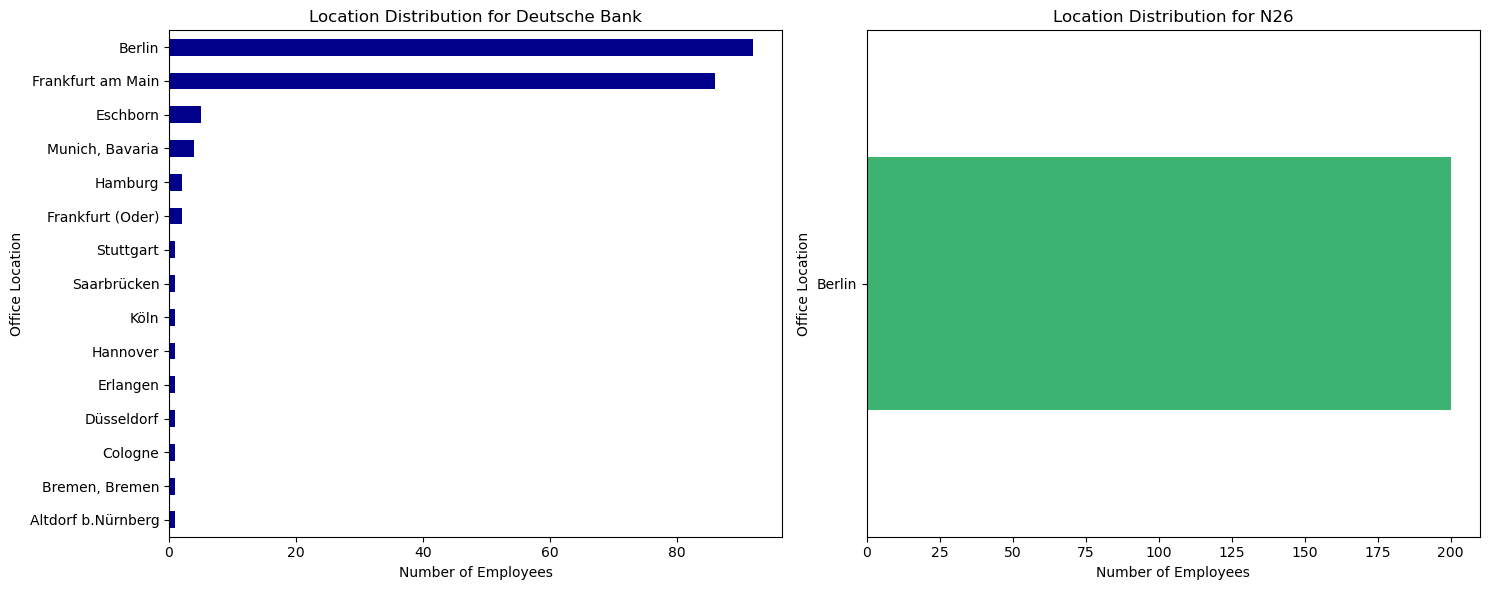

In [12]:
db_location = db['Location'].value_counts().sort_index()
n26_location = n26['Location'].value_counts().sort_index()

# Create a figure with the desired size
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))  # Adjust the figsize as needed

# Deutsche Bank
db_location.sort_values().plot(kind='barh', color='darkblue', ax=axes[0])
axes[0].set_title('Location Distribution for Deutsche Bank')
axes[0].set_xlabel('Number of Employees')
axes[0].set_ylabel('Office Location')

# N26
n26_location.sort_values().plot(kind='barh', color='mediumseagreen', ax=axes[1])
axes[1].set_title('Location Distribution for N26')
axes[1].set_xlabel('Number of Employees')
axes[1].set_ylabel('Office Location')

plt.tight_layout()
plt.show()

On the left, the Deutsche Bank graph has multiple locations, with Berlin having the highest number of employees. Other cities, such as Frankfurt am Main, Eschborn, and Munich, also have significant numbers of employees but fewer than Berlin.

The graphs visually represent that **Deutsche Bank has a broader distribution of office locations throughout Germany, while N26 appears to be highly centralized in Berlin.**

### (2) Employee Job Title/Position

Secondly, I used pie charts to represent **the top 10 employee job titles/positions at Deutsche Bank and N26.**

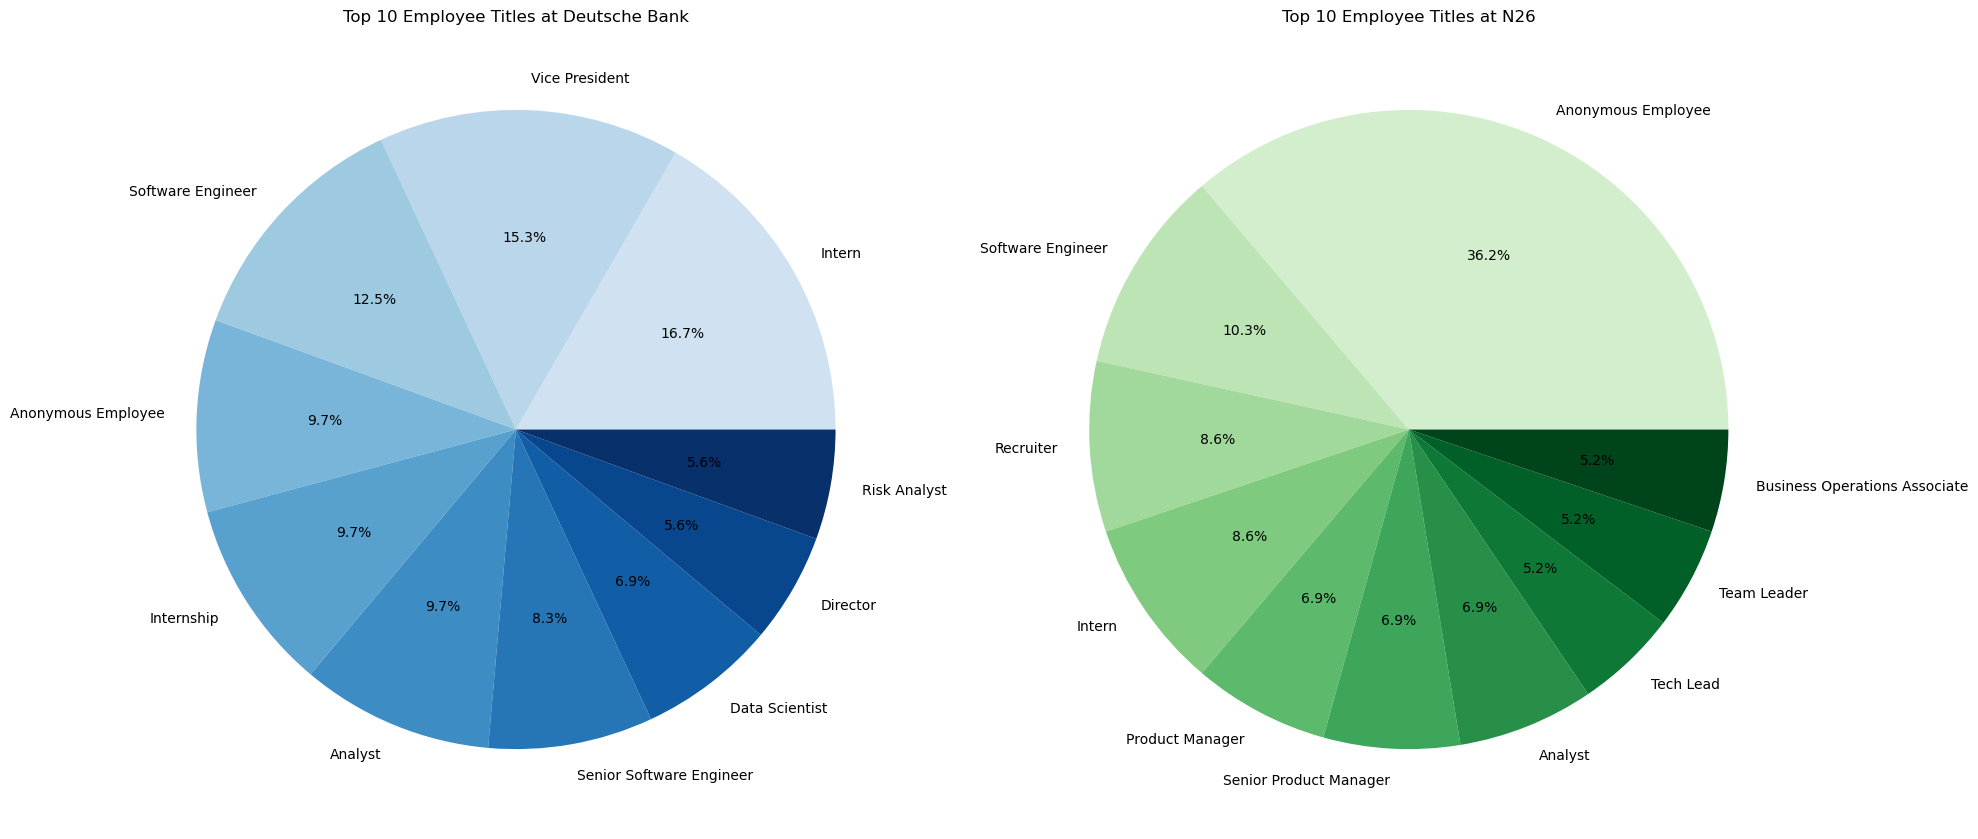

In [13]:
db_emptitle = db['Employee Title'].value_counts().sort_index()
n26_emptitle = n26['Employee Title'].value_counts().sort_index()

# Define custom color palettes for each pie chart
db_colors = plt.cm.Blues(np.linspace(0.2, 1, 10))  # Shades of blue for Deutsche Bank
n26_colors = plt.cm.Greens(np.linspace(0.2, 1, 10))  # Shades of green for N26

# Plot the pie charts with custom color palettes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Deutsche Bank
db_emptitle.sort_values(ascending=False).head(10).plot(kind='pie', ax=axes[0], autopct='%1.1f%%', colors=db_colors)
axes[0].set_ylabel('')
axes[0].set_title('Top 10 Employee Titles at Deutsche Bank')

# N26
n26_emptitle.sort_values(ascending=False).head(10).plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=n26_colors)
axes[1].set_ylabel('')
axes[1].set_title('Top 10 Employee Titles at N26')

plt.tight_layout()
plt.show()

For Deutsche Bank (left chart, shaded in blues), the largest segment is **'Intern'**, making up ***16.7% of the top positions*** and the second largest is **'Vice President'**, with ***15.3%***. Additionally, **'Software Engineer'** and **'Anonymous Employee'** accounts for ***12.5%*** and ***9.7%***, respectively.

For N26 (right chart, shaded in greens), **'Anonymous Employee'** dominates the chart with a significant ***36.2%*** and **'Software Engineer'** is also notable at ***10.3%.*** In addition, **‘Recruiter’** and **‘Intern’** follow the same proportion, for ***8.6%.*** 

### (3) Distribution in the Ratings

For the ***Rating*** column, I created two bar charts to display **the distribution of ratings for Deutsche Bank and N26.**

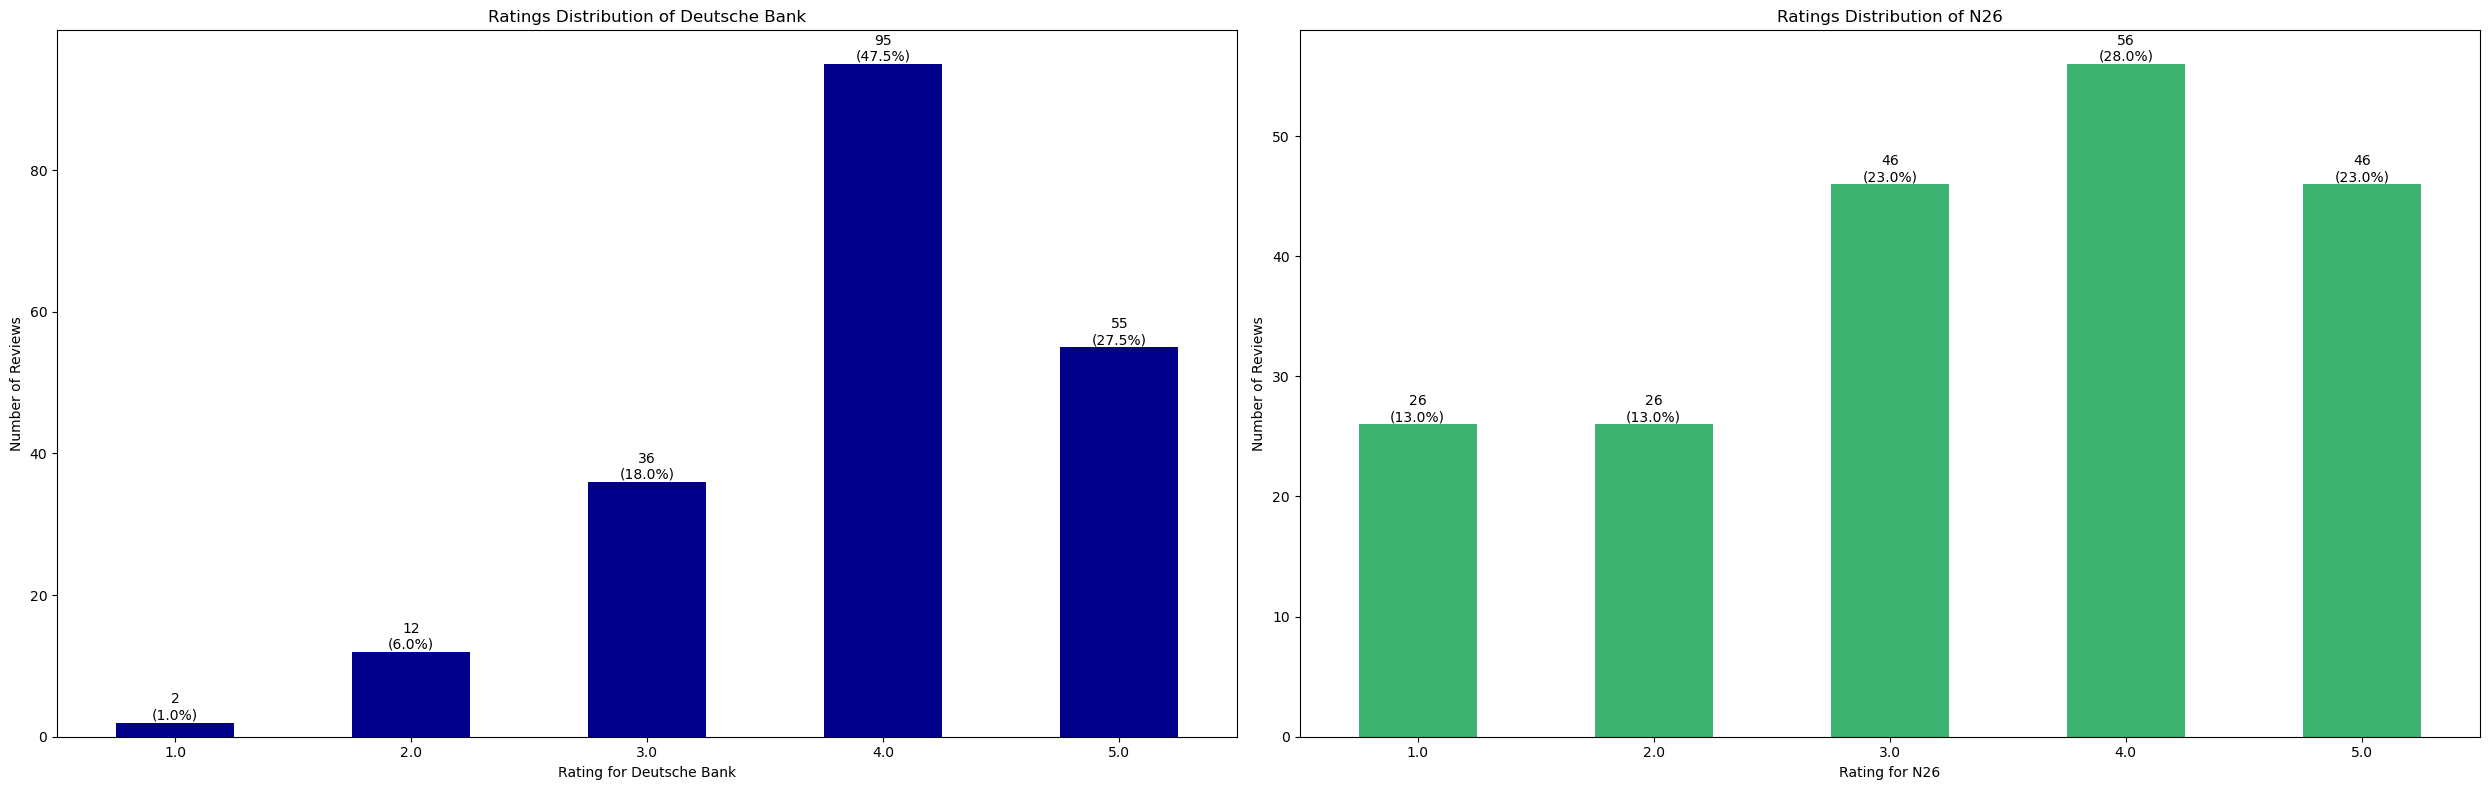

In [14]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))

# Plotting ratings distribution of Deutsche Bank
db_ratings = db['Rating'].value_counts().sort_index()
total_db_reviews = db_ratings.sum()
db_ratings_percent = db_ratings / total_db_reviews * 100
db_ratings.plot(kind='bar', color='darkblue', ax=axes[0])
axes[0].set_title('Ratings Distribution of Deutsche Bank')
axes[0].set_xlabel('Rating for Deutsche Bank')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=0)

# Annotate each bar with its value for Deutsche Bank
for i, (value, percent) in enumerate(zip(db_ratings, db_ratings_percent)):
    axes[0].text(i, value, f'{value}\n({percent:.1f}%)', ha='center', va='bottom')

# Plotting ratings distribution of N26
n26_ratings = n26['Rating'].value_counts().sort_index()
total_n26_reviews = n26_ratings.sum()
n26_ratings_percent = n26_ratings / total_n26_reviews * 100
n26_ratings.plot(kind='bar', color='mediumseagreen', ax=axes[1])
axes[1].set_title('Ratings Distribution of N26')
axes[1].set_xlabel('Rating for N26')
axes[1].set_ylabel('Number of Reviews')
axes[1].tick_params(axis='x', rotation=0)

# Annotate each bar with its value for N26
for i, (value, percent) in enumerate(zip(n26_ratings, n26_ratings_percent)):
    axes[1].text(i, value, f'{value}\n({percent:.1f}%)', ha='center', va='bottom')

plt.tight_layout()
plt.show()

For Deutsche Bank, the chart shows that **the majority of reviews are very positive**, with ***95 (~47.5%) and 55 reviews (~27.5%) at a 4 and 5-star rating, respectively.*** Meanwhile, ***the most common ratin of N26 is 4 stars, with 28% or 56 reviews.*** Both 5-star and 3-star ratings have 46 reviews or 23% each. Interestingly, both companies have **a higher concentration of 4-star and 5-star ratings**, indicating ***generally positive feedback.*** 

## 2.2 Text Exploratory before Preprocessing Steps

### (1) Total Word Count in Reviews

For this step, I would like to show **the total word count in the 'Pros' and 'Cons' reviews for Deutsche Bank and N26 before preprocessing.** It splits each review into words and sums up the word counts for both 'Pros' and 'Cons' separately for each company. 

In [15]:
# Total word count in 'Pros' and 'Cons'
db_wordcount_pros = db['Pros'].apply(lambda x: len(x.split())).sum()
db_wordcount_cons = db['Cons'].apply(lambda x: len(x.split())).sum()
n26_wordcount_pros = n26['Pros'].apply(lambda x: len(x.split())).sum()
n26_wordcount_cons = n26['Cons'].apply(lambda x: len(x.split())).sum()
print(f"Total word count in 'Pros' reviews of Deutsche Bank before preprocessing: {db_wordcount_pros} words")
print(f"Total word count in 'Cons' reviews of Deutsche Bank before preprocessing: {db_wordcount_cons} words")
print(f"Total word count in 'Pros' reviews of N26 before preprocessing: {n26_wordcount_pros} words")
print(f"Total word count in 'Cons' reviews of N26 before preprocessing: {n26_wordcount_cons} words")

Total word count in 'Pros' reviews of Deutsche Bank before preprocessing: 1936 words
Total word count in 'Cons' reviews of Deutsche Bank before preprocessing: 2416 words
Total word count in 'Pros' reviews of N26 before preprocessing: 3776 words
Total word count in 'Cons' reviews of N26 before preprocessing: 4715 words


The output indicates that before preprocessing, there are **1936 words** in the 'Pros' reviews and **2416 words** in the 'Cons' reviews for Deutsche Bank, while for N26, there are **3776 words** in the 'Pros' reviews and **4715 words** in the 'Cons' reviews.

### (2) Average Length of Reviews

This step computes **the mean length of each review** by applying the len() function to each review's text and then the output shows the average length of 'Pros' and 'Cons' reviews, measured in terms of the number of characters, for both Deutsche Bank and N26 before preprocessing. 

In [16]:
# Mean length of reviews (in terms of number of characters)
db_meanlength_pros = db['Pros'].apply(len).mean()
db_meanlength_cons = db['Cons'].apply(len).mean()
n26_meanlength_pros = n26['Pros'].apply(len).mean()
n26_meanlength_cons = n26['Cons'].apply(len).mean()
print(f"Average length of 'Pros' reviews of Deutsche Bank before preprocessing: {db_meanlength_pros} characters")
print(f"Average length of 'Cons' reviews of Deutsche Bank before preprocessing: {db_meanlength_cons} characters")
print(f"Average length of 'Pros' reviews of N26 before preprocessing: {n26_meanlength_pros} characters")
print(f"Average length of 'Cons' reviews of N26 before preprocessing: {n26_meanlength_cons} characters")

Average length of 'Pros' reviews of Deutsche Bank before preprocessing: 62.215 characters
Average length of 'Cons' reviews of Deutsche Bank before preprocessing: 73.71 characters
Average length of 'Pros' reviews of N26 before preprocessing: 113.13 characters
Average length of 'Cons' reviews of N26 before preprocessing: 142.635 characters


The results show that, on average, ***'Pros' and 'Cons' reviews for Deutsche Bank*** have a length of approximately **61.59 characters and 74.06 characters**, respectively, before preprocessing. ***For N26, the average length of 'Pros' and 'Cons' reviews*** is approximately **113.13 characters and 142.635 characters**, respectively, before preprocessing.

### (3) Average Word Length in Reviews

Before preprocessing, I calculated **the average word length in 'Pros' and 'Cons' reviews for both Deutsche Bank and N26.** It computes the mean word length for each review by iterating over each word in the review, calculating the length of each word, and then averaging the lengths. 

In [17]:
# Average word length in 'Pros' and 'Cons'
db_avg_wordlength_pros = db['Pros'].apply(lambda x: np.mean([len(word) for word in x.split() if word.isalpha()])).mean()
db_avg_wordlength_cons = db['Cons'].apply(lambda x: np.mean([len(word) for word in x.split() if word.isalpha()])).mean()
n26_avg_wordlength_pros = n26['Pros'].apply(lambda x: np.mean([len(word) for word in x.split() if word.isalpha()])).mean()
n26_avg_wordlength_cons = n26['Cons'].apply(lambda x: np.mean([len(word) for word in x.split() if word.isalpha()])).mean()
print(f"Average word length in 'Pros' reviews of Deutsche Bank before preprocessing: {db_avg_wordlength_pros}")
print(f"Average word length in 'Cons' reviews of Deutsche Bank before preprocessing: {db_avg_wordlength_cons}")
print(f"Average word length in 'Pros' reviews of N26 before preprocessing: {n26_avg_wordlength_pros}")
print(f"Average word length in 'Cons' reviews of N26 before preprocessing: {n26_avg_wordlength_cons}")

Average word length in 'Pros' reviews of Deutsche Bank before preprocessing: 5.459111745372114
Average word length in 'Cons' reviews of Deutsche Bank before preprocessing: 5.0006024012057795
Average word length in 'Pros' reviews of N26 before preprocessing: 5.188589655272812
Average word length in 'Cons' reviews of N26 before preprocessing: 5.070385461326041


The results indicate that, on average, ***words in 'Pros' reviews for Deutsche Bank*** have a length of approximately **5.46 characters**, while ***words in 'Cons' reviews*** have a length of approximately **5.00 characters** before preprocessing. ***For N26, the average word length in 'Pros' reviews*** is approximately **5.19 characters**, and ***in 'Cons' reviews***, it is approximately **5.07 characters** before preprocessing.

### (4) The Most Common Words in Reviews

This step identifies **the most common words in 'Pros' and 'Cons' reviews for both Deutsche Bank and N26 before preprocessing.** It counts the occurrences of each word in the text of all 'Pros' and 'Cons' reviews and retrieve the top 10 most common words and their frequencies.

In [18]:
# Common words in 'Pros' and 'Cons' reviews of Deutsche Bank before preprocessing
db_commonwords_pros = Counter(" ".join(db['Pros']).split()).most_common(10)
db_commonwords_cons = Counter(" ".join(db['Cons']).split()).most_common(10)
print("Common words in 'Pros' reviews of Deutsche Bank before preprocessing:")
print(db_commonwords_pros)
print("\nCommon words in 'Cons' reviews of Deutsche Bank before preprocessing:")
print(db_commonwords_cons)

Common words in 'Pros' reviews of Deutsche Bank before preprocessing:
[('and', 71), ('good', 46), ('work', 41), ('-', 40), ('of', 37), ('Good', 36), ('to', 35), ('a', 32), ('balance', 28), ('the', 26)]

Common words in 'Cons' reviews of Deutsche Bank before preprocessing:
[('to', 77), ('and', 65), ('the', 47), ('a', 43), ('of', 37), ('in', 29), ('for', 28), ('is', 26), ('not', 26), ('you', 26)]


In [19]:
# Common words in 'Pros' and 'Cons' reviews of N26 before preprocessing
n26_commonwords_pros = Counter(" ".join(n26['Pros']).split()).most_common(10)
n26_commonwords_cons = Counter(" ".join(n26['Cons']).split()).most_common(10)
print("Common words in 'Pros' reviews of N26 before preprocessing:")
print(n26_commonwords_pros)
print("\nCommon words in 'Cons' reviews of N26 before preprocessing:")
print(n26_commonwords_cons)

Common words in 'Pros' reviews of N26 before preprocessing:
[('and', 142), ('to', 117), ('-', 100), ('the', 99), ('a', 76), ('of', 71), ('work', 49), ('is', 45), ('for', 42), ('in', 41)]

Common words in 'Cons' reviews of N26 before preprocessing:
[('to', 157), ('and', 131), ('the', 130), ('of', 100), ('a', 87), ('-', 80), ('is', 79), ('are', 63), ('not', 58), ('in', 55)]


***For 'Pros' reviews of Deutsche Bank***, common words include **'and', 'good', '-',** and **'work'.** On the other hand, ***for 'Cons' reviews***, common words include **'to', 'and',** and **'the'.** Meanwhile ***'Pros' reviews of N26***, common words include **'and', 'to', '-'** and **'the'.** In contrast, ***for 'Cons' reviews***, common words include **'to', 'and',** and **'the'.**

### (5) Tokenization, POS Tagging, and Named Entity Recognition (NER)

For this process, I defined a function to processes text data by using the spaCy library and loaded a pre-trained spaCy model for English language (en_core_web_md). The function is then applied to the 'Pros' and 'Cons' entries of the Deutsche Bank and N26 datasets. It then tokenizes the text, performs part-of-speech (POS) tagging on each token, and identifies any named entities found in the text using Named Entity Recognition (NER).

This process provides **linguistic analysis of the text data**, helping to ***understand the grammatical structure, identify important words and phrases, and recognize named entities*** such as organizations, people, and locations.

In [20]:
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_md')

def process_text_with_spacy(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Tokenization and POS tagging
    print("Tokenization and POS Tagging:")
    for token in doc:
        print(f"{token.text:{12}} {token.pos_:{10}}")
    # Checking if there are named entities before printing
    if doc.ents:
        print("\nNamed Entity Recognition:")
        for ent in doc.ents:
            print(f"{ent.text:{17}} {ent.label_}")
    print("\n" + "-"*50 + "\n")

# Apply the function to the first 5 'Pros' entries
print("Processing 'Pros':")
for db_pros_text in db['Pros']:
    process_text_with_spacy(db_pros_text)

# Apply the function to the first 5 'Cons' entries
print("Processing 'Cons':")
for db_cons_text in db['Cons']:
    process_text_with_spacy(db_cons_text)

Processing 'Pros':
Tokenization and POS Tagging:
The          DET       
environment  NOUN      
within       ADP       
the          DET       
team         NOUN      
was          AUX       
open         ADJ       
and          CCONJ     
not          PART      
competitive  ADJ       
and          CCONJ     
people       NOUN      
were         AUX       
kind         ADJ       
to           ADP       
each         DET       
other        ADJ       

            SPACE     
The          DET       
manager      NOUN      
of           ADP       
the          DET       
team         NOUN      
was          AUX       
also         ADV       
very         ADV       
nice         ADJ       
and          CCONJ     
a            DET       
great        ADJ       
leader       NOUN      
overall      NOUN      

--------------------------------------------------

Tokenization and POS Tagging:
Deutsche     PROPN     
Bank         PROPN     
in           ADP       
Germany      PROPN     
stil

In [21]:
# Load the pre-trained spaCy model
nlp = spacy.load('en_core_web_md')

def process_text_with_spacy(text):
    # Process the text with spaCy
    doc = nlp(text)
    # Tokenization and POS tagging
    print("Tokenization and POS Tagging:")
    for token in doc:
        print(f"{token.text:{12}} {token.pos_:{10}}")
    # Checking if there are named entities before printing
    if doc.ents:
        print("\nNamed Entity Recognition:")
        for ent in doc.ents:
            print(f"{ent.text:{17}} {ent.label_}")
    print("\n" + "-"*50 + "\n")

# Applying the function to the first 5 'Pros' entries
print("Processing 'Pros':")
for n26_pros_text in n26['Pros']:
    process_text_with_spacy(n26_pros_text)

# Applying the function to the first 5 'Cons' entries
print("Processing 'Cons':")
for n26_cons_text in n26['Cons']:
    process_text_with_spacy(n26_cons_text)

Processing 'Pros':
Tokenization and POS Tagging:
Good         ADJ       
teams        NOUN      
and          CCONJ     
setups       NOUN      
,            PUNCT     
solid        ADJ       
Ways         PROPN     
of           ADP       
working      VERB      

Named Entity Recognition:
Ways of working   ORG

--------------------------------------------------

Tokenization and POS Tagging:
Work         NOUN      
environment  NOUN      
relaxed      VERB      
,            PUNCT     
even         ADV       
better       ADV       
after        SCONJ     
the          DET       
works        PROPN     
council      PROPN     
was          AUX       
entered      VERB      
(            PUNCT     
not          PART      
without      ADP       
some         DET       
tricky       ADJ       
avoidance    NOUN      
from         ADP       
top          ADJ       
managers     NOUN      
)            PUNCT     

--------------------------------------------------

Tokenization and POS T

## 2.3 Preprocessing Steps for Text Analysis

At this stage, I performed **text preprocessing on the 'Pros' and 'Cons' reviews for both Deutsche Bank and N26 datasets.** 

First, I loaded the spaCy model for English language processing (en_core_web_md). Then, I defined a preprocessing function called ***preprocess_text***, which applies several transformations to the text by *converting text to lowercase, removing numbers, removing hyphens and replace with space, removing punctuation, replacing multiple whitespaces with a single space, and striping any leading/trailing whitespace.* After that, I used *spaCy for tokenization and stop word removal which filters out tokens that are stop words, punctuation, whitespace, single characters, numeric-like tokens, and currency symbols.* Lastly, I also *excluded pronouns and then joined the tokens back into a string to form cleaned text.* 

Finally, the function is applied to the 'Pros' and 'Cons' columns of both Deutsche Bank (db) and N26 (n26) datasets, and the cleaned text is stored in new columns named ***'Pros_cleaned'*** and ***'Cons_cleaned'***  for further analysis.

This preprocessing step prepares the text data for subsequent analysis tasks, such as sentiment analysis or topic modeling, by removing noise and irrelevant information.

In [22]:
# Load the spaCy model for English language
nlp = spacy.load('en_core_web_md')
# Define the preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    # Remove hyphens and replace with space
    text = re.sub(r'-', ' ', text)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace multiple whitespaces with a single space
    text = re.sub(r'\s+', ' ', text)
    # Strip any leading/trailing whitespace that may have appeared
    text = text.strip()
    # Use spaCy for tokenization and stop word removal
    doc = nlp(text)
    # Filter out tokens that are stop words, punctuation, whitespace, or single characters, and convert to lowercase
    tokens = [token.lemma_ for token in doc 
              if not token.is_stop 
              and not token.is_punct
              and not token.is_space 
              and not token.is_digit
              and not token.like_num  # Check for numeric-like tokens
              and not token.is_currency
              and token.lemma_ != '-PRON-'
              and len(token.text) > 1]
    # Join the tokens back into a string
    clean_text = ' '.join(tokens)
    return clean_text

db['Pros_cleaned'] = db['Pros'].apply(preprocess_text)
db['Cons_cleaned'] = db['Cons'].apply(preprocess_text)
n26['Pros_cleaned'] = n26['Pros'].apply(preprocess_text)
n26['Cons_cleaned'] = n26['Cons'].apply(preprocess_text)

In [23]:
db.head(10)

Employee Title           Location  \
0                      Compliance Analyst             Berlin   
1                      Vice President M&A  Frankfurt am Main   
2  Graduate Trainee In Technology/Digital  Frankfurt am Main   
3                              Internship  Frankfurt am Main   
4                Corporate Treasury Sales  Frankfurt am Main   
5                            Risk Analyst             Berlin   
6                          Bank Assistant            Hamburg   
7                                 Analyst  Frankfurt am Main   
8             CIB Operation Regional Lead  Frankfurt am Main   
9                              Internship  Frankfurt am Main   

                                                Pros  \
0  The environment within the team was open and n...   
1  Deutsche Bank in Germany still kind of #1, and...   
2  The job stands for a very good work-life balance.   
3                        Flexible work and 39h/ week   
4          Trading floor experience and good socials   
5     Flexible working hours, good work-life balance   
6                    Helpful for everyone job seeker   
7     Friendly and helpful environment, good payment   
8                     Work Life balance, Pay is okay   
9  Facilities, relaxed working hours, opportunity...   

                                                Cons Rating   Company Name  \
0              The temporary contract and the salary    5.0  Deutsche Bank   
1  Globally lacking behind BB US banks, but keeps...    5.0  Deutsche Bank   
2             Less challenging for career beginners.    4.0  Deutsche Bank   
3               In Corona times difficult to network    4.0  Deutsche Bank   
4                 Monotone work and no good training    4.0  Deutsche Bank   
5  There is not many Career Development Opportuni...    4.0  Deutsche Bank   
6    i dont know anything about it thank you so much    4.0  Deutsche Bank   
7  Heavy workload sometimes 100h weeks \nLittle t...    4.0  Deutsche Bank   
8           Internal promotion is difficult Politics    4.0  Deutsche Bank   
9                Responsibility, a lot of admin work    2.0  Deutsche Bank   

                                        Pros_cleaned  \
0  environment team open competitive people kind ...   
1        deutsche bank germany kind involve big deal   
2                   job stand good work life balance   
3                                 flexible work week   
4               trading floor experience good social   
5       flexible working hour good work life balance   
6                                 helpful job seeker   
7          friendly helpful environment good payment   
8                         work life balance pay okay   
9  facility relax work hour opportunity look team...   

                                        Cons_cleaned  
0                          temporary contract salary  
1   globally lack bb bank keep closely ensure low bb  
2                        challenging career beginner  
3                      corona time difficult network  
4                        monotone work good training  
5                     career development opportunity  
6                                     not know thank  
7  heavy workload week little understanding workl...  
8               internal promotion difficult politic  
9                      responsibility lot admin work

In [24]:
n26.head(10)

Employee Title Location  \
0                         Anonymous Employee   Berlin   
1                   Senior Software Engineer   Berlin   
2                         Anonymous Employee   Berlin   
3                            User Researcher   Berlin   
4                         Analytics Engineer   Berlin   
5  International Customer Support Specialist   Berlin   
6                      Compliance Specialist   Berlin   
7                           Product Designer   Berlin   
8                           Backend Engineer   Berlin   
9                     Senior Product Analyst   Berlin   

                                                Pros  \
0       Good teams and setups, solid Ways of working   
1  Work environment relaxed, even better after th...   
2  The teams have some of the nicest and hard wor...   
3             Diverse work, lot's of in-house talent   
4  Wonderful people to work with and state of the...   
5                      Good place to work in general   
6             the company still is quite interesting   
7          Great people. Fun product. Learnt so much   
8  good vibes\ngood peoples\nnice office in the c...   
9  Full Remote work. The product analytics team i...   

                                                Cons Rating Company Name  \
0  Management crisis, high turnover on management...    3.0          N26   
1  Management is not really ready to listen opini...    2.0          N26   
2  The managers in this company do not support th...    1.0          N26   
3       Some uncertainty with organisation direction    4.0          N26   
4  Project workflow can be lost in the thread whe...    3.0          N26   
5                       Not so much chance of growth    3.0          N26   
6                            the salary is quite low    3.0          N26   
7  Too many layers in the org after scaling a lot...    5.0          N26   
8      problems with budget regarding salary updates    4.0          N26   
9  Product leaders need more focus on being more ...    3.0          N26   

                                        Pros_cleaned  \
0                     good team setup solid way work   
1  work environment relax well works council ente...   
2                         team nice hard work people   
3                      diverse work lot house talent   
4         wonderful people work state art tech stack   
5                            good place work general   
6                                company interesting   
7                     great people fun product learn   
8  good vibe good people nice office center berli...   
9  remote work product analytic team nice support...   

                                        Cons_cleaned  
0  management crisis high turnover management lev...  
1  management ready listen opinion different thei...  
2  manager company support wonderful people contr...  
3                 uncertainty organisation direction  
4  project workflow lose thread change happen eas...  
5                                      chance growth  
6                                         salary low  
7                        layer org scale lot quickly  
8                       problem budget salary update  
9  product leader need focus datum inform datum i...

# 3. Main Analysis and Methodology <a id="mm"></a>

## 3.1 Text Exploratory after Preprocessing Steps

### (1) Total Word Count in Reviews

For this step, I would like to show **the total word count in the 'Pros_cleaned' and 'Cons_cleaned' columns for Deutsche Bank and N26 after preprocessing**.** It splits each review into words and sums up the word counts in both 'Pros_cleaned' and 'Cons_cleaned' columns separately for each company. 

In [25]:
# Total word count in 'Pros' and 'Cons'
db_wordcount_pros_post = db['Pros_cleaned'].apply(lambda x: len(x.split())).sum()
db_wordcount_cons_post = db['Cons_cleaned'].apply(lambda x: len(x.split())).sum()
n26_wordcount_pros_post = n26['Pros_cleaned'].apply(lambda x: len(x.split())).sum()
n26_wordcount_cons_post = n26['Cons_cleaned'].apply(lambda x: len(x.split())).sum()
print(f"Total word count in 'Pros_cleaned' reviews of Deutsche Bank after preprocessing: {db_wordcount_pros_post} words")
print(f"Total word count in 'Cons_cleaned' reviews of Deutsche Bank after preprocessing: {db_wordcount_cons_post} words")
print(f"Total word count in 'Pros_cleaned' reviews of N26 after preprocessing: {n26_wordcount_pros_post} words")
print(f"Total word count in 'Cons_cleaned' reviews of N26 after preprocessing: {n26_wordcount_cons_post} words")

Total word count in 'Pros_cleaned' reviews of Deutsche Bank after preprocessing: 1309 words
Total word count in 'Cons_cleaned' reviews of Deutsche Bank after preprocessing: 1327 words
Total word count in 'Pros_cleaned' reviews of N26 after preprocessing: 2081 words
Total word count in 'Cons_cleaned' reviews of N26 after preprocessing: 2328 words


The output indicates that after preprocessing, there are **1309 words** in ***the 'Pros_cleaned' column*** and **1327 words** in ***the 'Cons_cleaned' column for Deutsche Bank***, while ***for N26***, there are **2081 words** ***in the 'Pros_cleaned' column*** and **2328 words** ***in the 'Cons_cleaned' column.***

### (2) Average Length of Reviews

This step computes the mean length of each review by applying the len() function to each text and then the output shows **the average length of** ***'Pros_cleaned'*** and ***'Cons_cleaned'*** columns, measured in terms of **the number of characters after preprocessing for both Deutsche Bank and N26 datasets.**

In [26]:
# Mean length of reviews (in terms of number of characters)
db_meanlength_pros_post = db['Pros_cleaned'].apply(len).mean()
db_meanlength_cons_post = db['Cons_cleaned'].apply(len).mean()
n26_meanlength_pros_post = n26['Pros_cleaned'].apply(len).mean()
n26_meanlength_cons_post = n26['Cons_cleaned'].apply(len).mean()
print(f"Average length of 'Pros_cleaned' reviews of Deutsche Bank after preprocessing: {db_meanlength_pros_post} characters")
print(f"Average length of 'Cons_cleaned' reviews of Deutsche Bank after preprocessing: {db_meanlength_cons_post} characters")
print(f"Average length of 'Pros_cleaned' reviews of N26 after preprocessing: {n26_meanlength_pros_post} characters")
print(f"Average length of 'Cons_cleaned' reviews of N26 after preprocessing: {n26_meanlength_cons_post} characters")

Average length of 'Pros_cleaned' reviews of Deutsche Bank after preprocessing: 46.72 characters
Average length of 'Cons_cleaned' reviews of Deutsche Bank after preprocessing: 47.35 characters
Average length of 'Pros_cleaned' reviews of N26 after preprocessing: 73.545 characters
Average length of 'Cons_cleaned' reviews of N26 after preprocessing: 84.825 characters


The results show that, on average, ***'Pros_cleaned' and 'Cons_cleaned' reviews for Deutsche Bank*** have a length of approximately **46.72 characters and 47.35 characters**, respectively, before preprocessing. ***For N26, the average length of 'Pros_cleaned' and 'Cons_cleaned' reviews*** is approximately **73.545 characters and 84.825 characters**, respectively, after preprocessing.

### (3) Average Word Length in Reviews

After preprocessing, I calculated **the average word length in 'Pros_cleaned' and 'Cons_cleaned' reviews after preprocessing for both Deutsche Bank and N26 datasets**.** I applied a lambda function to each entry in the 'Pros_cleaned' and 'Cons_cleaned' columns of both datasets to split the text into words and then calculated the mean length of these words, considering only alphabetic characters.

In [27]:
# Average word length in 'Pros' and 'Cons'
db_avg_wordlength_pros_post = db['Pros_cleaned'].apply(lambda x: np.mean([len(word) for word in x.split() if word.isalpha()])).mean()
db_avg_wordlength_cons_post = db['Cons_cleaned'].apply(lambda x: np.mean([len(word) for word in x.split() if word.isalpha()])).mean()
n26_avg_wordlength_pros_post = n26['Pros_cleaned'].apply(lambda x: np.mean([len(word) for word in x.split() if word.isalpha()])).mean()
n26_avg_wordlength_cons_post = n26['Cons_cleaned'].apply(lambda x: np.mean([len(word) for word in x.split() if word.isalpha()])).mean()
print(f"Average word length in 'Pros_cleaned' reviews of Deutsche Bank after preprocessing: {db_avg_wordlength_pros_post}")
print(f"Average word length in 'Cons_cleaned' reviews of Deutsche Bank after preprocessing: {db_avg_wordlength_cons_post}")
print(f"Average word length in 'Pros_cleaned' reviews of N26 after preprocessing: {n26_avg_wordlength_pros_post}")
print(f"Average word length in 'Cons_cleaned' reviews of N26 after preprocessing: {n26_avg_wordlength_cons_post}")

Average word length in 'Pros_cleaned' reviews of Deutsche Bank after preprocessing: 6.248046072237576
Average word length in 'Cons_cleaned' reviews of Deutsche Bank after preprocessing: 6.256767754089016
Average word length in 'Pros_cleaned' reviews of N26 after preprocessing: 6.207176135831977
Average word length in 'Cons_cleaned' reviews of N26 after preprocessing: 6.373807051294438


The results indicate that, on average, ***words in 'Pros_cleaned' reviews for Deutsche Bank*** have a length of approximately **6.25 characters**, while ***words in 'Cons_cleaned' reviews*** have a length of approximately **6.26 characters** after preprocessing. ***For N26, the average word length in 'Pros_cleaned' reviews*** is approximately **6.21 characters**, and ***in 'Cons_cleaned' reviews***, it is approximately **6.37 characters** after preprocessing.

### (4) Word Cloud Visualization of Reviews

Then, I generated **word clouds for the positive and negative reviews (‘Pros_cleaned’ and ‘Cons_cleaned’) of both Deutsche Bank and N26 datasets by using WordCloud library.** The word clouds visually represent the most frequent words in the positive and negative reviews, providing a quick overview of the sentiments expressed by employees towards each company. 

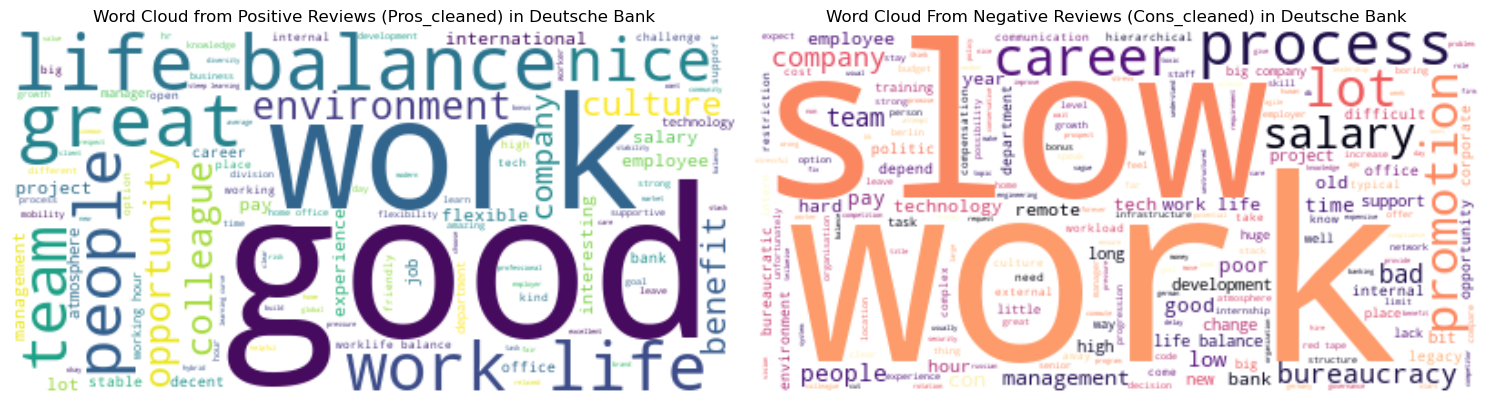

In [28]:
# Combine all pros into a single string
db_pros_text = " ".join(review for review in db.Pros_cleaned.dropna())

# Generate a word cloud image for pros
db_wordcloud_pros = WordCloud(background_color="white", colormap='viridis').generate(db_pros_text)

# Combine all cons into a single string
db_cons_text = " ".join(review for review in db.Cons_cleaned.dropna())

# Generate a word cloud image for cons
db_wordcloud_cons = WordCloud(background_color="white", colormap='magma').generate(db_cons_text)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting word cloud for pros
axes[0].imshow(db_wordcloud_pros, interpolation='bilinear')
axes[0].set_title('Word Cloud from Positive Reviews (Pros_cleaned) in Deutsche Bank')
axes[0].axis("off")

# Plotting word cloud for cons
axes[1].imshow(db_wordcloud_cons, interpolation='bilinear')
axes[1].set_title('Word Cloud From Negative Reviews (Cons_cleaned) in Deutsche Bank')
axes[1].axis("off")

plt.tight_layout()
plt.show()

*For Deutsche Bank, the positive reviews* highlight **"good", "work", "life", "balance", and "team"**, suggesting *employees appreciate* ***the work environment and work-life balance.*** *The negative reviews* emphasize **"work", "process", "slow", "career", and "bureaucracy"**, indicating *that areas of dissatisfaction often relate to* ***workload, career progression, and bureaucratic hurdles.***.

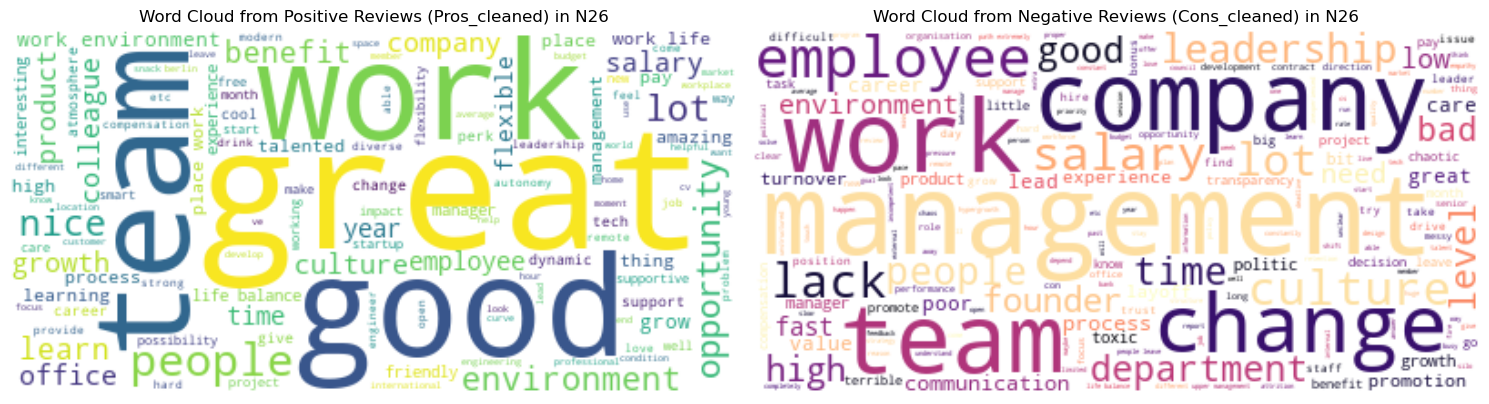

In [29]:
# Combine all pros into a single string
n26_pros_text = " ".join(review for review in n26.Pros_cleaned.dropna())

# Generate a word cloud image for pros
n26_wordcloud_pros = WordCloud(background_color="white", colormap='viridis').generate(n26_pros_text)

# Combine all cons into a single string
n26_cons_text = " ".join(review for review in n26.Cons_cleaned.dropna())

# Generate a word cloud image for cons
n26_wordcloud_cons = WordCloud(background_color="white", colormap='magma').generate(n26_cons_text)

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plotting word cloud for pros
axes[0].imshow(n26_wordcloud_pros, interpolation='bilinear')
axes[0].set_title('Word Cloud from Positive Reviews (Pros_cleaned) in N26')
axes[0].axis("off")

# Plotting word cloud for cons
axes[1].imshow(n26_wordcloud_cons, interpolation='bilinear')
axes[1].set_title('Word Cloud from Negative Reviews (Cons_cleaned) in N26')
axes[1].axis("off")

plt.tight_layout()
plt.show()

*In the positive reviews of N26*, words such as **"good", "work", "great", "team", and "environment"** stand out, suggesting that ***employees value the workplace culture and team dynamics.*** *The negative reviews* emphasize **"management", "change", "salary", "company", and "team"**, pointing to concerns with ***management practices, salary satisfaction, and the company's approach to change.***

Overall, both companies show positive feedback on the **“team”** and **“people”**. Noticeably, **“work-life balance”** is prominent in the positive aspects of Deutsche Bank, while **“slow work process”** and **"management"** are negative points for Deutsche Bank and N26, respectively. 

### (5) The Most Common Words in Reviews

In this step, I would like to show bar charts of **the most common words found in the positive and negative reviews of Deutsche Bank and N26.**

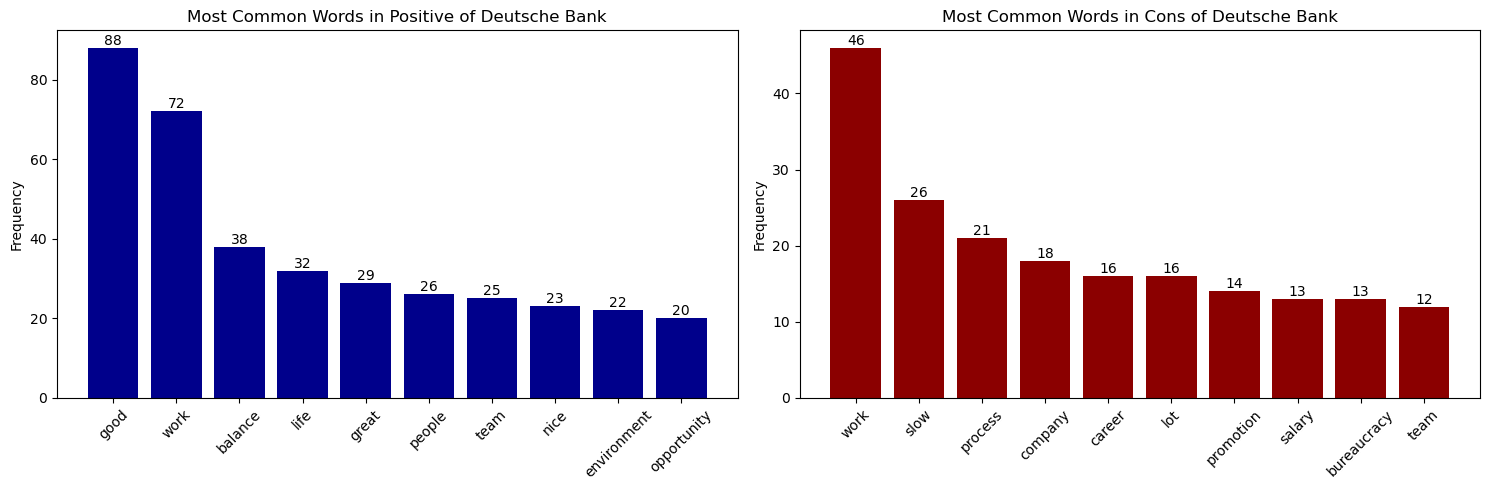

In [30]:
# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_md")

# Function to preprocess text with spaCy (tokenization and stop word removal)
def preprocess(text):
    doc = nlp(text)
    # Include additional condition to ignore tokens that are empty strings or spaces
    return [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space and token.text.strip()]

# Apply the preprocessing to Pros and Cons and count words
db_pros_words = [word for review in db.Pros_cleaned.dropna() for word in preprocess(review)]
db_pros_words = Counter(db_pros_words)

db_cons_words = [word for review in db.Cons_cleaned.dropna() for word in preprocess(review)]
db_cons_words = Counter(db_cons_words)

# Directly get the 10 most common words and their counts for Pros and Cons
db_pros_mostcommon = db_pros_words.most_common(10)
db_cons_mostcommon = db_cons_words.most_common(10)

# Unpack the words and their frequencies
db_pros_words, db_pros_counts = zip(*db_pros_mostcommon)
db_cons_words, db_cons_counts = zip(*db_cons_mostcommon)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for the most common words in Pros
axes[0].bar(db_pros_words, db_pros_counts, color='darkblue')
axes[0].set_title('Most Common Words in Positive of Deutsche Bank')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Frequency')

# Annotate each bar with its value for Deutsche Bank
for i, value in enumerate(db_pros_counts):
    axes[0].text(i, value, str(value), ha='center', va='bottom')

# Bar plot for the most common words in Cons
axes[1].bar(db_cons_words, db_cons_counts, color='darkred')
axes[1].set_title('Most Common Words in Cons of Deutsche Bank')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Frequency')

# Annotate each bar with its value for Deutsche Bank
for i, value in enumerate(db_cons_counts):
    axes[1].text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

*In positive reviews of Deutsche Bank*, the most frequent words are **"good" (88 mentions), "work" (72), "balance" (38), "life" (32), and "great" (29)**, reflecting a positive sentiment towards ***work-life balance*** and ***the general work environment.*** Meanwhile, *negative reviews* related to **"work" (46 mentions)** is the most common word, followed by **"slow" (26), "process" (21), and "company" (18).** This suggests criticism is focused on ***the pace and processes within the company***, and possibly ***the impact on employees' work.***

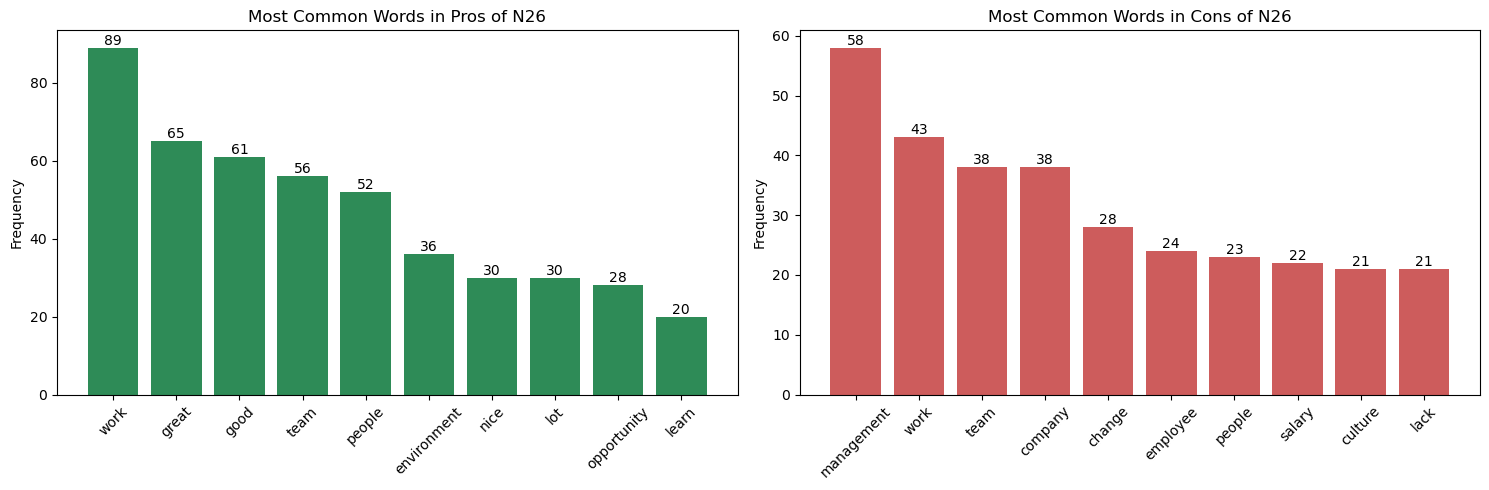

In [31]:
# Load English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_md")

# Function to preprocess text with spaCy (tokenization and stop word removal)
def preprocess(text):
    doc = nlp(text)
    # Include additional condition to ignore tokens that are empty strings or spaces
    return [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and token.text.strip()]

# Apply the preprocessing to Pros and Cons and count words
n26_pros_words = [word for review in n26.Pros_cleaned.dropna() for word in preprocess(review)]
n26_pros_words = Counter(n26_pros_words)

n26_cons_words = [word for review in n26.Cons_cleaned.dropna() for word in preprocess(review)]
n26_cons_words = Counter(n26_cons_words)

# Directly get the 10 most common words and their counts for Pros and Cons
n26_pros_mostcommon = n26_pros_words.most_common(10)
n26_cons_mostcommon = n26_cons_words.most_common(10)

# Unpack the words and their frequencies
n26_pros_words, n26_pros_counts = zip(*n26_pros_mostcommon)
n26_cons_words, n26_cons_counts = zip(*n26_cons_mostcommon)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Bar plot for the most common words in Pros
axes[0].bar(n26_pros_words, n26_pros_counts, color='seagreen')
axes[0].set_title('Most Common Words in Pros of N26')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Frequency')

# Annotate each bar with its value for N26
for i, value in enumerate(n26_pros_counts):
    axes[0].text(i, value, str(value), ha='center', va='bottom')

# Bar plot for the most common words in Cons
axes[1].bar(n26_cons_words, n26_cons_counts, color='indianred')
axes[1].set_title('Most Common Words in Cons of N26')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Frequency')

# Annotate each bar with its value for N26
for i, value in enumerate(n26_cons_counts):
    axes[1].text(i, value, str(value), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to not overlap
plt.show()

*N26’s positive reviews most frequently* include **"work" (89 mentions), "great" (65), "good" (61), and "team" (56)**, indicating that employees have *a positive perception* of ***their work, team, and the overall company culture.*** Meanwhile, *negative reviews* related to **"management" (58 mentions)** is the most cited issue, followed by **"work" (43), "team" (38), and "company" (28)**, pointing towards concerns primarily related to ***management and team dynamics.***

These charts provide a concise quantitative analysis of common themes in employee feedback, highlighting the strengths and areas for improvement for each company as perceived by their employees.

## 3.2 Topic Modeling

For a topic modeling analysis, I applied **Latent Dirichlet Allocation (LDA)** to positive and negative employee reviews of Deutsche Bank and N26 **for identifying common themes in both positive (‘Pros_cleaned’) and negative (‘Cons_cleaned’) feedback of both companies.** 

In [32]:
# Combine the preprocessed text into lists
db_pros_text = [preprocess(review) for review in db['Pros_cleaned'].dropna()]
db_cons_text = [preprocess(review) for review in db['Cons_cleaned'].dropna()]

# Create a Gensim dictionary from the text
db_pros_dictionary = Dictionary(db_pros_text)
db_cons_dictionary = Dictionary(db_cons_text)

# Filter out extremes to limit the number of features
db_pros_dictionary.filter_extremes(no_below=5, no_above=0.5)
db_cons_dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the dictionary to a bag of words corpus
db_pros_corpus = [db_pros_dictionary.doc2bow(text) for text in db_pros_text]
db_cons_corpus = [db_cons_dictionary.doc2bow(text) for text in db_cons_text]

# Train LDA model for Pros_cleaned and Cons_cleaned
db_pros_topics = LdaModel(corpus=db_pros_corpus, id2word=db_pros_dictionary, num_topics=3, random_state=42, passes=10, iterations=50)
db_cons_topics = LdaModel(corpus=db_cons_corpus, id2word=db_cons_dictionary, num_topics=3, random_state=42, passes=10, iterations=50)

# Display topics for Pros_cleaned and Cons_cleaned
print("Positive Topics in Deutsche Bank:")
for idx, topic in db_pros_topics.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")
print("Negative Topics in Deutsche Bank:")
for idx, topic in db_cons_topics.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Positive Topics in Deutsche Bank:
Topic: 0 
Words: 0.205*"good" + 0.056*"team" + 0.053*"benefit" + 0.050*"nice" + 0.047*"environment" + 0.043*"salary" + 0.041*"company" + 0.040*"employee" + 0.037*"people" + 0.034*"management"

Topic: 1 
Words: 0.107*"opportunity" + 0.089*"people" + 0.074*"lot" + 0.067*"great" + 0.056*"environment" + 0.055*"international" + 0.050*"work" + 0.044*"interesting" + 0.042*"bank" + 0.041*"career"

Topic: 2 
Words: 0.199*"work" + 0.111*"balance" + 0.102*"good" + 0.102*"life" + 0.051*"great" + 0.050*"colleague" + 0.038*"culture" + 0.036*"office" + 0.036*"project" + 0.032*"nice"

Negative Topics in Deutsche Bank:
Topic: 0 
Words: 0.117*"slow" + 0.076*"process" + 0.074*"career" + 0.054*"bureaucracy" + 0.049*"salary" + 0.035*"pay" + 0.033*"good" + 0.033*"new" + 0.033*"old" + 0.028*"year"

Topic: 1 
Words: 0.099*"work" + 0.063*"bad" + 0.052*"promotion" + 0.049*"life" + 0.049*"balance" + 0.045*"employee" + 0.044*"low" + 0.043*"management" + 0.039*"con" + 0.038*"chang

The LDA analysis on Deutsche Bank's employee reviews reveals three main topics in both positive and negative feedback. 

**Positive Feedback Topics:**

-	***Team and Benefits:*** This topic features **"good," "team,"** and **"benefit"** show that *employees are happy with the teamwork and benefits provided.*

-	***Work Opportunities and Environment:*** With **"opportunity," "international,"** and **"environment"**, it shows that *employees appreciate the career opportunities and the international work environment.*

-	***Work-life Balance:*** Words such as **"work," "balance,"** and **"life,"** indicate *a positive sentiment about managing professional and personal life effectively.*

**Negative Feedback Topics:**

-	***Slow Career Progression and Bureaucracy Systems:*** The words **"slow," "process," "career,"** and **"bureaucracy"** point to *frustrations with slow career advancement and bureaucracy processes.*

-	***Work-life Imbalance:*** The prominence of **"work," "bad," "life,"** and **"balance,"** reflects *dissatisfaction with managing their personnal life with work.*

-	***Workload and Company Structure:*** Words such as **"Work," "lot," "company,"** and **"big"** highlight *challenges with heavy workloads and the impact of the company's large size.*

In summary, employees of Deutsche Bank appreciate the teamwork, benefits, international work environment, and work-life balance. However, they express concerns about slow career progression, bureaucracy management, workload and the stress of large company structures on their work experiences.

In [33]:
# Combine the preprocessed text into lists
n26_pros_text = [preprocess(review) for review in n26['Pros_cleaned'].dropna()]
n26_cons_text = [preprocess(review) for review in n26['Cons_cleaned'].dropna()]

# Create a Gensim dictionary from the text
n26_pros_dictionary = Dictionary(n26_pros_text)
n26_cons_dictionary = Dictionary(n26_cons_text)

# Filter out extremes to limit the number of features
n26_pros_dictionary.filter_extremes(no_below=5, no_above=0.5)
n26_cons_dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the dictionary to a bag of words corpus
pros_corpus = [n26_pros_dictionary.doc2bow(text) for text in n26_pros_text]
cons_corpus = [n26_cons_dictionary.doc2bow(text) for text in n26_cons_text]

# Train LDA model for Pros_cleaned and Cons_cleaned
n26_pros_topic = LdaModel(corpus=pros_corpus, id2word=n26_pros_dictionary, num_topics=3, random_state=42, passes=10, iterations=50)
n26_cons_topic = LdaModel(corpus=cons_corpus, id2word=n26_cons_dictionary, num_topics=3, random_state=42, passes=10, iterations=50)

# Display topics for Pros_cleaned and Cons_cleaned
print("Positive Topics in N26:")
for idx, topic in n26_pros_topic.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")
print("Negative Topics in N26:")
for idx, topic in n26_cons_topic.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

Positive Topics in N26:
Topic: 0 
Words: 0.143*"work" + 0.078*"good" + 0.071*"great" + 0.051*"team" + 0.044*"people" + 0.037*"opportunity" + 0.034*"place" + 0.027*"environment" + 0.025*"employee" + 0.024*"growth"

Topic: 1 
Words: 0.067*"people" + 0.053*"great" + 0.052*"good" + 0.042*"lot" + 0.034*"learn" + 0.034*"colleague" + 0.033*"year" + 0.031*"benefit" + 0.030*"product" + 0.030*"high"

Topic: 2 
Words: 0.087*"environment" + 0.077*"team" + 0.069*"nice" + 0.069*"lot" + 0.031*"great" + 0.030*"work" + 0.026*"culture" + 0.025*"flexibility" + 0.025*"salary" + 0.025*"people"

Negative Topics in N26:
Topic: 0 
Words: 0.065*"management" + 0.064*"level" + 0.060*"bad" + 0.059*"employee" + 0.045*"high" + 0.034*"pay" + 0.034*"chaotic" + 0.032*"task" + 0.031*"work" + 0.030*"turnover"

Topic: 1 
Words: 0.083*"company" + 0.058*"management" + 0.056*"work" + 0.035*"environment" + 0.032*"fast" + 0.032*"communication" + 0.029*"people" + 0.026*"culture" + 0.026*"leave" + 0.023*"employee"

Topic: 2 
Wo

From the LDA analysis of N26’s employee reviews, there are three main topics in both positive and negative terms.

**Positive Feedback Topics:**

-	***Good Teamwork:*** Most employees frequently mentioned **"work," "good," "great," "team,"** and **"people,"** reflecting that *employees have satisfaction on their work and appreciation for people and teamwork.*

-	***Learning and Growth:*** With **"people," "learn,"** and **"colleague,"** this theme shows *a positive view of personal development and the chance to learn from others within the company.*

-	***Work Environment and Compensation:*** This topic features **"environment," "nice,"** and **"salary"** indicates that *employees are happy with their work environment and have satisfaction on the compensation.*

**Negative Feedback Topics:**

-	***Management and Organizational Challenges:*** The words **"management," "level," "high,"** and **"turnover,"** reflect *challenges with management and organizational structure that might be causing frustration among employees and high turnover.*

-	***Company Dynamics and Communication:*** The prominence of words **"company," "fast,"** and **"communication"** highlight *issues with rapid company changes and potentially lacking communication.*

-	***Team Management Changes and Salary:*** With **"team," "management," "change,"** and **"salary,"**, it shows *concerns about the impact of fast changes within the team or company and dissatisfaction on salary.*

In conclusion, while N26’s employees feel positive about teamwork, work environment, and compensation schemes that supports personal and professional growth, they also express concerns on management practices, organizational structure, rapid company changes, cultural dynamics, and deficiencies in communication. Additionally, dissatisfaction with salary levels can lead to a high turnover rate within the organization.

## 3.3 Clustering Classification

### (1) Clustering Positive Reviews about Working in Deutsche Bank

In this step, I applied **text clustering** on the 'Pros_cleaned' data from the 'db' dataset, ***using the TF-IDF (Term Frequency-Inverse Document Frequency) representation with ‘ngram_range’*** covering *single words, bigrams, and trigrams.* **The KMeans clustering algorithm** was then employed to group the textual data into distinct clusters based on their semantic similarities.

In [34]:
# Initialize TfidfVectorizer with ngram_range for single words, bigrams, and trigrams
db_pros_vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 3), max_features=5)

# Fit and transform the entire preprocessed text data into TF-IDF model
db_pros_tfidf_matrix = db_pros_vectorizer_tfidf.fit_transform(db['Pros_cleaned'])

# Define the number of clusters
db_pros_num_clusters_tfidf = 5

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=db_pros_num_clusters_tfidf, random_state=42)

# Fit KMeans on the TF-IDF data
kmeans.fit(db_pros_tfidf_matrix)

# Predict the cluster labels for each document
db_pros_clusters_tfidf = kmeans.labels_

# Add cluster labels to your DataFrame
db['db_Pros_cluster'] = db_pros_clusters_tfidf

# Print texts belonging to a specific cluster
for i in range(db_pros_num_clusters_tfidf):
    print(f"Cluster {i} texts:")
    print(db[db['db_Pros_cluster'] == i]['Pros_cleaned'].head())
    print("\n")

Cluster 0 texts:
0     environment team open competitive people kind ...
1           deutsche bank germany kind involve big deal
6                                    helpful job seeker
10                 amazing worklife balance flexibility
11    international team great guidance manager inte...
Name: Pros_cleaned, dtype: object


Cluster 1 texts:
31                                 good atmosphere work
34               good pay work expectation work culture
41    great leader technology division nice colleagu...
51                                 good people work env
87    mention people amazing devs open space feel li...
Name: Pros_cleaned, dtype: object


Cluster 2 texts:
2                 job stand good work life balance
5     flexible working hour good work life balance
8                       work life balance pay okay
12        stable employment good work life balance
19                          good work life balance
Name: Pros_cleaned, dtype: object


Cluster 3 texts:
3        

Then, I performed **text clustering** on the same column and dataset ***by using ‘CountVectorizer’ or the Bag-of-Words (BoW) representation with the same ‘ngram_range’*** *to compare *the effectiveness of these two approaches in clustering the text data.* 

In [35]:
# Initialize CountVectorizer with ngram_range for single words, bigrams, and trigrams
db_pros_vectorizer_bow = CountVectorizer(ngram_range=(1, 3), max_features=5)  

# Fit and transform the 'Pros_cleaned' text data into bag-of-words model
db_pros_bow_matrix = db_pros_vectorizer_bow.fit_transform(db['Pros_cleaned'])

# Get the feature names (i.e., the words or bigrams)
feature_names = db_pros_vectorizer_bow.get_feature_names_out()
# Convert feature names from dict_keys object to list
feature_names = list(feature_names)

# Define the number of clusters
db_pros_num_clusters_bow = 5

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=db_pros_num_clusters_bow, random_state=42)
# Fit KMeans on the bag-of-words data
kmeans.fit(db_pros_bow_matrix)
# Predict the cluster labels for each document
db_pros_clusters_bow = kmeans.labels_

# Add cluster labels to your DataFrame
db['db_Pros_cluster_bow'] = db_pros_clusters_bow
for i in range(db_pros_num_clusters_bow):
    print(f"Cluster {i} texts:")
    print(db[db['db_Pros_cluster_bow'] == i]['Pros_cleaned'].head())
    print("\n")

Cluster 0 texts:
0     environment team open competitive people kind ...
1           deutsche bank germany kind involve big deal
3                                    flexible work week
6                                    helpful job seeker
10                 amazing worklife balance flexibility
Name: Pros_cleaned, dtype: object


Cluster 1 texts:
33     good benefit good support hr technology good w...
119                  good culture good work good project
122             good work life balance good work culture
192                  good benefit good work life balance
Name: Pros_cleaned, dtype: object


Cluster 2 texts:
9     facility relax work hour opportunity look team...
31                                 good atmosphere work
34               good pay work expectation work culture
41    great leader technology division nice colleagu...
51                                 good people work env
Name: Pros_cleaned, dtype: object


Cluster 3 texts:
4                  trading floor exp

Then, I applied **the elbow method** to represent *how the within-cluster sum of squares (WCSS) decreases as the number of clusters increases and find the optimal number of clusters*, for two different text data vectorizations: ***TFIDF (blue line) and BoW (green line).***

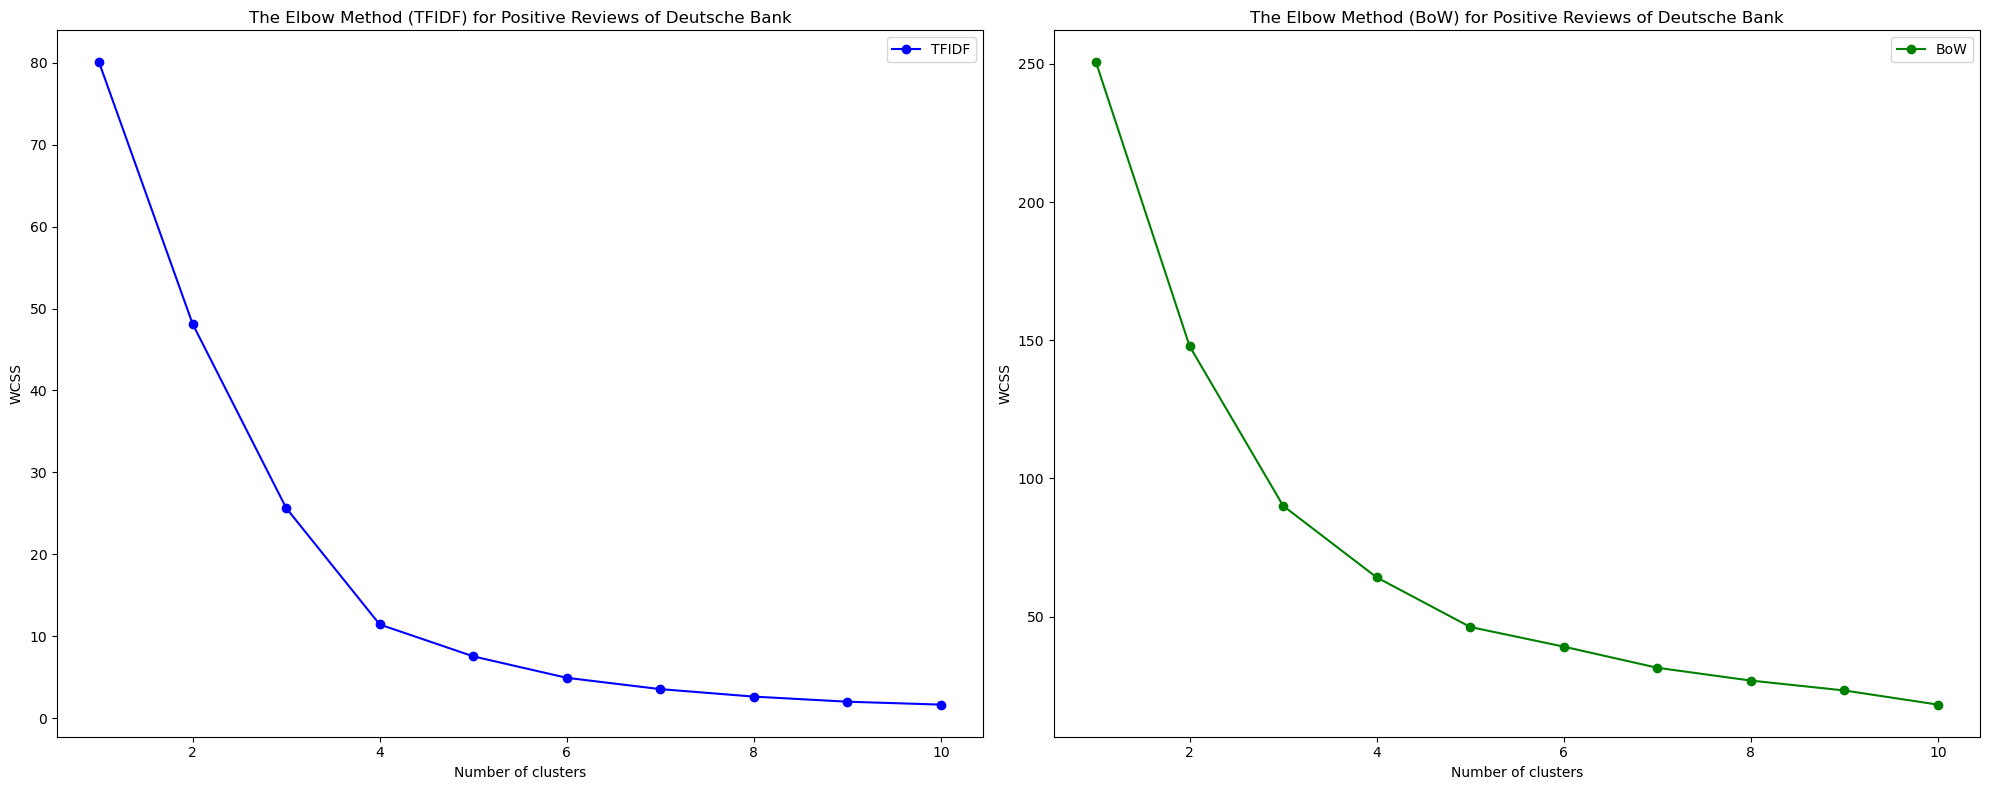

In [36]:
plt.figure(figsize=(20, 8))  # Set a larger figure size for two subplots

# Calculate WCSS for TFIDF
wcss_tfidf = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(db_pros_tfidf_matrix)
    wcss_tfidf.append(kmeans.inertia_)

# Calculate WCSS for BoW
wcss_bow = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(db_pros_bow_matrix)
    wcss_bow.append(kmeans.inertia_)

# First subplot for TFIDF
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss_tfidf, marker='o', color='blue', label='TFIDF')
plt.title('The Elbow Method (TFIDF) for Positive Reviews of Deutsche Bank')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()

# Second subplot for BoW
plt.subplot(1, 2, 2)
plt.plot(range(1, 11), wcss_bow, marker='o', color='green', label='BoW')
plt.title('The Elbow Method (BoW) for Positive Reviews of Deutsche Bank')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.tight_layout()
plt.show()

From both graphs, it shows that ***the optimal number of clusters is 5 as a suitable choice for both vectorization methods (TFIDF and BoW)***, indicating that increasing the number of clusters beyond 5 will not yield significantly more distinguished.

*To compare the effectiveness of these two approaches in clustering the text data,* I calculated **silhouette scores** for each representation. The silhouette scores provide insights into ***the quality of clustering achieved with each representation.*** The silhouette score ranges from -1 to 1, where a score closer to 1 indicates that the object is well-clustered, a score around 0 indicates overlapping clusters, and a negative score indicates that the object may be assigned to the wrong cluster.

In [37]:
# Calculate silhouette score for TFIDF and BoW
db_pros_score_tfidf = silhouette_score(db_pros_tfidf_matrix, db_pros_clusters_tfidf)
print(f"Silhouette Score (TFIDF): {db_pros_score_tfidf}")
db_pros_score_bow = silhouette_score(db_pros_bow_matrix, db_pros_clusters_bow)
print(f"Silhouette Score (BoW): {db_pros_score_bow}")

Silhouette Score (TFIDF): 0.8456017640971961
Silhouette Score (BoW): 0.6590811531491754


Based on the results shown, higher silhouette scores generally indicate better clustering quality, suggesting that **the TF-IDF representation**, *with a score of ~0.85,* may have led to ***more distinct and well-separated clusters*** compared to **the BoW representation**, *with a score of ~0.66.*

After that, I generated **word clouds** for each cluster in the dataset based on the TF-IDF and BoW representations of the ‘Pros_cleaned’ data to ***represent key themes and topics within each cluster***, *offering insights into employees feedback for organizational improvements.*

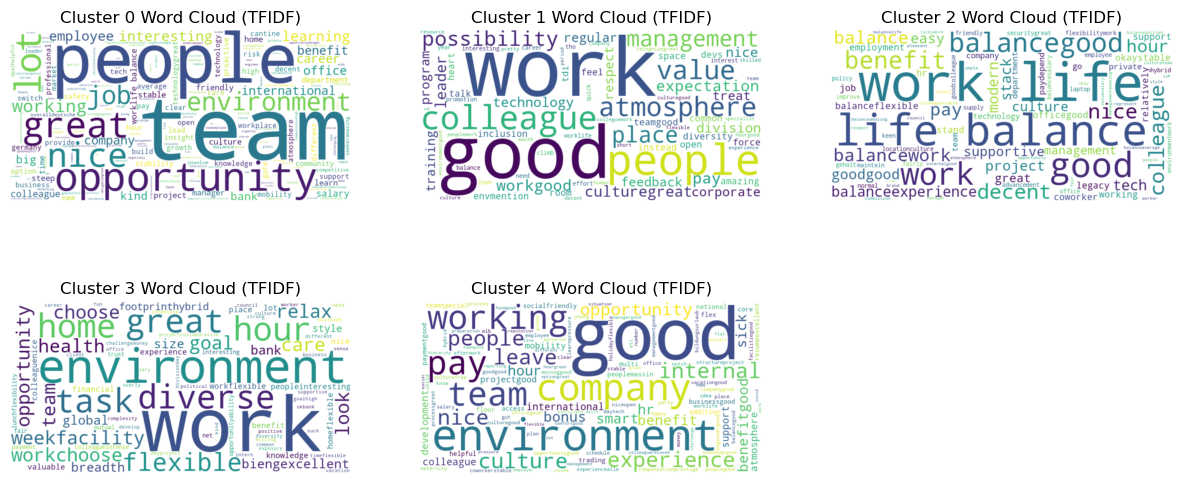

In [38]:
# Combine all text in each cluster into a single string
db_pros_clustertexts_tfidf = ["".join(db[db['db_Pros_cluster'] == i]['Pros_cleaned']) for i in range(db_pros_num_clusters_tfidf)]

plt.figure(figsize=(15, 10))
for i in range(db_pros_num_clusters_tfidf):
    wordcloud_tfidf = WordCloud(width=800, height=400, background_color='white', colormap= 'viridis').generate(db_pros_clustertexts_tfidf[i])
    plt.subplot(3, 3, i+1)  # Adjust subplot parameters as per your number of clusters
    plt.imshow(wordcloud_tfidf, interpolation='bilinear')
    plt.title(f'Cluster {i} Word Cloud (TFIDF)')
    plt.axis('off')
plt.show()

As shown, **cluster 0** focuses on *teamwork and the work opportunities*, **cluster 1** emphasizes *good colleagues and management*, **cluster 2** highlights *work-life balance and benefits*, **cluster 3** points to *diverse and flexible work environment*, and **cluster 4** mentions *good working experiences.*

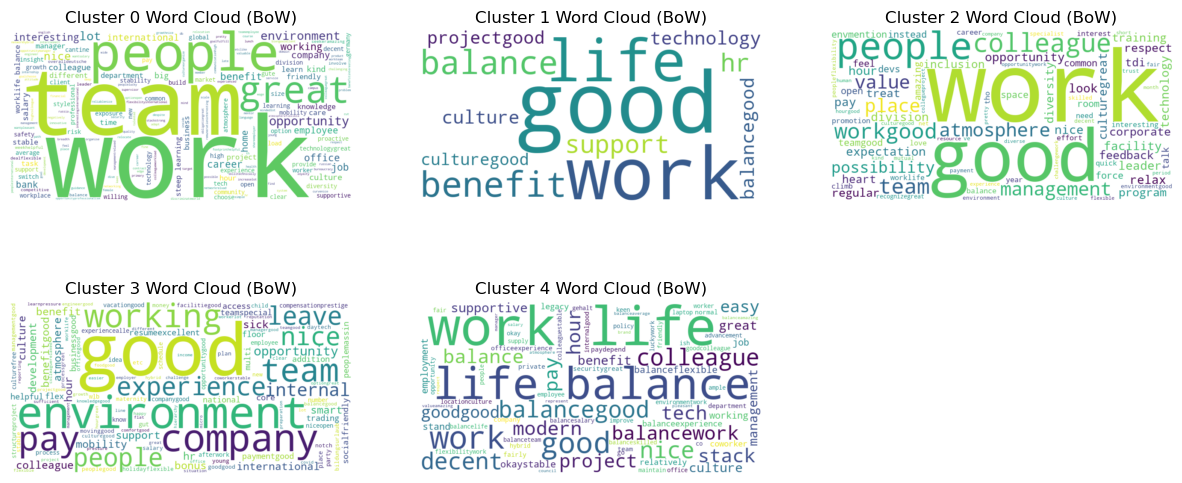

In [39]:
# Combine all text in each cluster into a single string
db_pros_clustertexts_bow = ["".join(db[db['db_Pros_cluster_bow'] == i]['Pros_cleaned']) for i in range(db_pros_num_clusters_bow)]

plt.figure(figsize=(15, 10))
for i in range(db_pros_num_clusters_bow):
    wordcloud_bow = WordCloud(width=800, height=400, background_color='white', colormap= 'viridis').generate(db_pros_clustertexts_bow[i])
    plt.subplot(3, 3, i+1)  # Adjust subplot parameters as per your number of clusters
    plt.imshow(wordcloud_bow, interpolation='bilinear')
    plt.title(f'Cluster {i} Word Cloud (BoW)')
    plt.axis('off')
plt.show()

In these word clouds, **cluster 0** highlights *teamwork and work opportunities*, **cluster 1** reflects *benefits and work-life balance*, **cluster 2** points to *good colleagues and work atmosphere*, **cluster 3** mentions *good working experiences and good environment* and **cluster 4** emphasizes *work-life balance.* However, it is noticeable that there are **some overlapping topics** such as ***work-life balance in clusters 1 and 4.*** Therefore, I could safely say that ***the BoW approach in this case is not showing the uniqueness of the text data as strong as the TF-IDF.***

After conducting text clustering using TF-IDF and Bag-of-Words (BoW) vectorizations,  KMeans clustering algorithm with the elbow method, calculating silhouette scores, and generating a series of word clouds, it appears that ***TF-IDF vectorization is better at capturing the nuances and uniqueness of the text data***, which is particularly useful in sentiment analysis. **Therefore, I will use TF-IDF vectorization for the subsequent sentiment analysis of the remaining job reviews.**

In the next step, I generated **summaries for each cluster**, highlighting *the key values expressed in the positive reviews of Deutsche Bank.*

In [40]:
# Tokenize and preprocess texts in each cluster
db_pros_cluster_texts = [db[db['db_Pros_cluster'] == i]['Pros_cleaned'] for i in range(db_pros_num_clusters_tfidf)]
db_pros_cluster_keywords = []

for texts in db_pros_cluster_texts:
    # Concatenate all texts in the cluster
    cluster_text = ' '.join(texts)
    # Tokenize and preprocess the concatenated text
    cluster_tokens = preprocess(cluster_text)
    # Extract unigrams, bigrams, and trigrams
    n = 3 # You can adjust this value to get n-grams of different lengths
    db_pros_cluster_ngrams = list(ngrams(cluster_tokens, n))
    # Count n-gram frequencies
    ngram_freq = Counter(db_pros_cluster_ngrams)
    # Select top keywords (you can adjust the number of keywords as needed)
    top_keywords = ngram_freq.most_common(5)  # Select top 10 n-grams
    # Append selected keywords to the cluster_keywords list
    db_pros_cluster_keywords.append([keyword for keyword, _ in top_keywords])

# Create cluster summaries based on selected keywords
db_pros_cluster_summaries = []
for i, keywords_list in enumerate(db_pros_cluster_keywords):
    # Extract only the n-grams from each tuple in keywords_list
    keywords = [' '.join(keyword) for keyword in keywords_list]
    db_pros_summary = f"Cluster {i} Summary: Individuals in this cluster value {', '.join(keywords)}."
    db_pros_cluster_summaries.append(db_pros_summary)

# Print cluster summaries
for db_pros_summary in db_pros_cluster_summaries:
    print(db_pros_summary)

Cluster 0 Summary: Individuals in this cluster value steep learning curve, environment team open, team open competitive, open competitive people, competitive people kind.
Cluster 1 Summary: Individuals in this cluster value good atmosphere work, atmosphere work good, work good pay, good pay work, pay work expectation.
Cluster 2 Summary: Individuals in this cluster value work life balance, good work life, life balance good, balance good work, life balance work.
Cluster 3 Summary: Individuals in this cluster value flexible work week, work week facility, week facility relax, facility relax work, relax work hour.
Cluster 4 Summary: Individuals in this cluster value good benefit good, good culture good, trading floor experience, floor experience good, experience good social.


As shown, **cluster 0** highlights *growth opportunities and a supportive team environment.* Meanwhile, **cluster 1** mentions *a positive work atmosphere and fair compensation.* **Cluster 2** emphasizes *work-life balance*, while **cluster 3** appreciates *flexible work arrangements.* Finally, **cluster 4** points to *benefits, fostering a positive culture, and providing enriching experiences.* 

Then, I created a visualization to **show the distribution of positive comments at Deutsche Bank across different clusters.**

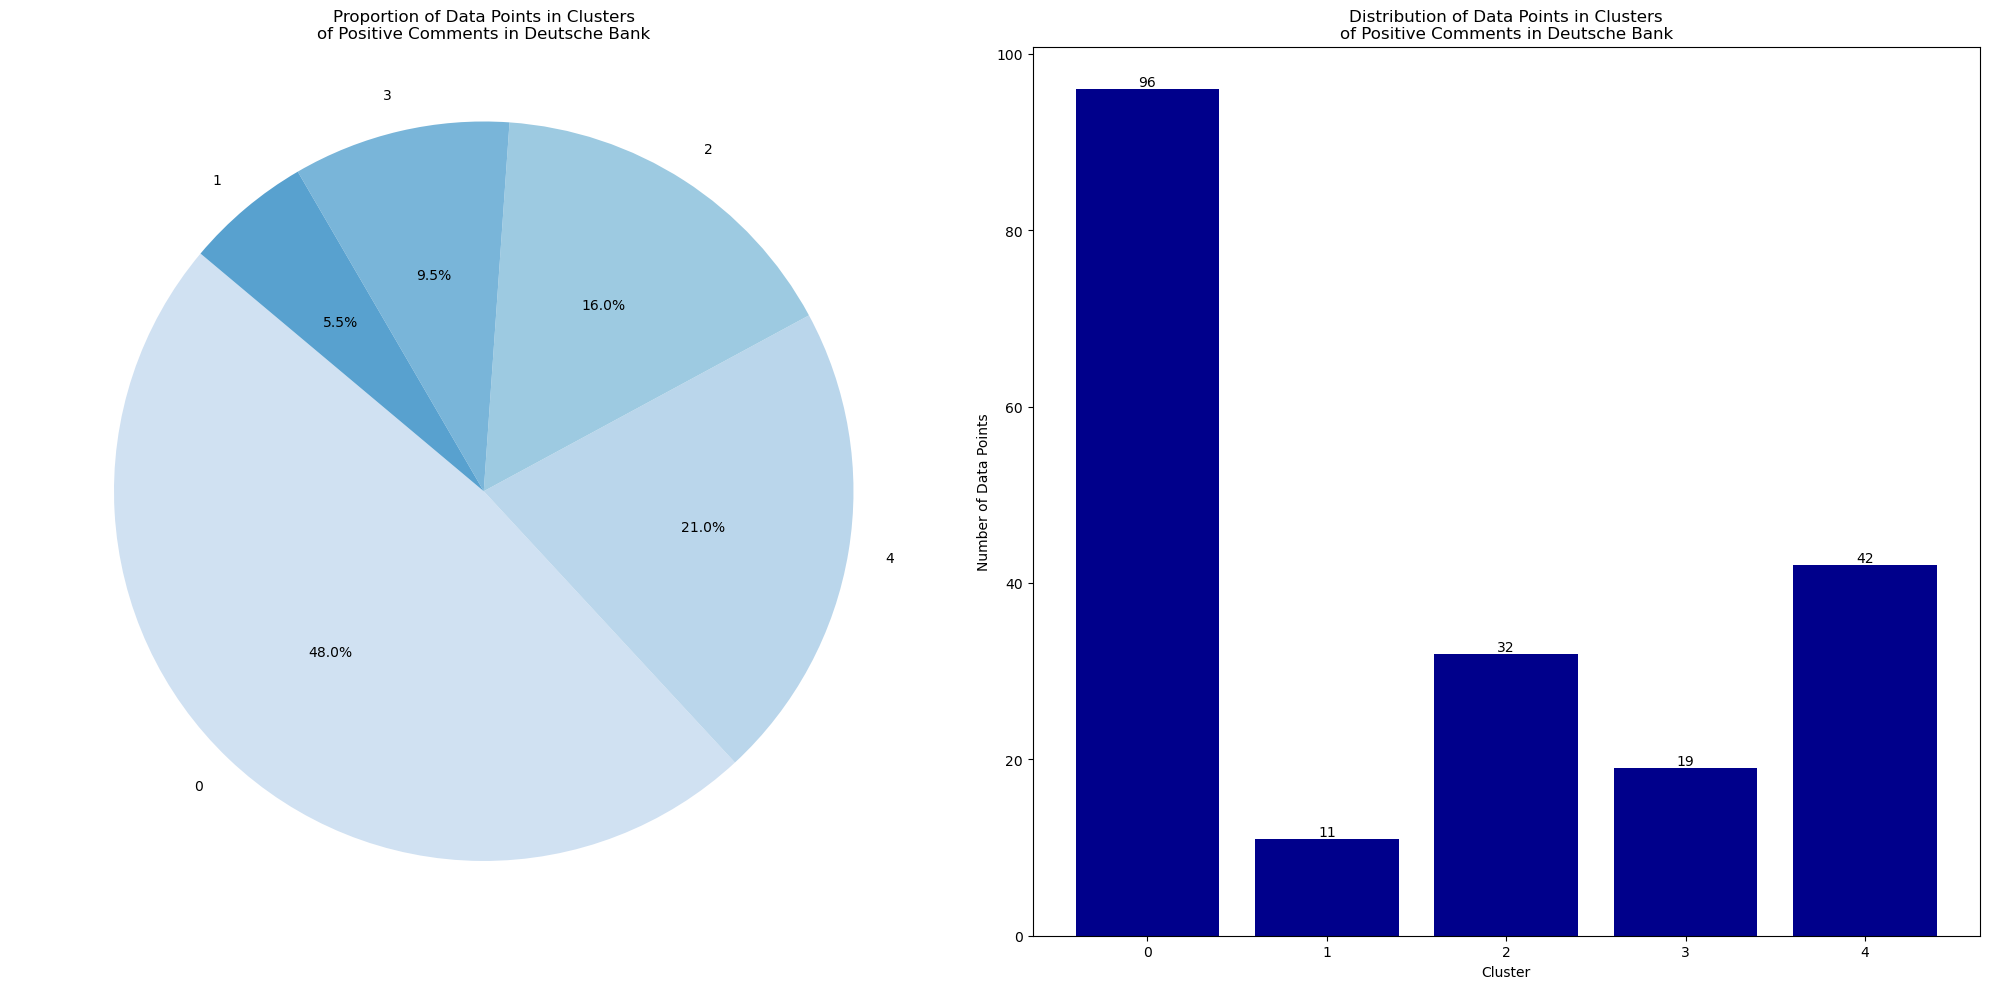

In [41]:
# Count the number of data points in each cluster
db_pros_cluster_counts = db['db_Pros_cluster'].value_counts()

# Define custom colors 
blue_custom_colors = plt.cm.Blues(np.linspace(0.2, 1, 10))
darkblue_custom_color = ['darkblue' for _ in range(len(db_pros_cluster_counts))]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create a pie chart in the first and second subplot
axes[0].pie(db_pros_cluster_counts.values, labels=db_pros_cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=blue_custom_colors)
axes[0].set_title('Proportion of Data Points in Clusters\nof Positive Comments in Deutsche Bank')
axes[0].axis('equal') 

bars = axes[1].bar(db_pros_cluster_counts.index, db_pros_cluster_counts.values, color=darkblue_custom_color)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Data Points')
axes[1].set_title('Distribution of Data Points in Clusters\nof Positive Comments in Deutsche Bank')
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

This visual analysis shows that **Cluster 0 holds the majority with 48% or 96 comments,** implying that *employees appreciate teamwork and the work opportunities the most.* **Clusters 2 and 4 have a substantial amount of comments, with 32 (16%) and 42 (21%),respectively,** reflecting that *employees have work-life balance and good working experiences.*

### (2) Clustering Negative Reviews about Working in Deutsche Bank

Then, I performed **text clustering** on the 'Cons_cleaned' data from the 'db' dataset ***using the TF-IDF representation with the same ‘ngram range’ as before***, including ***the elbow method*** and ***silhouette score.*** Moreover, I generated **wordclouds** and **word summaries for each cluster** to show *the key themes of the negative reviews from their Deutsche Bank’s employees.*

In [42]:
# Initialize TfidfVectorizer with ngram_range for single words, bigrams, and trigrams
db_cons_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=5)

# Fit and transform the entire preprocessed text data into TF-IDF model for Cons
db_cons_matrix = db_cons_vectorizer.fit_transform(db['Cons_cleaned'])

# Define the number of clusters
db_cons_num_clusters = 6 

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=db_cons_num_clusters, random_state=42)

# Fit KMeans on the TF-IDF data
kmeans.fit(db_cons_matrix)

# Predict the cluster labels for each document
db_cons_clusters = kmeans.labels_

# Add cluster labels to your DataFrame
db['db_Cons_cluster'] = db_cons_clusters

# Sample analysis: Print texts belonging to a specific cluster
for i in range(db_cons_num_clusters):
    print(f"Cluster {i} texts:")
    print(db[db['db_Cons_cluster'] == i]['Cons_cleaned'].head())
    print("\n")

Cluster 0 texts:
16    usual large bank like bureaucracy poor hr proc...
19    process long include hire horizontal mobility ...
57                              chaotic process forever
74                          complex system slow process
79                                     lot process slow
Name: Cons_cleaned, dtype: object


Cluster 1 texts:
0                            temporary contract salary
1     globally lack bb bank keep closely ensure low bb
3                        corona time difficult network
6                                       not know thank
7    heavy workload week little understanding workl...
Name: Cons_cleaned, dtype: object


Cluster 2 texts:
34              exactly expect big company hard upwards
46                               bad experience company
60    big company bureaucracy finance sector mean se...
62                     big company process bureaucratic
84                                 ofcourse big company
Name: Cons_cleaned, dtype: object


Cluste

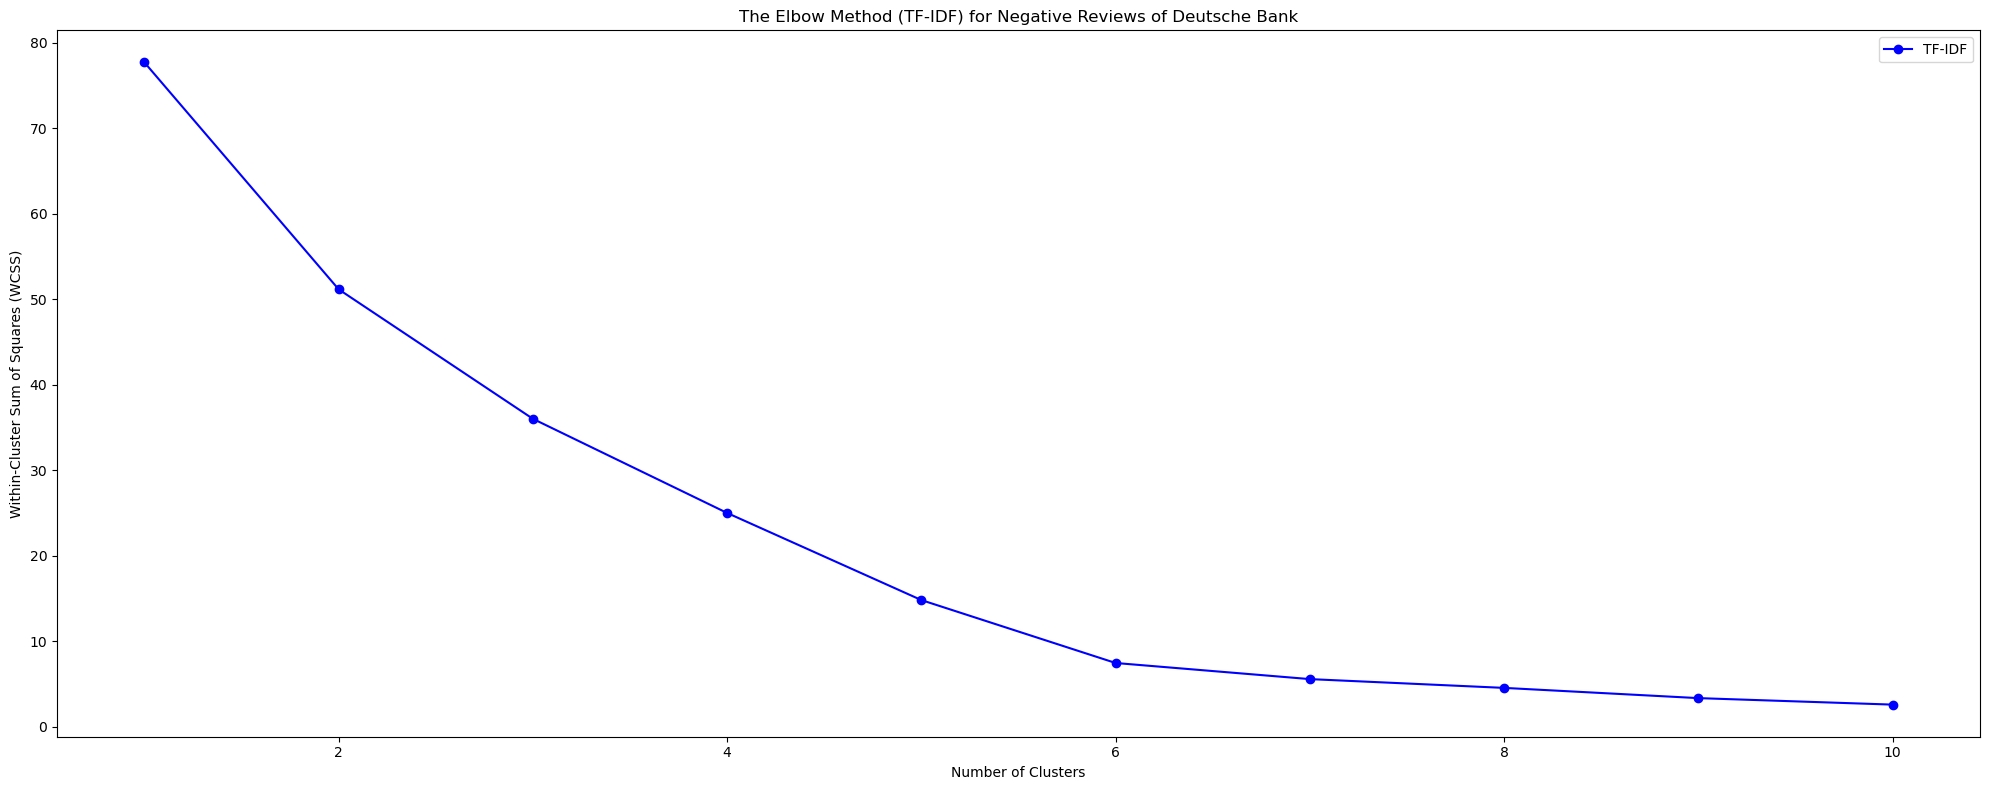

In [43]:
plt.figure(figsize=(20, 8))  # Set a larger figure size for two subplots

# Calculate WCSS for TFIDF
wcss_tfidf = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(db_cons_matrix)
    wcss_tfidf.append(kmeans.inertia_)

# Plot the elbow curve for TFIDF
plt.plot(range(1, 11), wcss_tfidf, marker='o', color='blue', label='TF-IDF')

# Add labels and title
plt.title('The Elbow Method (TF-IDF) for Negative Reviews of Deutsche Bank')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.tight_layout()
plt.show()

In [44]:
# Calculate silhouette score
db_cons_score = silhouette_score(db_cons_matrix, db_cons_clusters)
print(f"Silhouette Score (TFIDF): {db_cons_score}")

Silhouette Score (TFIDF): 0.883859153834744


Based on the elbow method and silhouette score analysis, I selected ***6 clusters to categorize the negative reviews of Deutsche Bank,*** achieving *a silhouette score of approximately 0.88.*

Then, I created **word clouds** and **top-5-word summaries of each cluster** *to discover the prominent themes among the negative feedback from N26’s employees.* 

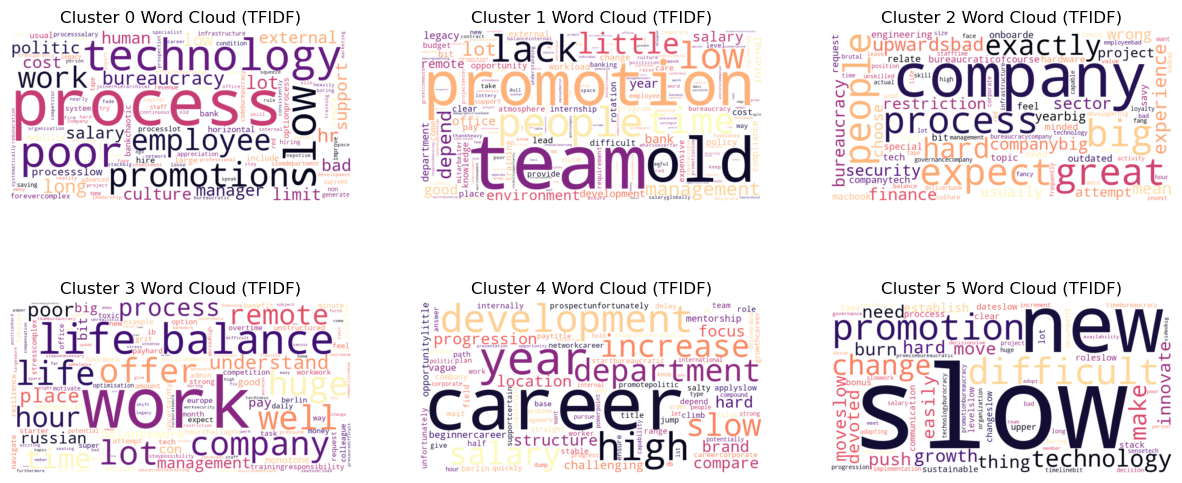

In [45]:
# Combine all text in each cluster into a single string
db_cons_clusters = ["".join(db[db['db_Cons_cluster'] == i]['Cons_cleaned']) for i in range(db_cons_num_clusters)]

# Generate word clouds for each cluster
plt.figure(figsize=(15, 10))
for i in range(db_cons_num_clusters):
    # Check if the cluster has any words
    if db_cons_clusters[i]:
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(db_cons_clusters[i])
        plt.subplot(3, 3, i+1)  # Adjust subplot parameters as per your number of clusters
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Cluster {i} Word Cloud (TFIDF)')
        plt.axis('off')
    else:
        print(f"Cluster {i} has no words.")
plt.show()

In [46]:
# Tokenize and preprocess texts in each cluster
db_cons_cluster_texts = [db[db['db_Cons_cluster'] == i]['Cons_cleaned'] for i in range(db_cons_num_clusters)]
db_cons_cluster_keywords = []

for texts in db_cons_cluster_texts:
    # Concatenate all texts in the cluster
    cluster_text = ' '.join(texts)
    # Tokenize and preprocess the concatenated text
    cluster_tokens = preprocess(cluster_text)
    # Extract unigrams, bigrams, and trigrams
    n = 3  # You can adjust this value to get n-grams of different lengths
    db_cons_cluster_ngrams = list(ngrams(cluster_tokens, n))
    # Count n-gram frequencies
    ngram_freq = Counter(db_cons_cluster_ngrams)
    # Select top keywords (you can adjust the number of keywords as needed)
    top_keywords = ngram_freq.most_common(5)  # Select top 10 n-grams
    # Append selected keywords to the cluster_keywords list
    db_cons_cluster_keywords.append([keyword for keyword, _ in top_keywords])

# Create cluster summaries based on selected keywords
db_cons_cluster_summaries = []
for i, keywords_list in enumerate(db_cons_cluster_keywords):
    # Extract only the n-grams from each tuple in keywords_list
    keywords = [' '.join(keyword) for keyword in keywords_list]
    db_cons_summary = f"Cluster {i} Summary: Individuals in this cluster value {', '.join(keywords)}."
    db_cons_cluster_summaries.append(db_cons_summary)

# Print cluster summaries
for db_cons_summary in db_cons_cluster_summaries:
    print(db_cons_summary)

Cluster 0 Summary: Individuals in this cluster value usual large bank, large bank like, bank like bureaucracy, like bureaucracy poor, bureaucracy poor hr.
Cluster 1 Summary: Individuals in this cluster value promotion low pay, temporary contract salary, contract salary globally, salary globally lack, globally lack bb.
Cluster 2 Summary: Individuals in this cluster value exactly expect big, expect big company, big company hard, company hard upwards, hard upwards bad.
Cluster 3 Summary: Individuals in this cluster value work life balance, bad work life, monotone work good, work good training, good training responsibility.
Cluster 4 Summary: Individuals in this cluster value challenging career beginner, career beginner career, beginner career development, career development opportunity, development opportunity little.
Cluster 5 Summary: Individuals in this cluster value slow growth need, growth need push, need push hard, push hard thing, hard thing slow.


As you can see, **cluster 0** shows dissatisfaction with *typical large bank bureaucracy and poor HR practices.* **Cluster 1** emphasizes concerns about *low pay, temporary contracts, and a lack of promotion opportunities.* **Cluster 2** expresses disappointment in *unrealistic expectations and challenges within a big company.* **Cluster 3** identifies issues with *work-life balance.* **Cluster 4** expresses frustrations with *limited career development opportunities.* Finally, **cluster 5** highlights concerns about *slow career growth and the need for more challenging opportunities.*

Then, I created the visualization to illustrate **the distribution of Deutsche Bank’s negative comments across various clusters.**

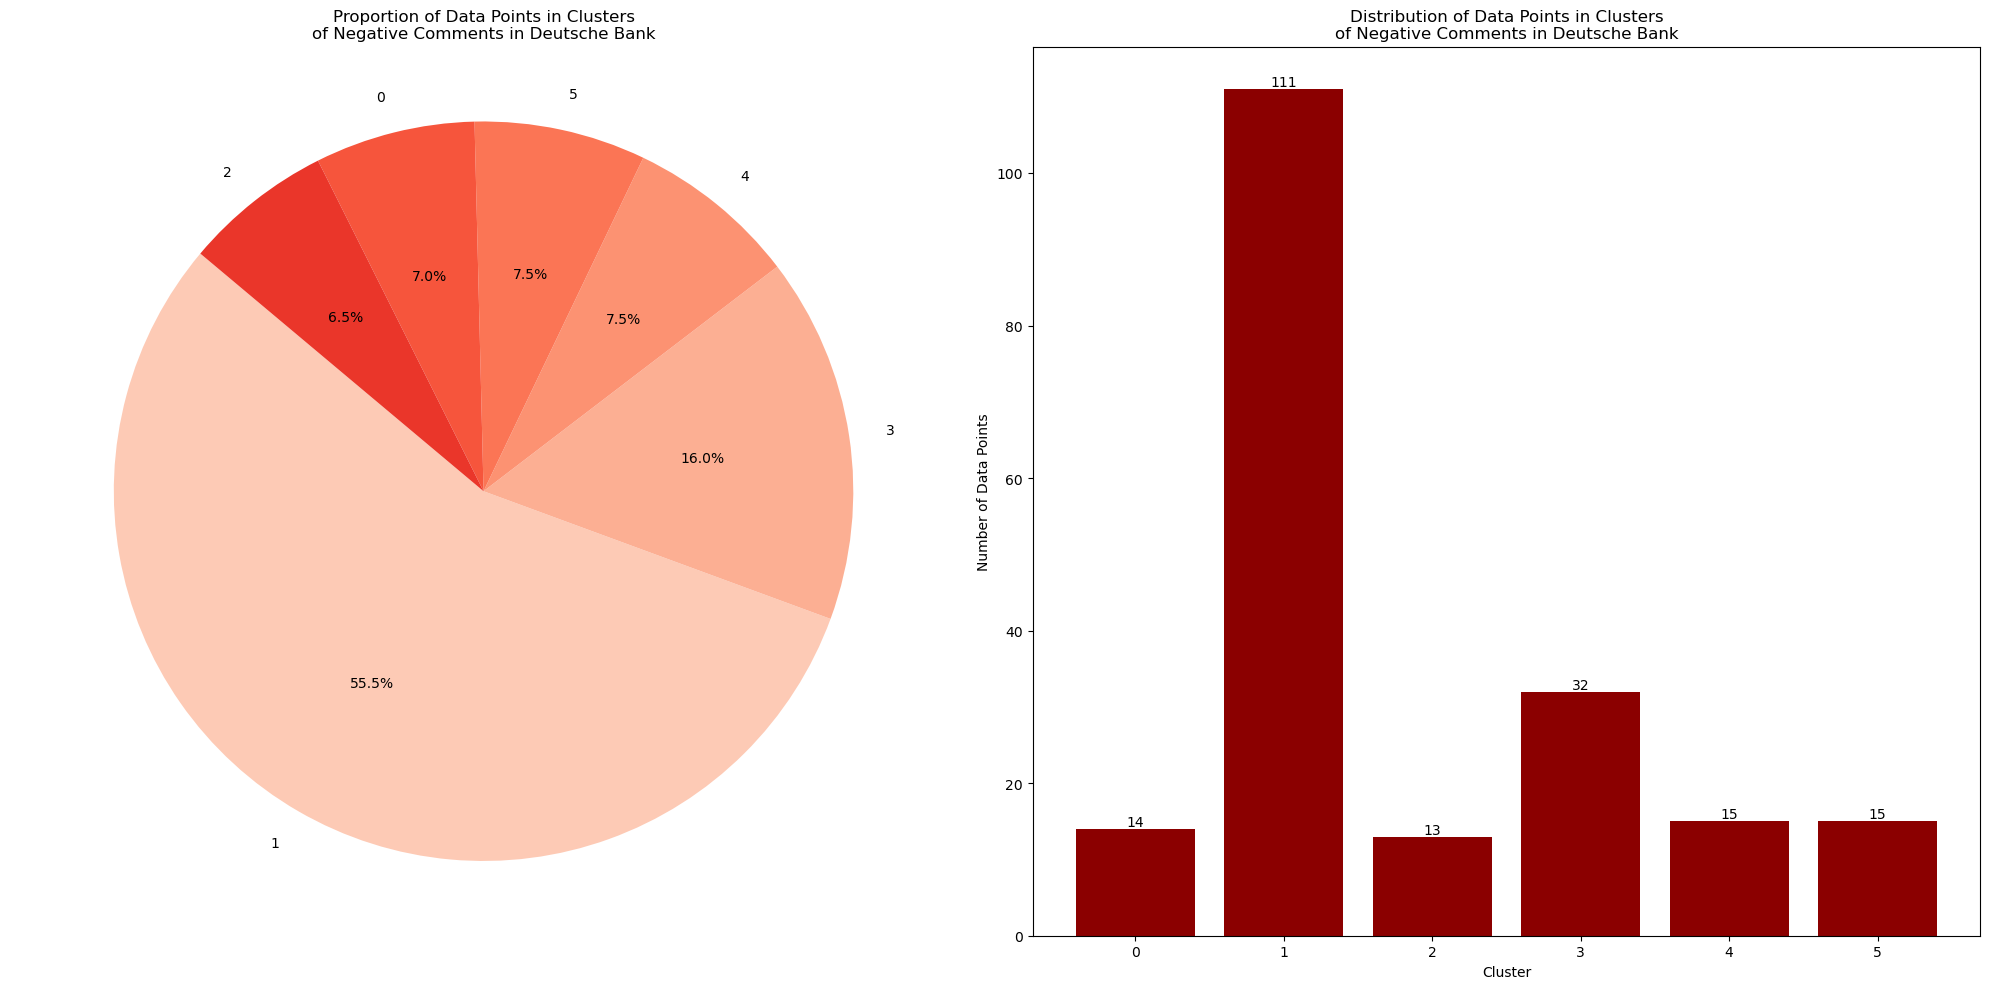

In [47]:
# Count the number of data points in each cluster
db_cons_cluster_counts = db['db_Cons_cluster'].value_counts()

# Define custom colors for the pie chart
red_custom_colors = plt.cm.Reds(np.linspace(0.2, 1, 10))
# Define custom colors for the bar chart
darkred_custom_color = ['darkred' for _ in range(len(db_cons_cluster_counts))]

# Create a 1x2 subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create a pie chart in the first subplot
axes[0].pie(db_cons_cluster_counts.values, labels=db_cons_cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=red_custom_colors)
axes[0].set_title('Proportion of Data Points in Clusters\nof Negative Comments in Deutsche Bank')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a bar plot in the second subplot
bars = axes[1].bar(db_cons_cluster_counts.index, db_cons_cluster_counts.values, color=darkred_custom_color)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Data Points')
axes[1].set_title('Distribution of Data Points in Clusters\nof Negative Comments in Deutsche Bank')

# Add count and percentage labels on the bar plot
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')
    #percent = f'{100 * yval / len(db):.1f}%'
    #axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'({percent})', ha='center', va='top', color='white')

# Adjust the layout so there's no overlap
plt.tight_layout()
plt.show()

Noticeably, **cluster 1** emerges with the largest share, comprising **55.5% or 111 comments**, indicative of *prevalent concerns regarding low pay and a lack of promotion opportunities among employees.* Additionally, **cluster 2** also exhibits a significant volume of comments, representing **16% or 32 comments**, highlighting *work-life balance as another prominent theme of dissatisfaction.*

### (3) Clustering Positive Reviews about Working in N26

To uncover the main themes within N26's positive reviews, I conducted **text clustering** on the 'Pros_cleaned' data from the 'n26' dataset. Employing methods similar to those used previously, ***I adjusted the ngram range to include only bigrams and trigrams.*** *This modification led to a higher silhouette score and enhanced the uniqueness of the text data.*

In [48]:
# Initialize TfidfVectorizer with ngram_range for bigrams and trigrams
n26_pros_vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=5)

# Fit and transform the entire preprocessed text data into TF-IDF model for Cons
n26_pros_matrix = n26_pros_vectorizer.fit_transform(n26['Pros_cleaned'])

# Define the number of clusters
n26_pros_num_clusters = 5

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=n26_pros_num_clusters, random_state=42)

# Fit KMeans on the TF-IDF data
kmeans.fit(n26_pros_matrix)

# Predict the cluster labels for each document
n26_pros_clusters = kmeans.labels_

# Add cluster labels to your DataFrame
n26['n26_Pros_cluster'] = n26_pros_clusters

# Sample analysis: Print texts belonging to a specific cluster
for i in range(n26_pros_num_clusters):
    print(f"Cluster {i} texts:")
    print(n26[n26['n26_Pros_cluster'] == i]['Pros_cleaned'].head())
    print("\n")

Cluster 0 texts:
0                good team setup solid way work
2                    team nice hard work people
3                 diverse work lot house talent
4    wonderful people work state art tech stack
6                           company interesting
Name: Pros_cleaned, dtype: object


Cluster 1 texts:
32                               great team member work
56                         great team leader management
66            stable salary great team offer relocation
82    meaningful impact project responsibility scope...
95    payrise come year free lunch meal month office...
Name: Pros_cleaned, dtype: object


Cluster 2 texts:
1     work environment relax well works council ente...
10    company fairly diverse interesting lot profess...
43    great work environment nice people great flexi...
61    work environment leadership interesting work d...
96                  nice work environment nice employee
Name: Pros_cleaned, dtype: object


Cluster 3 texts:
5                       

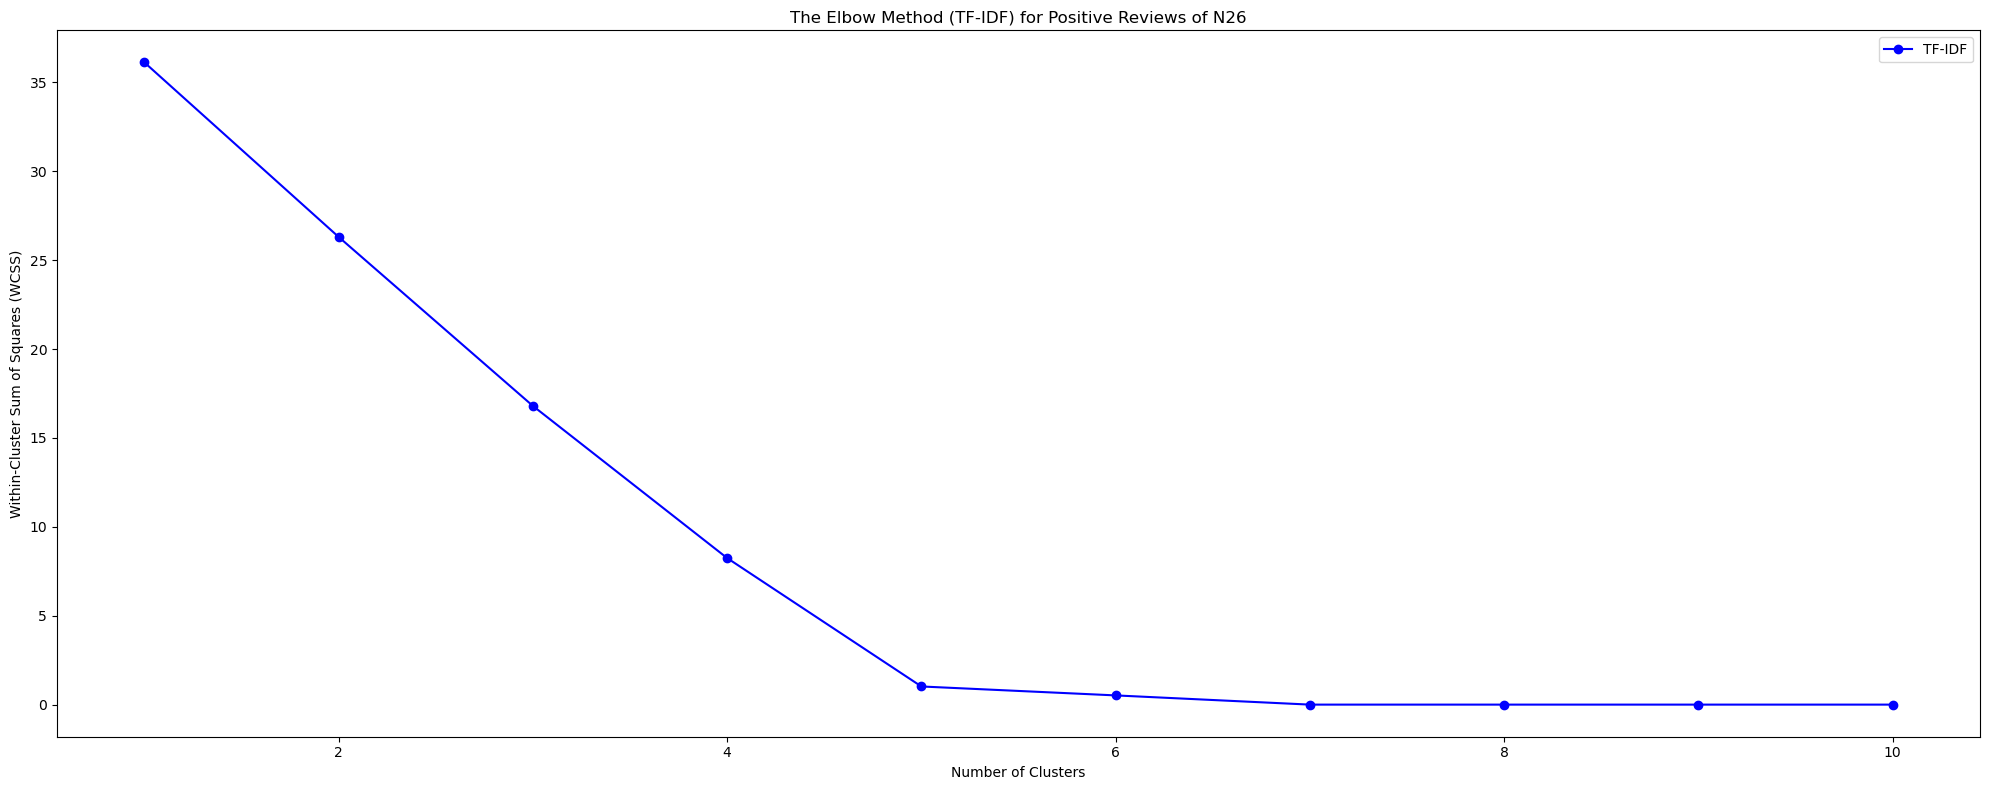

In [49]:
plt.figure(figsize=(20, 8))  # Set a larger figure size for two subplots

# Calculate WCSS for TFIDF
wcss_tfidf = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(n26_pros_matrix)
    wcss_tfidf.append(kmeans.inertia_)

# Plot the elbow curve for TFIDF
plt.plot(range(1, 11), wcss_tfidf, marker='o', color='blue', label='TF-IDF')

# Add labels and title
plt.title('The Elbow Method (TF-IDF) for Positive Reviews of N26')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
# Calculate silhouette score
n26_pros_score = silhouette_score(n26_pros_matrix, n26_pros_clusters)
print(f"Silhouette Score (TFIDF): {n26_pros_score}")

Silhouette Score (TFIDF): 0.9830744032652657


Based on the elbow method and silhouette score, **5 clusters is effective to categorize the positive reviews of N26**, achieving *a silhouette score of approximately 0.98.*

Then, I created **word clouds** and **top-10-word summaries of each cluster** *to discover the prevalent topics emerging from the positive feedback from N26’s employees.* 

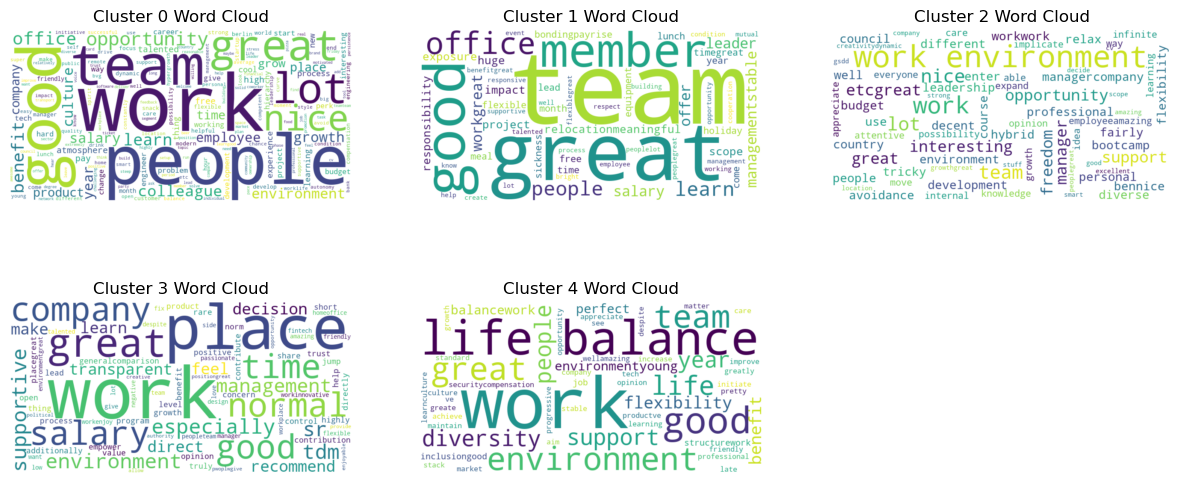

In [51]:
# Combine all text in each cluster into a single string
n26_pros_cluster_texts = ["".join(n26[n26['n26_Pros_cluster'] == i]['Pros_cleaned']) for i in range(n26_pros_num_clusters)]

# Generate word clouds for each cluster
plt.figure(figsize=(15, 10))
for i in range(n26_pros_num_clusters):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'viridis').generate(n26_pros_cluster_texts[i])
    plt.subplot(3, 3, i+1)  # Adjust subplot parameters as per your number of clusters
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {i} Word Cloud')
    plt.axis('off')
plt.show()

In [52]:
# Tokenize and preprocess texts in each cluster
n26_pros_cluster_texts = [n26[n26['n26_Pros_cluster'] == i]['Pros_cleaned'] for i in range(n26_pros_num_clusters)]
n26_pros_cluster_keywords = []

for texts in n26_pros_cluster_texts:
    # Concatenate all texts in the cluster
    cluster_text = ' '.join(texts)
    # Tokenize and preprocess the concatenated text
    cluster_tokens = preprocess(cluster_text)
    # Extract unigrams, bigrams, and trigrams
    n = 3  # You can adjust this value to get n-grams of different lengths
    n26_pros_cluster_ngrams = list(ngrams(cluster_tokens, n))
    # Count n-gram frequencies
    ngram_freq = Counter(n26_pros_cluster_ngrams)
    # Select top keywords (you can adjust the number of keywords as needed)
    top_keywords = ngram_freq.most_common(5)  # Select top 10 n-grams
    # Append selected keywords to the cluster_keywords list
    n26_pros_cluster_keywords.append([keyword for keyword, _ in top_keywords])

# Create cluster summaries based on selected keywords
n26_pros_cluster_summaries = []
for i, keywords_list in enumerate(n26_pros_cluster_keywords):
    # Extract only the n-grams from each tuple in keywords_list
    keywords = [' '.join(keyword) for keyword in keywords_list]
    n26_pros_summary = f"Cluster {i} Summary: Individuals in this cluster value {', '.join(keywords)}."
    n26_pros_cluster_summaries.append(n26_pros_summary)

# Print cluster summaries
for n26_pros_summary in n26_pros_cluster_summaries:
    print(n26_pros_summary)

Cluster 0 Summary: Individuals in this cluster value good worklife balance, team flexible working, learning curve good, steep learning curve, personal development budget.
Cluster 1 Summary: Individuals in this cluster value great team member, team member work, member work great, work great team, great team leader.
Cluster 2 Summary: Individuals in this cluster value great work environment, etc great work, work environment nice, nice work environment, work environment lot.
Cluster 3 Summary: Individuals in this cluster value great place work, good place work, place work general, work general comparison, general comparison place.
Cluster 4 Summary: Individuals in this cluster value work life balance, good team diversity, good work life, life balance flexibility, balance flexibility good.


As shown, **cluster 0** reflects *flexible team dynamics and opportunities for personal development.* **Cluster 1** appreciates *the strength of teamwork,* while **cluster 2** highlights *a supportive and pleasant work environment.* **Cluster 3** points N26 to *a great place to work.* Lastly, **cluster 4** highlights *work-life balance, the diversity of the team, and the flexibility provided.*

Then, I created the visualization as below to illustrate the distribution of N26’s negative comments across various clusters

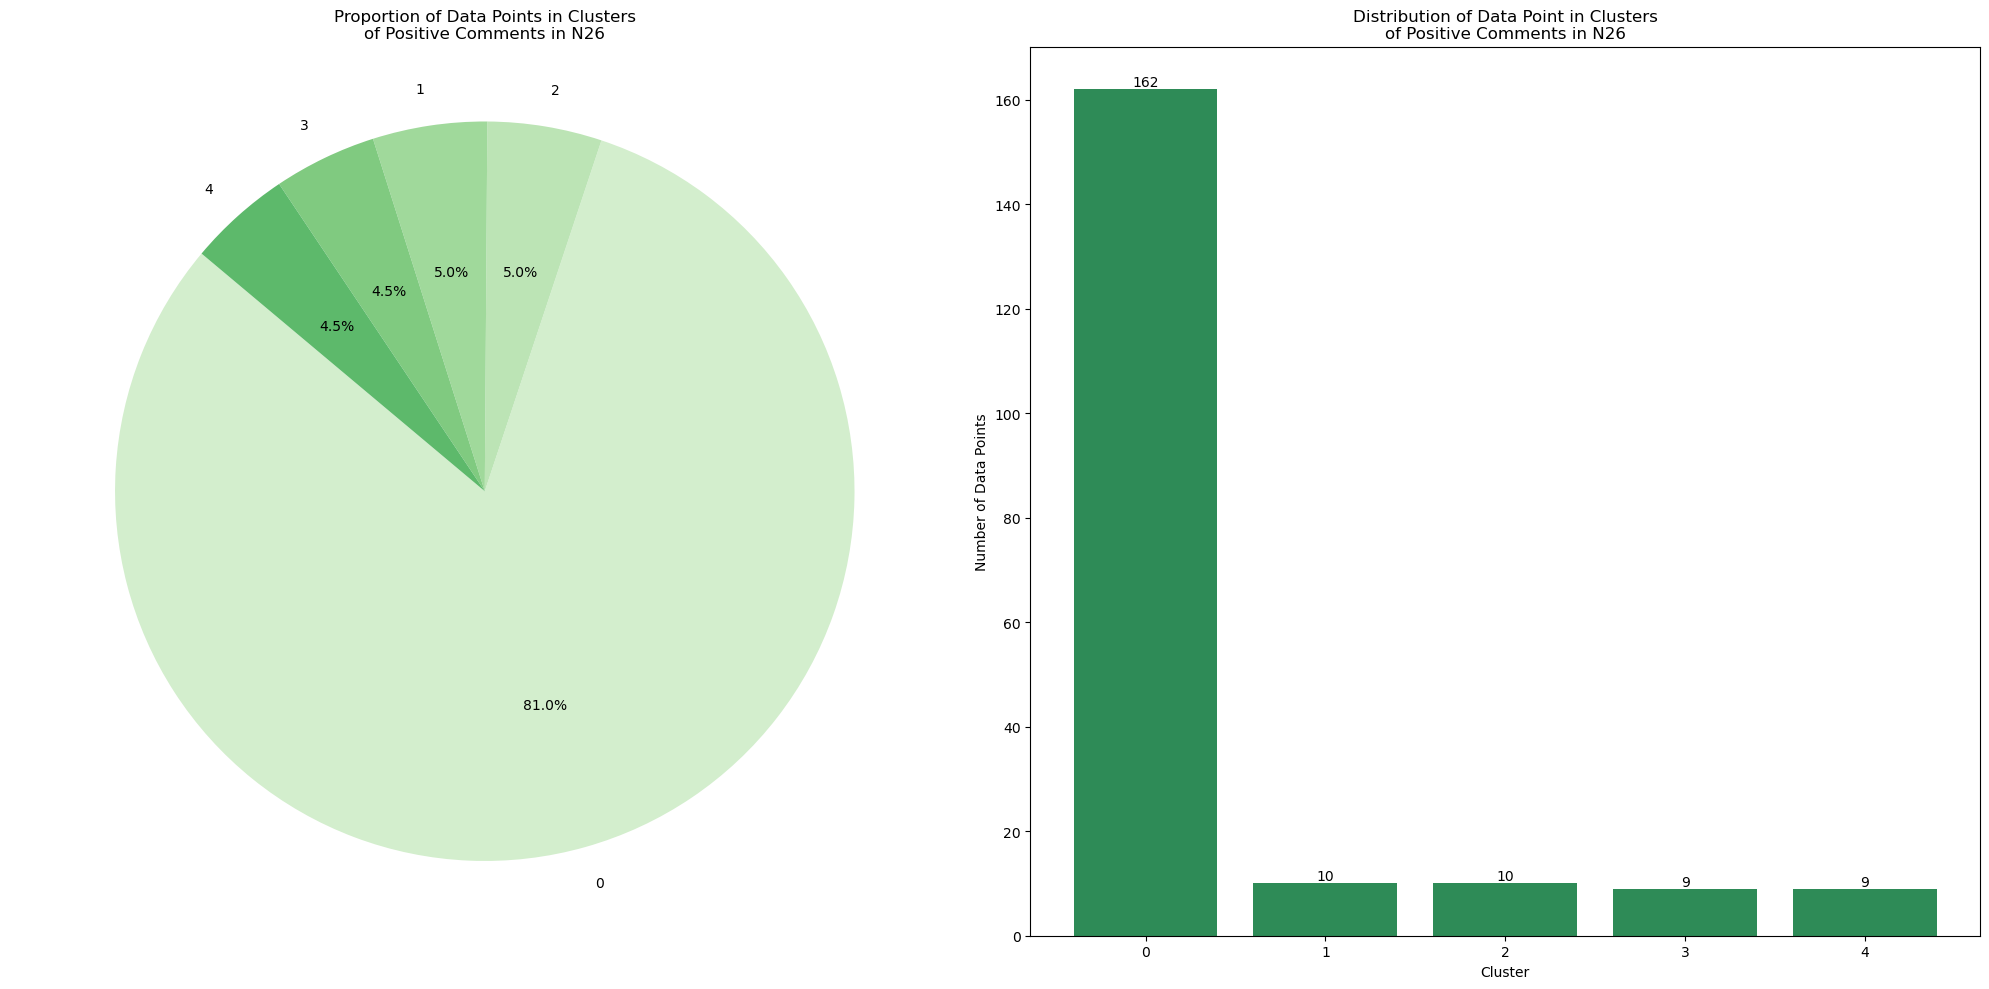

In [53]:
# Count the number of data points in each cluster
n26_pros_cluster_counts = n26['n26_Pros_cluster'].value_counts()

# Define custom colors
green_custom_colors = plt.cm.Greens(np.linspace(0.2, 1, 10))
seagreen_custom_color = ['seagreen' for _ in range(len(n26_pros_cluster_counts))]

# Create a 1x2 subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create a pie chart in the first subplot
axes[0].pie(n26_pros_cluster_counts.values, labels=n26_pros_cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=green_custom_colors)
axes[0].set_title('Proportion of Data Points in Clusters\nof Positive Comments in N26')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a bar plot in the second subplot
bars = axes[1].bar(n26_pros_cluster_counts.index, n26_pros_cluster_counts.values, color=seagreen_custom_color)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Data Points')
axes[1].set_title('Distribution of Data Point in Clusters\nof Positive Comments in N26')

# Add count and percentage labels on the bar plot
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')

# Adjust the layout so there's no overlap
plt.tight_layout()
plt.show()

This visualization reveals that **cluster 0 is predominant with 81% or 162 comments**, indicating that *employees are satisfied with flexible team dynamics and opportunities for personal development the most.* **Clusters 1 and 2** each account for 5% of the comments, reflecting that employees appreciate the strength of teamwork and a supportive and pleasant work environment.

### (4) Clustering Negative Reviews about Working in N26

Lastly, I performed **text clustering** on the 'Cons_cleaned' data from the 'n26' dataset with similar methods and the ngram range as previously ***to find the main themes within N26's positive reviews.***

In [54]:
# Initialize TfidfVectorizer with ngram_range for bigrams and trigrams
n26_cons_vectorizer = TfidfVectorizer(ngram_range=(2, 3), max_features=5)

# Fit and transform the entire preprocessed text data into TF-IDF model for Cons
n26_cons_matrix = n26_cons_vectorizer.fit_transform(n26['Cons_cleaned'])

# Define the number of clusters
n26_cons_num_clusters = 5

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=n26_cons_num_clusters, random_state=42)

# Fit KMeans on the TF-IDF data
kmeans.fit(n26_cons_matrix)

# Predict the cluster labels for each document
n26_cons_clusters = kmeans.labels_

# Add cluster labels to your DataFrame
n26['n26_Cons_cluster'] = n26_cons_clusters

# Sample analysis: Print texts belonging to a specific cluster
for i in range(n26_cons_num_clusters):
    print(f"Cluster {i} texts:")
    print(n26[n26['n26_Cons_cluster'] == i]['Cons_cleaned'].head())
    print("\n")

Cluster 0 texts:
0    management crisis high turnover management lev...
1    management ready listen opinion different thei...
2    manager company support wonderful people contr...
3                   uncertainty organisation direction
4    project workflow lose thread change happen eas...
Name: Cons_cleaned, dtype: object


Cluster 1 texts:
116    poor process handle difficult company culture ...
127    people leave company believe interin position ...
175    founder boy club austrians care money company ...
178    ceo baby work end quit dominos effect people l...
184    leadership hr extremely qualified lead insecur...
Name: Cons_cleaned, dtype: object


Cluster 2 texts:
18     hear not experience upper management toxic dem...
19     lot technical debt compliance requirement bure...
64     terrible management constant change team struc...
164    main issue imho upper management direction com...
199    experience month not positive change bad polit...
Name: Cons_cleaned, dtype: objec

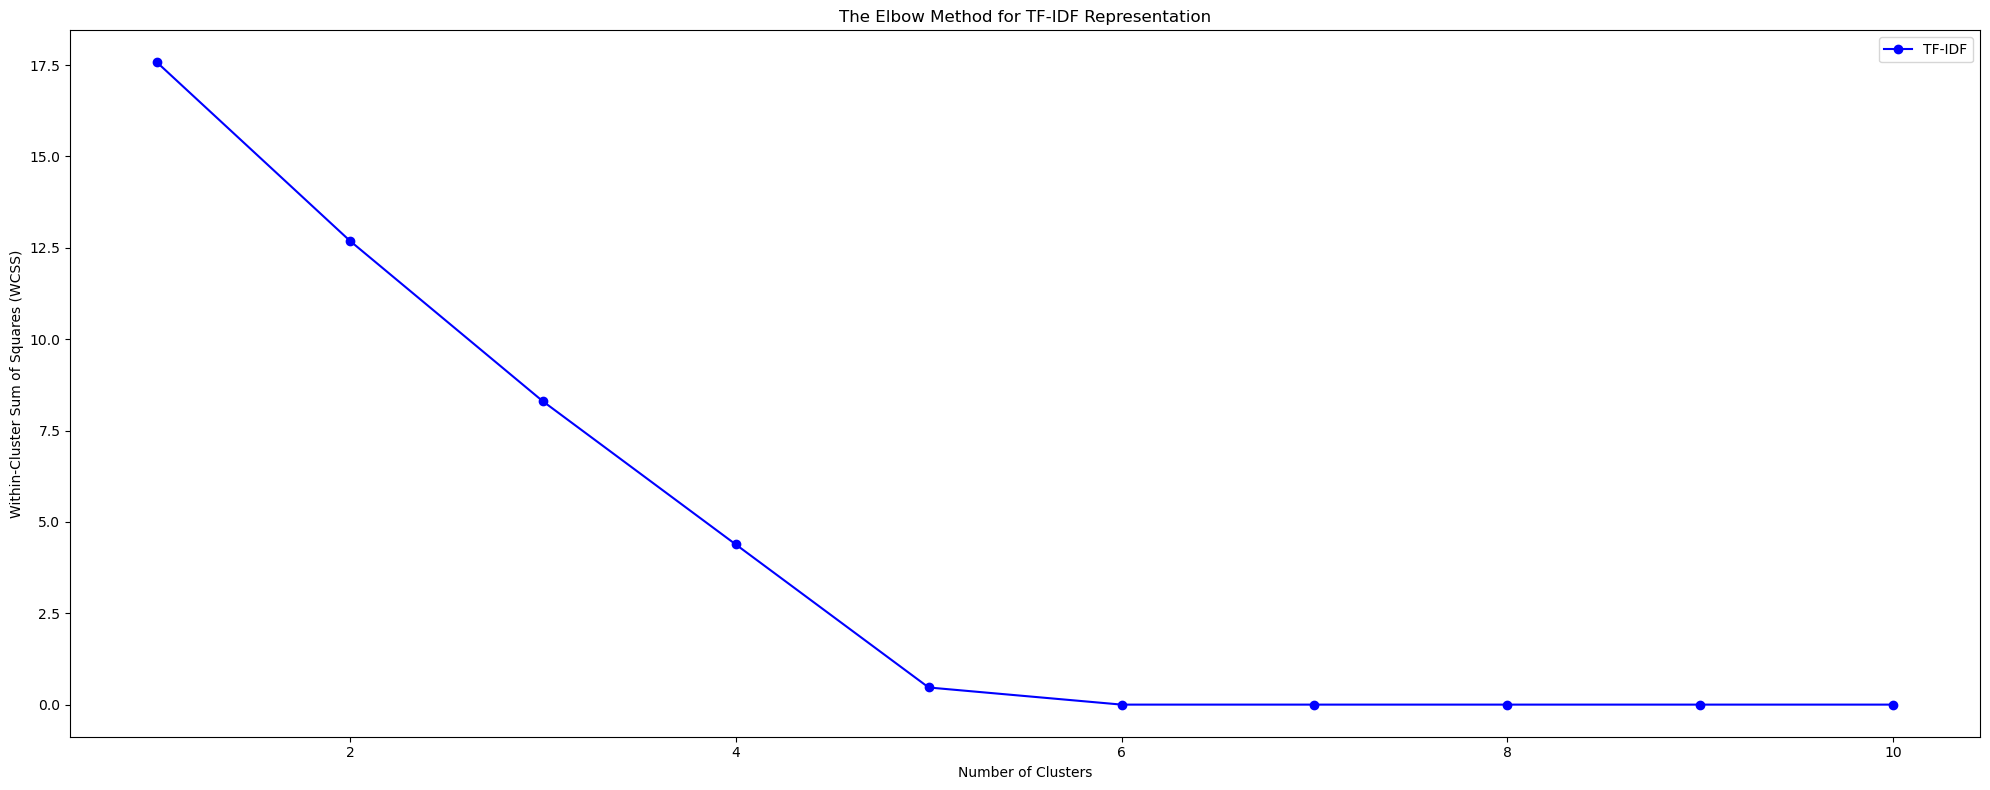

In [55]:
plt.figure(figsize=(20, 8))  # Set a larger figure size for two subplots

# Calculate WCSS for TFIDF
wcss_tfidf = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(n26_cons_matrix)
    wcss_tfidf.append(kmeans.inertia_)

# Plot the elbow curve for TFIDF
plt.plot(range(1, 11), wcss_tfidf, marker='o', color='blue', label='TF-IDF')

# Add labels and title
plt.title('The Elbow Method for TF-IDF Representation')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.legend()
plt.tight_layout()
plt.show()

In [56]:
# Calculate silhouette score
n26_cons_score = silhouette_score(n26_cons_matrix, n26_cons_clusters)
print(f"Silhouette Score: {n26_cons_score}")

Silhouette Score: 0.991173165676349


Regarding the elbow method and silhouette score, **5 clusters were determined as effective for categorizing the negative reviews of N26**, achieving *a silhouette score of approximately 0.99.*

Subsequently, I generated **word clouds** and summarized **the top 5 words for each cluster** *to uncover prevalent topics within the negative feedback from N26’s employees.*

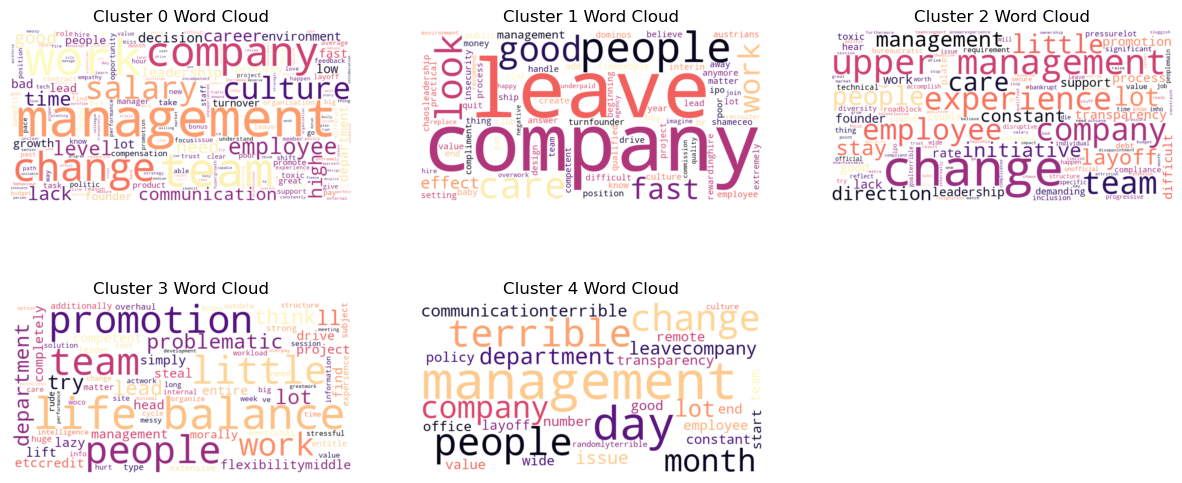

In [57]:
# Combine all text in each cluster into a single string
n26_cons_cluster_texts = ["".join(n26[n26['n26_Cons_cluster'] == i]['Cons_cleaned']) for i in range(n26_cons_num_clusters)]

# Generate word clouds for each cluster
plt.figure(figsize=(15, 10))
for i in range(n26_cons_num_clusters):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap= 'magma').generate(n26_cons_cluster_texts[i])
    plt.subplot(3, 3, i+1)  # Adjust subplot parameters as per your number of clusters
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {i} Word Cloud')
    plt.axis('off')
plt.show()

In [58]:
# Tokenize and preprocess texts in each cluster
n26_cons_cluster_texts = [n26[n26['n26_Cons_cluster'] == i]['Cons_cleaned'] for i in range(n26_cons_num_clusters)]
n26_cons_cluster_keywords = []

for texts in n26_cons_cluster_texts:
    # Concatenate all texts in the cluster
    cluster_text = ' '.join(texts)
    # Tokenize and preprocess the concatenated text
    cluster_tokens = preprocess(cluster_text)
    # Extract unigrams, bigrams, and trigrams
    n = 3  # You can adjust this value to get n-grams of different lengths
    n26_cons_cluster_ngrams = list(ngrams(cluster_tokens, n))
    # Count n-gram frequencies
    ngram_freq = Counter(n26_cons_cluster_ngrams)
    # Select top keywords (you can adjust the number of keywords as needed)
    top_keywords = ngram_freq.most_common(5)  # Select top 10 n-grams
    # Append selected keywords to the cluster_keywords list
    n26_cons_cluster_keywords.append([keyword for keyword, _ in top_keywords])

# Create cluster summaries based on selected keywords
n26_cons_cluster_summaries = []
for i, keywords_list in enumerate(n26_cons_cluster_keywords):
    # Extract only the n-grams from each tuple in keywords_list
    keywords = [' '.join(keyword) for keyword in keywords_list]
    n26_cons_summary = f"Cluster {i} Summary: Individuals in this cluster value {', '.join(keywords)}."
    n26_cons_cluster_summaries.append(n26_cons_summary)

# Print cluster summaries
for n26_cons_summary in n26_cons_cluster_summaries:
    print(n26_cons_summary)

Cluster 0 Summary: Individuals in this cluster value politic work council, high employee turnover, operation department extremely, management crisis high, crisis high turnover.
Cluster 1 Summary: Individuals in this cluster value poor process handle, process handle difficult, handle difficult company, difficult company culture, company culture people.
Cluster 2 Summary: Individuals in this cluster value hear experience upper, experience upper management, upper management toxic, management toxic demanding, toxic demanding couple.
Cluster 3 Summary: Individuals in this cluster value work life balance, little work life, life balance little, balance little flexibility, little flexibility middle.
Cluster 4 Summary: Individuals in this cluster value terrible management lot, management lot people, lot people department, people department leave, department leave company.


As shown, **cluster 0** reflects concerns about *internal politics, high turnover rates, and crises within the management.* **Cluster 1** highlights criticisms on *poor handling of processes*, reflecting *frustration with the company's workflow management and organizational culture*, while **cluster 2** emphasizes *their experiences with upper management*, highlighting *toxicity and demanding behavior* **Cluster 3** points to *lacking of work-life balance and flexibility*. Lastly, **cluster 4** highlights *ineffective management practices and a high rate of turnover within departments.*

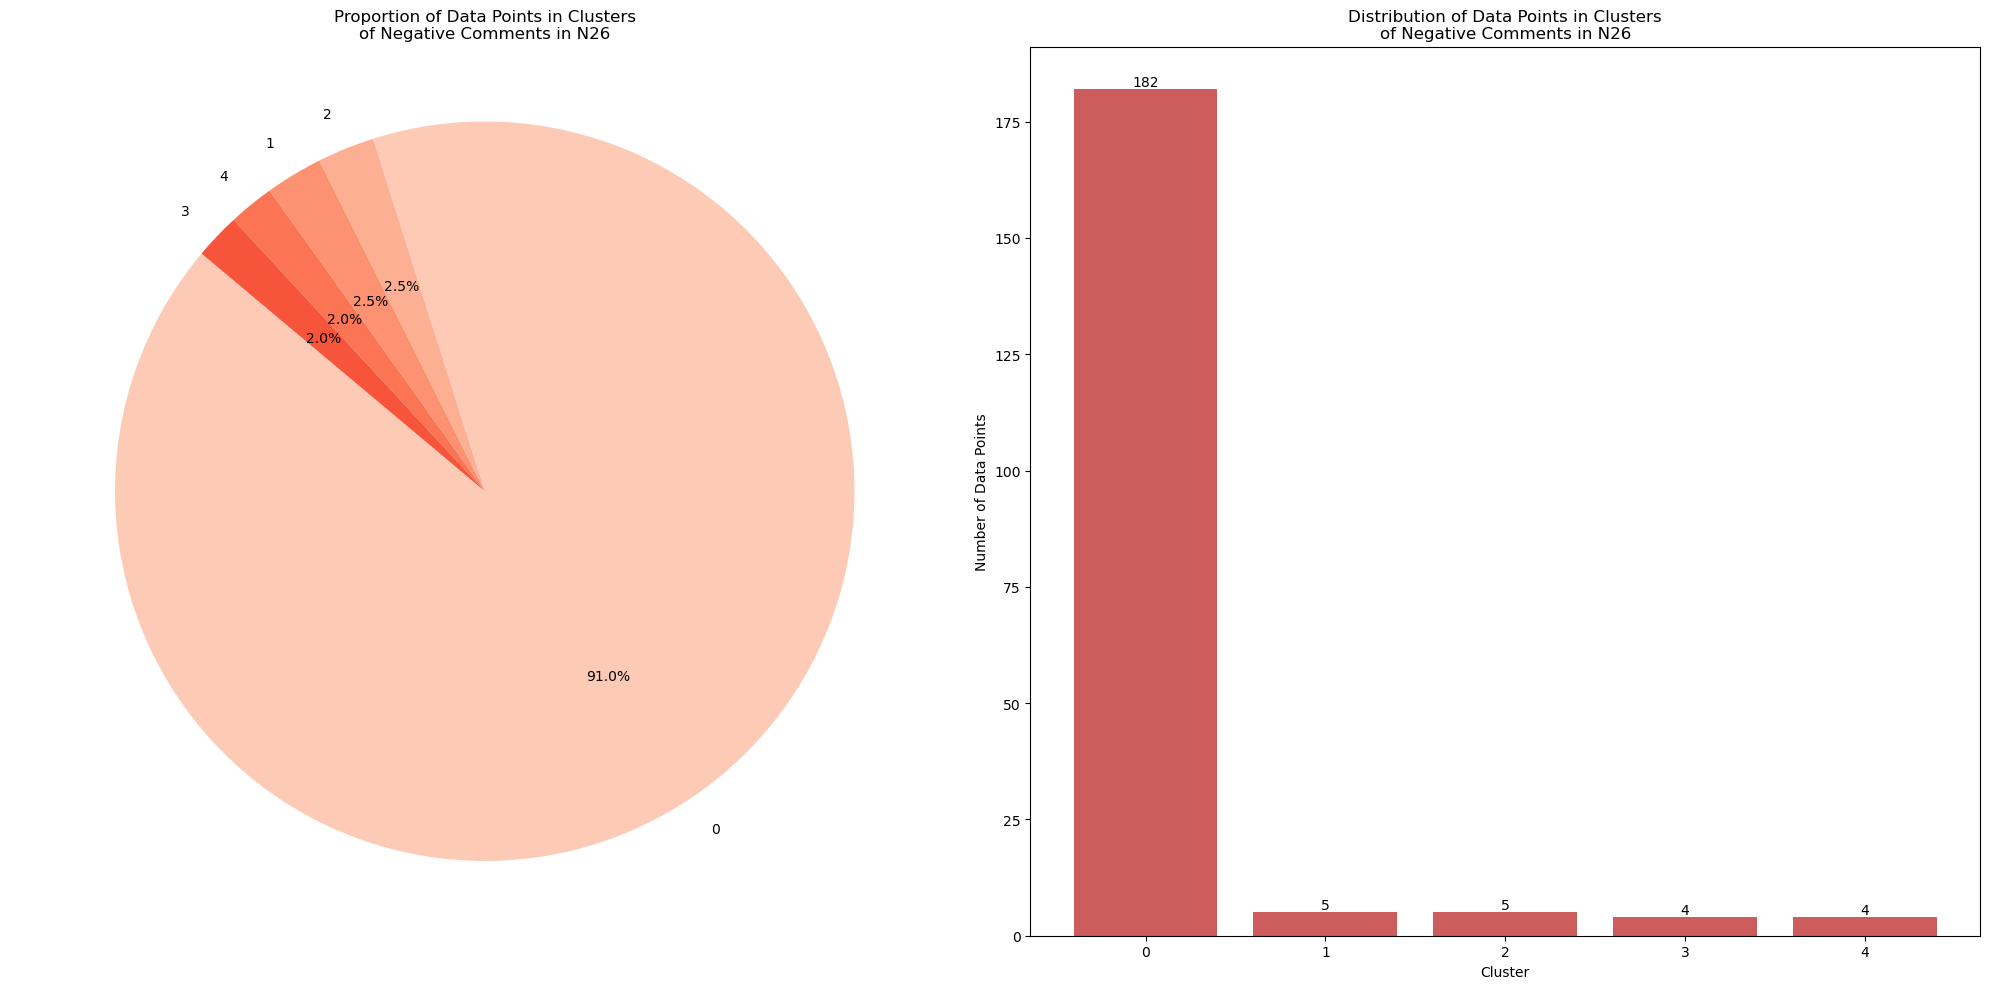

In [59]:
# Count the number of data points in each cluster
n26_cons_cluster_counts = n26['n26_Cons_cluster'].value_counts()

# Define custom colors for the pie chart
red_custom_colors = plt.cm.Reds(np.linspace(0.2, 1, 10))
# Define custom colors for the bar chart
indianred_custom_color = ['indianred' for _ in range(len(n26_cons_cluster_counts))]

# Create a 1x2 subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

# Create a pie chart in the first subplot
axes[0].pie(n26_cons_cluster_counts.values, labels=n26_cons_cluster_counts.index, autopct='%1.1f%%', startangle=140, colors=red_custom_colors)
axes[0].set_title('Proportion of Data Points in Clusters\nof Negative Comments in N26')
axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Create a bar plot in the second subplot
bars = axes[1].bar(n26_cons_cluster_counts.index, n26_cons_cluster_counts.values, color=indianred_custom_color)
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Data Points')
axes[1].set_title('Distribution of Data Points in Clusters\nof Negative Comments in N26')

# Add count and percentage labels on the bar plot
for bar in bars:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval}', ha='center', va='bottom')
    #percent = f'{100 * yval / len(db):.1f}%'
    #axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'({percent})', ha='center', va='top', color='white')

# Adjust the layout so there's no overlap
plt.tight_layout()
plt.show()

It is noticeable that **cluster 0** stands out with the largest share, encompassing **91% or 162 comments**, indicating that employee have concerns regarding *internal politics, high turnover rates, and management crises the most*. This suggests *dissatisfaction with the organizational environment and instability in leadership.*

## 3.4 Employee Sentiment Analysis

For this section, I calculated **the average sentiment scores** for positive (‘Pros_cleaned’) and negative (‘Cons_cleaned’) comments from Deutsche Bank and N26’s employees first.

In [60]:
from textblob import TextBlob
        
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

db['Pros_Sentiment_Cleaned'] = db['Pros_cleaned'].apply(analyze_sentiment)
db['Cons_Sentiment_Cleaned'] = db['Cons_cleaned'].apply(analyze_sentiment)

n26['Pros_Sentiment_Cleaned'] = n26['Pros_cleaned'].apply(analyze_sentiment)
n26['Cons_Sentiment_Cleaned'] = n26['Cons_cleaned'].apply(analyze_sentiment)

# Calculate average sentiment score for Pros_cleaned and Cons_cleaned in both datasets
average_db_pros_sentiment = db['Pros_Sentiment_Cleaned'].mean()
average_db_cons_sentiment = db['Cons_Sentiment_Cleaned'].mean()

average_n26_pros_sentiment = n26['Pros_Sentiment_Cleaned'].mean()
average_n26_cons_sentiment = n26['Cons_Sentiment_Cleaned'].mean()

print("Average Positive Sentiment (Pros_cleaned) for Deutsche Bank:", average_db_pros_sentiment)
print("Average Positive Sentiment (Pros_cleaned) for N26:", average_n26_pros_sentiment)
print("Average Negative Sentiment (Cons_cleaned) for Deutsche Bank:", average_db_cons_sentiment)
print("Average Negative Sentiment (Cons_cleaned) for N26:", average_n26_cons_sentiment)

Average Positive Sentiment (Pros_cleaned) for Deutsche Bank: 0.3794751893939394
Average Positive Sentiment (Pros_cleaned) for N26: 0.3981644866232477
Average Negative Sentiment (Cons_cleaned) for Deutsche Bank: -0.07101827139771993
Average Negative Sentiment (Cons_cleaned) for N26: -0.006574452376800519


As you can see, **the average sentiment scores for the positive reviews ('Pros_cleaned') is** ***higher for N26 (~0.398)*** compared to ***Deutsche Bank (~0.379),*** indicating *a more positive perception of employee satisfaction at N26 in comparison to Deutsche Bank.*

On the negative side,**the average sentiment scores for 'Cons_cleaned' is** ***less negative for N26 (~0.006)*** than for ***Deutsche Bank (~0.071),*** indicating that *negative comments about N26 are less severe or less frequent than Deutsche Bank.*

Then, I created histograms to represent **the distribution of sentiment scores** for positive ('Pros_cleaned') and negative ('Cons_cleaned') comments from employees at Deutsche Bank and N26. ***These distributions can provide a visual comparison of employee satisfaction levels between the two banks.***

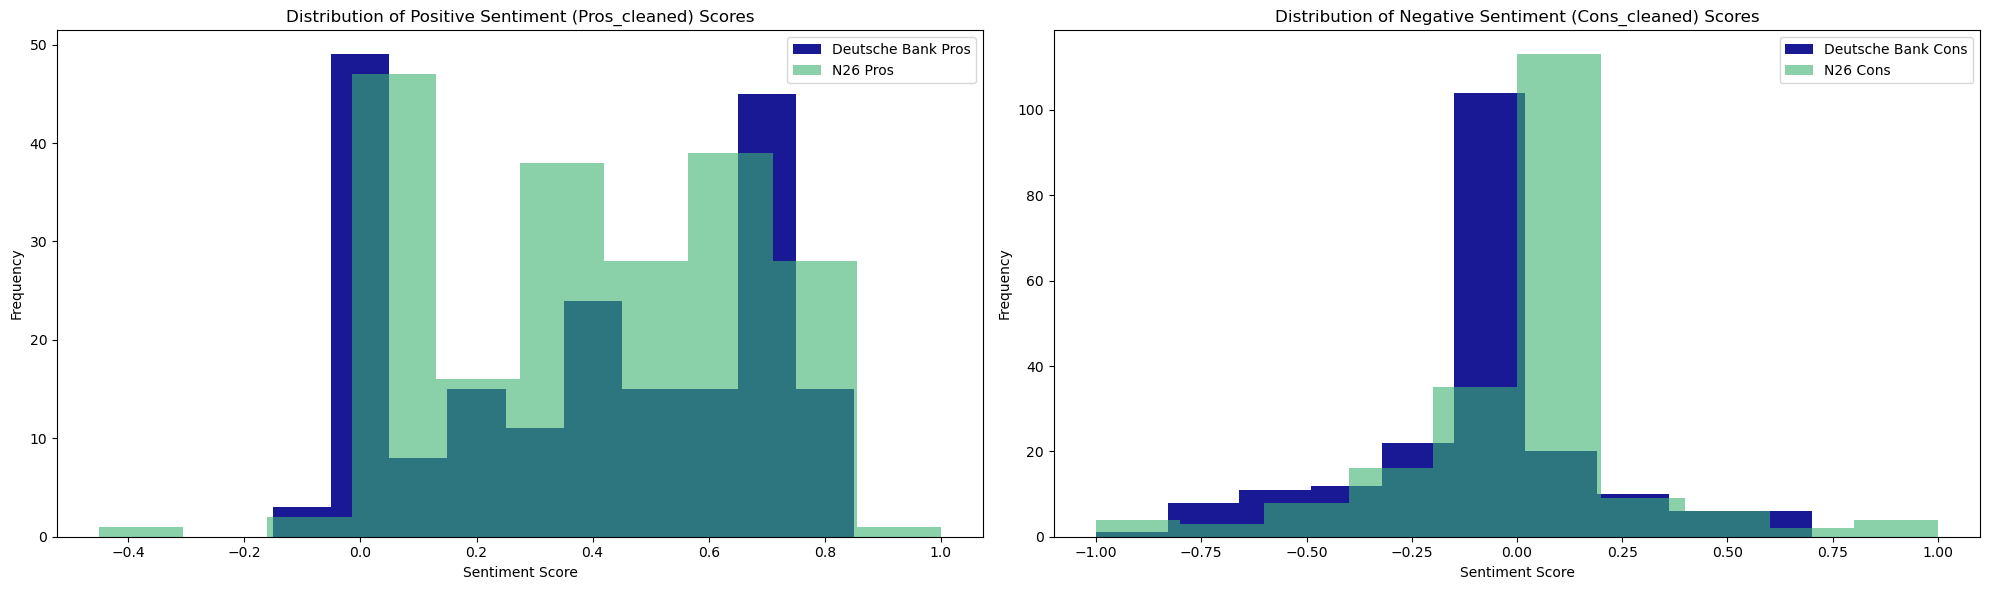

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

# Visualize the distribution of sentiment scores for 'Pros_cleaned' in both datasets
axes[0].hist(db['Pros_Sentiment_Cleaned'], alpha=0.9, color='darkblue', label='Deutsche Bank Pros')
axes[0].hist(n26['Pros_Sentiment_Cleaned'], alpha=0.6, color='mediumseagreen', label='N26 Pros')
axes[0].set_title('Distribution of Positive Sentiment (Pros_cleaned) Scores')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')
axes[0].legend(loc='upper right')

# Visualize the distribution of sentiment scores for 'Cons_cleaned' in both datasets
axes[1].hist(db['Cons_Sentiment_Cleaned'], alpha=0.9, color='darkblue', label='Deutsche Bank Cons')
axes[1].hist(n26['Cons_Sentiment_Cleaned'], alpha=0.6, color='mediumseagreen', label='N26 Cons')
axes[1].set_title('Distribution of Negative Sentiment (Cons_cleaned) Scores')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

In the 'Pros_cleaned' histogram, **N26 having a slight lead in higher positive sentiment.** This suggests that ***N26's employees might be expressing more positive sentiments in their comments.***

On the 'Cons_cleaned' histogram, there is a noticeable difference; **Deutsche Bank has more negative feedback compared to N26.** This could imply that ***issues at Deutsche Bank may be more severe or more frequently mentioned than at N26.***

In next step, I define a function called *‘sentiment_label’* applied to the positive ('Pros_cleaned') and negative ('Cons_cleaned') review columns of both datasets to **analyze sentiment text data and return a sentiment label** ***('positive', 'negative', or 'neutral')*** **based on the polarity score.** The *'sentiment_label'* function categorizes the polarity score of text data into three distinct labels: **'positive'** *if the score is greater than 0,* **'negative'** *if it is less than 0,* and **'neutral'** *if the score is exactly 0.*

In [62]:
def sentiment_label(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

db['Pros_Sentiment_Label'] = db['Pros_cleaned'].apply(sentiment_label)
db['Cons_Sentiment_Label'] = db['Cons_cleaned'].apply(sentiment_label)
n26['Pros_Sentiment_Label'] = n26['Pros_cleaned'].apply(sentiment_label)
n26['Cons_Sentiment_Label'] = n26['Cons_cleaned'].apply(sentiment_label)

Then, I visualize **the distribution of sentiment labels** for both Deutsche Bank and N26 across positive (‘Pro_cleaned’) and negative (‘Cons_cleaned’) reviews. For readability, I set colors by *green* for **'positive'**, *orange* for **'neutral'**, and *red* for **'negative'.**

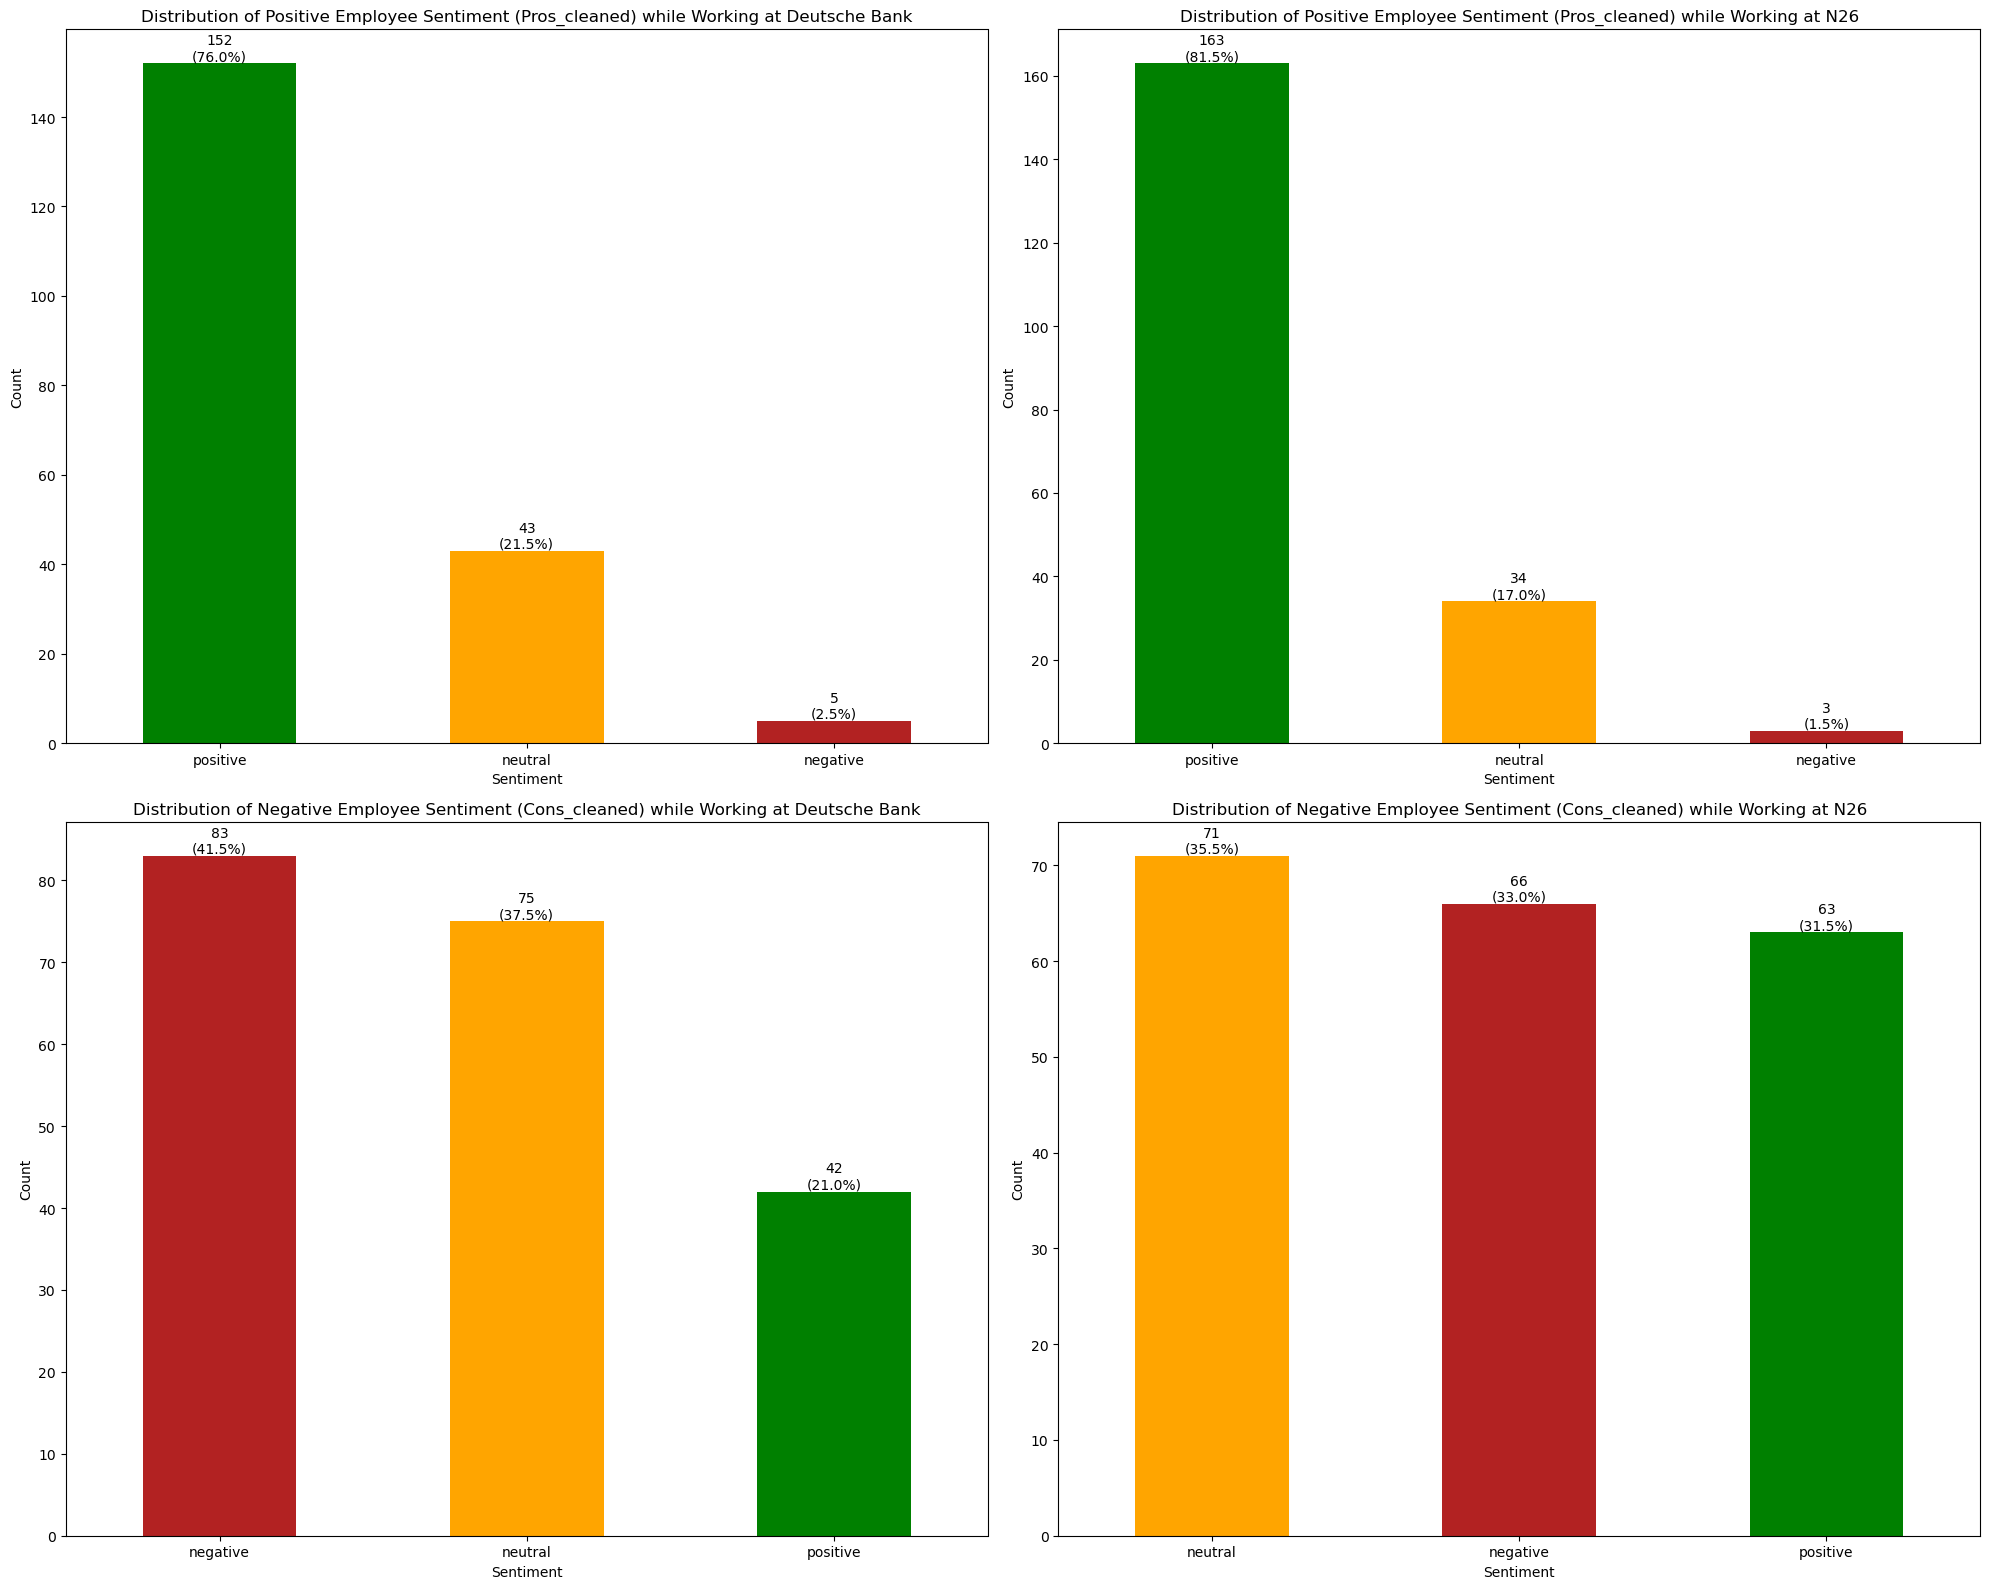

In [63]:
# Count the number of data points in each cluster
db_pros_sentiment = db['Pros_Sentiment_Label'].value_counts()
n26_pros_sentiment = n26['Pros_Sentiment_Label'].value_counts()
db_cons_sentiment = db['Cons_Sentiment_Label'].value_counts()
n26_cons_sentiment = n26['Cons_Sentiment_Label'].value_counts()

# Define custom colors for the bar chart
sentiment_custom_colors = {
    'positive': 'green',
    'neutral': 'orange',
    'negative': 'firebrick'
}

# Create a 2x2 subplot layout
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16))

# Plot the distribution of positive sentiment for Deutsche Bank in the first subplot
db_pros_sentiment.plot(kind='bar', ax=axes[0, 0], color=[sentiment_custom_colors[label] for label in db_pros_sentiment.index])
axes[0, 0].set_title('Distribution of Positive Employee Sentiment (Pros_cleaned) while Working at Deutsche Bank')
axes[0, 0].set_xlabel('Sentiment')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=360)  # Rotate x-axis labels by 360 degrees

# Add count and percentage labels on the bar plot for DB Pros
for index, value in enumerate(db_pros_sentiment.values):
    axes[0, 0].text(index, value, f'{value}\n({value/sum(db_pros_sentiment.values)*100:.1f}%)', ha='center', va='bottom')

# Plot the distribution of positive sentiment for N26 in the second subplot
n26_pros_sentiment.plot(kind='bar', ax=axes[0, 1], color=[sentiment_custom_colors[label] for label in n26_pros_sentiment.index])
axes[0, 1].set_title('Distribution of Positive Employee Sentiment (Pros_cleaned) while Working at N26')
axes[0, 1].set_xlabel('Sentiment')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=360)  # Rotate x-axis labels by 360 degrees

# Add count and percentage labels on the bar plot for N26 Pros
for index, value in enumerate(n26_pros_sentiment.values):
    axes[0, 1].text(index, value, f'{value}\n({value/sum(n26_pros_sentiment.values)*100:.1f}%)', ha='center', va='bottom')

# Plot the distribution of negative sentiment for Deutsche Bank in the third subplot
db_cons_sentiment.plot(kind='bar', ax=axes[1, 0], color=[sentiment_custom_colors[label] for label in db_cons_sentiment.index])
axes[1, 0].set_title('Distribution of Negative Employee Sentiment (Cons_cleaned) while Working at Deutsche Bank')
axes[1, 0].set_xlabel('Sentiment')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=360)  # Rotate x-axis labels by 360 degrees

# Add count and percentage labels on the bar plot for DB Cons
for index, value in enumerate(db_cons_sentiment.values):
    axes[1, 0].text(index, value, f'{value}\n({value/sum(db_cons_sentiment.values)*100:.1f}%)', ha='center', va='bottom')

# Plot the distribution of negative sentiment for N26 in the fourth subplot
n26_cons_sentiment.plot(kind='bar', ax=axes[1, 1], color=[sentiment_custom_colors[label] for label in n26_cons_sentiment.index])
axes[1, 1].set_title('Distribution of Negative Employee Sentiment (Cons_cleaned) while Working at N26')
axes[1, 1].set_xlabel('Sentiment')
axes[1, 1].set_ylabel('Count')
axes[1, 1].tick_params(axis='x', rotation=360)  # Rotate x-axis labels by 360 degrees

# Add count and percentage labels on the bar plot for N26 Cons
for index, value in enumerate(n26_cons_sentiment.values):
    axes[1, 1].text(index, value, f'{value}\n({value/sum(n26_cons_sentiment.values)*100:.1f}%)', ha='center', va='bottom')

# Adjust the layout so there's no overlap
plt.tight_layout()
plt.show()

For the positive reviews, the "Pros_cleaned" chart of Deutsche Bank shows **a large majority of sentiments are positive** (76% or 152 comments), with **a smaller proportion being neutral** *(21.5% or 43 comments)* and **very few negative** *(2.5% or 5 comments)*. Meanwhile, the "Pros_cleaned" chart of N26 also displays **predominantly positive sentiments** *(81.5% or 163 comments)*, accompanied by **a moderate amount of neutral** *(17% or 34 comments)* and **a minimal number of negative sentiments** *(1.5% or 3 comments).*

For the negative side, the "Cons_cleaned" chart of Deutsche Bank presents **a predominant negative sentiment** *(41.5% or 83 comments)*, followed by **a substantial neutral sentiment** *(37.5% or 75 comments)*, and **some positive sentiment** *(21% or 42 comments)*. On the other hand, the "Cons_cleaned" chart of N26 is slightly different to Deutsche Bank's, with **neutral sentiments being the majority** *(35.5% or 71 comments)*, **negative sentiments in the middle** *(33% or 66 comments)*, and **positive sentiments being the least** *(31.5% or 63 comments).*

Overall, it could safely say that **N26’s employees tend to express slightly more positive sentiments compared to those at Deutsche Bank.** However, **the sentiment among Deutsche Bank employees appears to be more negative overall.** Interestingly, ***while the majority of negative comments at Deutsche Bank lean towards a negative sentiment, N26 exhibits a different pattern, with a significant portion of negative comments being perceived as neutral.***

# 4. Results <a id="r"></a>

To achieve my research question ***(how do employee reviews reflect the differences in job satisfaction and organizational culture between traditional banks (Deutsche Bank) and FinTech companies (N26)?)***, I aim to create a comprehensive analysis by initializing a dictionary to track the count of sentiments associated with specific keywords *(salary, benefits, colleague, team, manager, leader, management, work-life balance, culture, environment, promotion, career,  growth, and opportunity).* The sentiments are categorized as positive, neutral, and negative with different keywords, providing ***insights into the sentiment distribution with various work aspects of employee experiences at both Deutsche Bank and N26.***

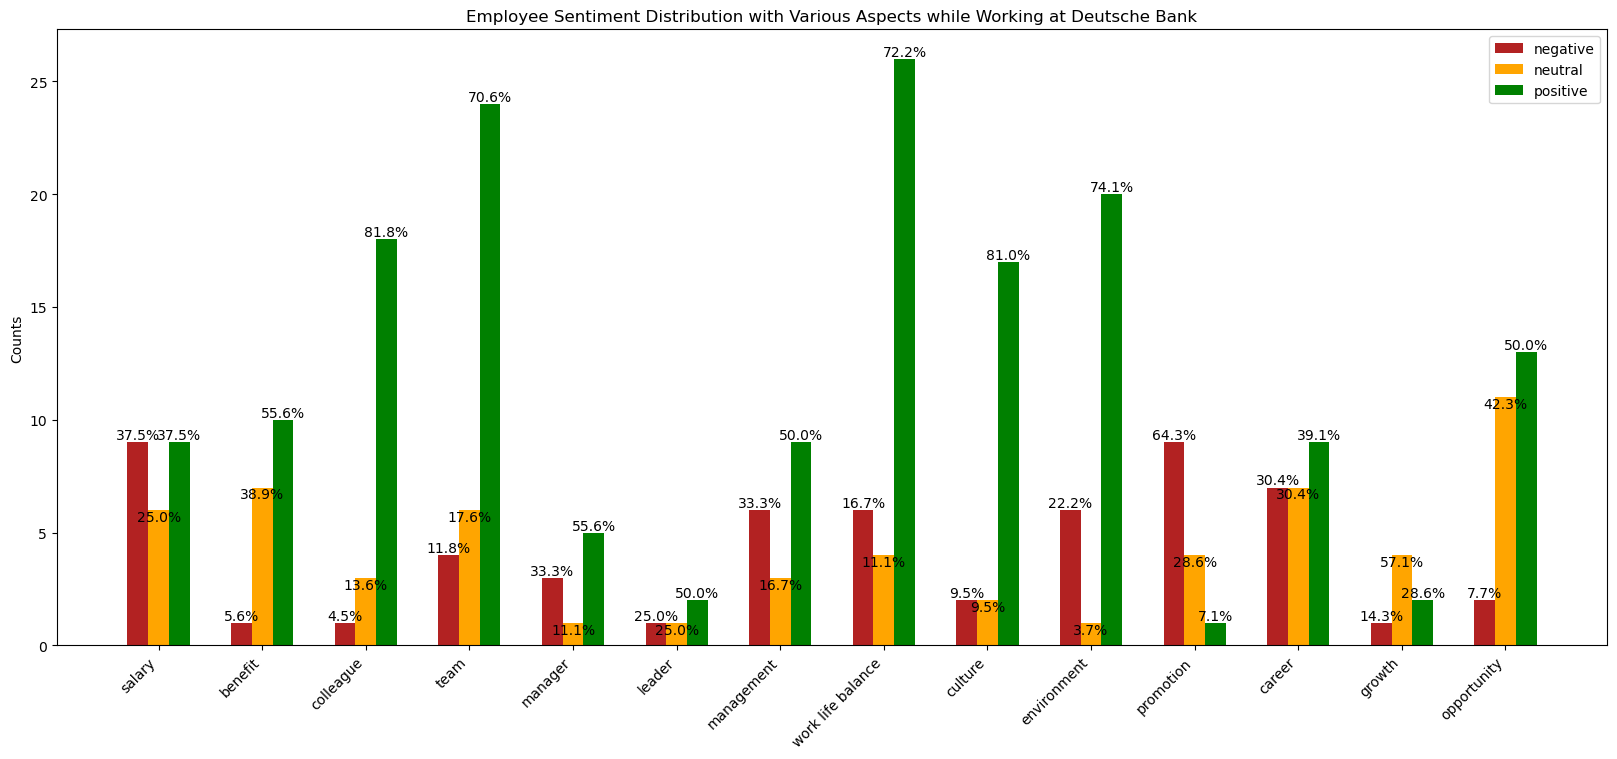

In [64]:
# Keywords to track
keywords = ['salary', 'benefit', 'colleague', 'team', 'manager', 'leader', 'management', 'work life balance', 'culture', 'environment', 'promotion', 'career', 'growth', 'opportunity']

# Initialize a dictionary to hold the count of sentiments by keyword
sentiment_counts = {keyword: {'positive': 0, 'neutral': 0, 'negative': 0} for keyword in keywords}

# Function to update counts
def update_counts(text, sentiment):
    for keyword in keywords:
        if keyword in text.lower():
            sentiment_counts[keyword][sentiment] += 1

# Analyze sentiment and update counts for Deutsche Bank
for index, row in db.iterrows():
    pros_sentiment = sentiment_label(row['Pros_cleaned'])
    cons_sentiment = sentiment_label(row['Cons_cleaned'])
    update_counts(row['Pros_cleaned'], pros_sentiment)
    update_counts(row['Cons_cleaned'], cons_sentiment)

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))

# Plot data
for i, keyword in enumerate(keywords):
    negative_count = sentiment_counts[keyword]['negative']
    neutral_count = sentiment_counts[keyword]['neutral']
    positive_count = sentiment_counts[keyword]['positive']
    
    total_count = negative_count + neutral_count + positive_count
    negative_percentage = (negative_count / total_count) * 100
    neutral_percentage = (neutral_count / total_count) * 100
    positive_percentage = (positive_count / total_count) * 100
    
    ax.bar(i - 0.2, negative_count, width=0.2, color='firebrick', align='center', label='negative' if i == 0 else "")
    ax.bar(i, neutral_count, width=0.2, color='orange', align='center', label='neutral' if i == 0 else "")
    ax.bar(i + 0.2, positive_count, width=0.2, color='green', align='center', label='positive' if i == 0 else "")
    
    ax.text(i - 0.2, negative_count, f'{negative_percentage:.1f}%', ha='center', va='bottom')
    ax.text(i, neutral_count, f'{neutral_percentage:.1f}%', ha='center', va='top')
    ax.text(i + 0.2, positive_count, f'{positive_percentage:.1f}%', ha='center', va='bottom')

# Labels and titles
ax.set_ylabel('Counts')
ax.set_title('Employee Sentiment Distribution with Various Aspects while Working at Deutsche Bank')
ax.set_xticks(range(len(keywords)))
ax.set_xticklabels(keywords, rotation=45, ha='right')
ax.legend()

plt.show()

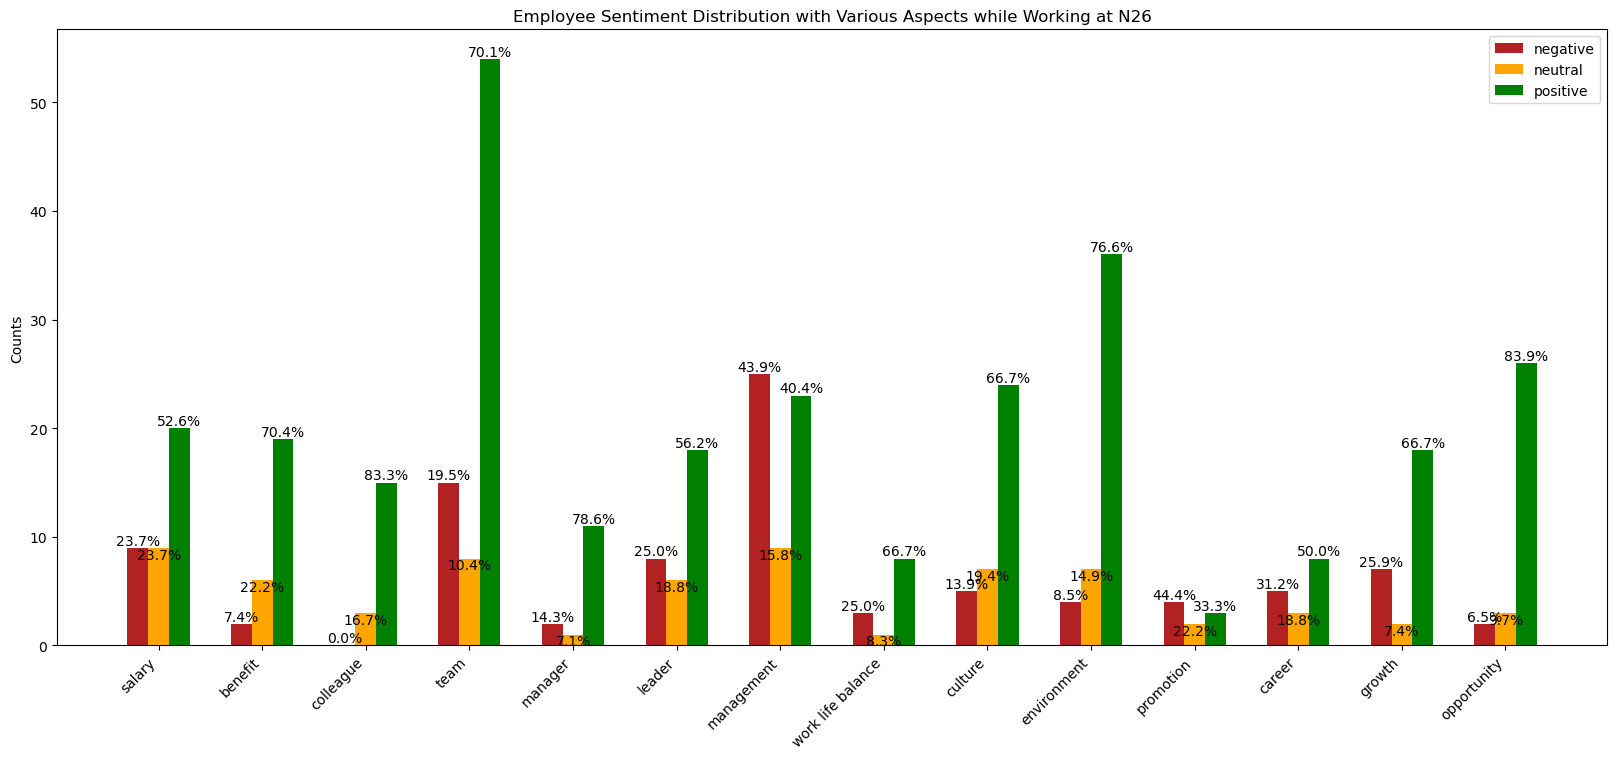

In [65]:
# Keywords to track
keywords = ['salary', 'benefit', 'colleague', 'team', 'manager', 'leader', 'management', 'work life balance', 'culture', 'environment', 'promotion', 'career', 'growth', 'opportunity']

# Initialize a dictionary to hold the count of sentiments by keyword
sentiment_counts = {keyword: {'positive': 0, 'neutral': 0, 'negative': 0} for keyword in keywords}

# Function to update counts
def update_counts(text, sentiment):
    for keyword in keywords:
        if keyword in text.lower():
            sentiment_counts[keyword][sentiment] += 1

# Analyze sentiment and update counts for Deutsche Bank
for index, row in n26.iterrows():
    pros_sentiment = sentiment_label(row['Pros_cleaned'])
    cons_sentiment = sentiment_label(row['Cons_cleaned'])
    update_counts(row['Pros_cleaned'], pros_sentiment)
    update_counts(row['Cons_cleaned'], cons_sentiment)

# Plotting
fig, ax = plt.subplots(figsize=(20, 8))

# Plot data
for i, keyword in enumerate(keywords):
    negative_count = sentiment_counts[keyword]['negative']
    neutral_count = sentiment_counts[keyword]['neutral']
    positive_count = sentiment_counts[keyword]['positive']
    
    total_count = negative_count + neutral_count + positive_count
    negative_percentage = (negative_count / total_count) * 100
    neutral_percentage = (neutral_count / total_count) * 100
    positive_percentage = (positive_count / total_count) * 100
    
    ax.bar(i - 0.2, negative_count, width=0.2, color='firebrick', align='center', label='negative' if i == 0 else "")
    ax.bar(i, neutral_count, width=0.2, color='orange', align='center', label='neutral' if i == 0 else "")
    ax.bar(i + 0.2, positive_count, width=0.2, color='green', align='center', label='positive' if i == 0 else "")
    
    ax.text(i - 0.2, negative_count, f'{negative_percentage:.1f}%', ha='center', va='bottom')
    ax.text(i, neutral_count, f'{neutral_percentage:.1f}%', ha='center', va='top')
    ax.text(i + 0.2, positive_count, f'{positive_percentage:.1f}%', ha='center', va='bottom')

# Labels and titles
ax.set_ylabel('Counts')
ax.set_title('Employee Sentiment Distribution with Various Aspects while Working at N26')
ax.set_xticks(range(len(keywords)))
ax.set_xticklabels(keywords, rotation=45, ha='right')
ax.legend()

plt.show()

To compare employee sentiment between traditional banks (Deutsche Bank) and FinTech companies (N26), it is essential to consider various work aspects that may differ between the two types of organizations as follows:  

**(1)	Compensation** (‘salary’ and ‘benefit’): 
    At Deutsche Bank, the sentiment towards **‘benefit’** leans *predominantly positive, with approximately 55.6% of comments expressing satisfaction.* However, the sentiment spread for **‘salary’** appears *more balanced, with around 37.5% of comments being positive and negative,* suggesting ***potential variations based on factors such as work experience and job positions.*** In contrast, N26 employees *overwhelmingly express positive sentiments* regarding both **‘salary’** *(approximately  52.6%)* and **‘benefits’** *(around 70.4%).* This indicates ***a notable difference in employee perception between the two organizations, with N26's compensation structures being well-received and potentially contributing to a positive organizational culture.*** The higher satisfaction levels at N26 may reflect a strategic emphasis on competitive and appealing remuneration packages to attract and retain talent in the rapidly evolving FinTech industry.

**(2)	Collaboration** (‘colleague’ and ‘team’): 
    Both companies exhibit *a notably strong positive sentiment* towards both the **‘colleague’** and **‘team’** aspects, with *approximately 81.8% and 83.3% of comments expressing satisfaction* with **‘colleagues’**, and *around 70.6% and 70.1% showing positivity* towards **‘teamwork’** at Deutsche Bank and N26, respectively. These findings reflect ***a cohesive and supportive workplace culture characterized by peer support, teamwork, and collaboration in both organizations.*** However, it is noticeable that while the sentiment towards **‘team’** remains predominantly positive, there are some amount of negative and neutral sentiments across both companies. This nuanced sentiment distribution may indicate ***potential variations in individual relationships or experiences among staff members within the team dynamics.***

**(3)	Management and Leadership** (‘manager’, ‘leader’, and ‘management’): 
    Both companies exhibit *a predominantly positive sentiment* towards the **‘manager’** and **‘leader’** aspects, with *approximately 55.6% and 78.6% of comments expressing satisfaction* with **‘manager’**, and *around 50% and 56.2% showing positivity* towards **‘leader’** at Deutsche Bank and N26, respectively. However, there is *a notable presence of negative sentiment* towards **‘manager’**, accounting for *around 33.3% at Deutsche Bank*, and towards **‘leader’**, with *25% at N26*.* This suggests ***a diverse employee experience that may correlate with different management levels or styles within each organization.*** While the majority of employees may express satisfaction with their leaders, the presence of negative feedback highlights the need for potential improvements, such as refining leadership practices or addressing specific concerns raised by employees. In contrast, N26 displays *a higher level of negative sentiment, with approximately 43.9%* in **‘management’** aspect compared to Deutsche Bank. This disparity may indicate ***challenges or dissatisfaction among N26 employees regarding leadership practices or organizational management structures.*** It suggests areas where N26 could focus on implementing strategies, such as fostering open communication channels between management and employees to foster a more positive and supportive work environment that aligns with the innovative and dynamic culture typically associated with FinTech companies.

**(4)	Work-Life Balance** (‘work life balance’): 
    Both companies tend to exhibit *a strong positive sentiment* in the **‘work life balance’** aspect, with interestingly *Deutsche Bank showing a significantly higher level of positivity compared to N26, around 72.2% and 66.7%, respectively.* This suggests that ***employees at Deutsche Bank may perceive the organization as placing a greater emphasis on promoting and maintaining a healthy work-life balance compared to their counterparts at N26.*** The higher level of positivity in this aspect at Deutsche Bank may indicate that the traditional bank has implemented effective policies, practices, and initiatives to support employees in achieving a satisfactory balance between their professional and personal lives.

**(5)	Company Culture** (‘culture’ and ‘environment’): 
    Employees of both companies perceive *significantly positive sentiment* in the **‘culture’** and **‘environment’**, with *approximately 81% and 66.7% of comments expressing satisfaction with* **‘culture’**, and *around 74.1% and 76.6% showing positivity* towards **‘environment’** at Deutsche Bank and N26, respectively. This indicates that ***employees feel supported, valued, and comfortable in their respective work settings at both organizations.***

**(6)	Career Progression** (‘promotion’, ‘career’, ‘growth’, and ‘opportunity’): 
    At Deutsche Bank, the sentiment regarding career opportunities seems more mixed, with a considerable number of employees reporting neutral experiences. The distribution of sentiments is fairly even across positive, neutral, and negative, which suggests that experiences with career opportunities may vary widely among employees. For instance, while the **‘career’** and **‘opportunity’** aspects show *positivity in sentiment, around 39.1% and 50%*, respectively, the sentiment towards **‘growth’** appears *to be neutral, with approximately 57.1%.* Notably, the aspect of **‘promotion’** exhibits *a significantly high level of negativity, around 64.3%.* This could indicate that ***while employees at Deutsche Bank may perceive opportunities for career advancement, there could be perceived barriers or inconsistencies in the process or availability of promotions, leading to dissatisfaction or frustration among some employees.*** 
    For N26, there is *a significantly higher proportion of positive sentiments* related to the **‘career’, ‘growth',** and **‘opportunity’** aspects, with *approximately 50%, 66.7%, and 83.9%*, respectively, except **‘promotion’**, which shows *a higher prevalence of negative sentiment, at around 44.4%.* The majority of employees have shared positive reviews, indicating ***a strong culture of promoting career growth and providing opportunities within the FinTech company.*** The low percentage of negative sentiment might suggest that ***barriers to career advancement are less common, or that such issues are not as impactful on employees' perceptions of their career opportunities at N26.***
    Overall, N26 appears to have a more favorable employee perception of career opportunities when compared to Deutsche Bank. The high positive sentiment at N26 could be reflective of a dynamic, growth-oriented culture often found in FinTech startups, which may provide more agility and openness to employee advancement. In contrast, the more traditional and possibly hierarchical structure at Deutsche Bank might contribute to the mixed feelings, as progression may be seen as more rigid or conventional.

# 5. Conclusion, Limitations, and Outlook <a id="clo"></a>

## 5.1 Conclusion


In summary, my analysis of employee reviews provides clear differences in job satisfaction and organizational culture between Deutsche Bank, a traditional bank, and N26, a FinTech company. While both exhibit strengths in collaboration, work-life balance, and company culture, distinct perceptions emerge in compensation and career progression. N26 employees express predominantly positivity towards salary, benefits, and career opportunities, reflecting a robust emphasis on competitive compensation and a growth-oriented culture. In contrast, while Deutsche Bank receives favorable feedback on benefits, sentiments towards salary are more nuanced, suggesting potential variations in compensation satisfaction. Additionally, perceptions of management and leadership differ, with Deutsche Bank generally exhibiting higher satisfaction levels. Conversely, negative sentiment towards management is more prevalent at N26, suggesting potential challenges in leadership practices. Overall, these insights underscore the imperative for traditional banks to adapt to changing employee expectations and industry dynamics to enhance job satisfaction and foster a positive organizational culture, aligning with the practices seen in innovative FinTech companies like N26.

## 5.2 Limitations

However, I acknowledge that these findings may not completely represent the experiences of all employees within traditional banks and FinTech companies. Therefore, it is essential to consider the following limitations.

**(1)	Bias in Reviews:** Glassdoor reviews may be biased, as extreme opinions are more likely to be expressed, potentially skewing the analysis.

**(2)	Temporal Considerations:** Employee sentiments can change over time due to various factors. Analyzing reviews at a single point may not capture these variations adequately. 

**(3)	Data Quality:** Data reliability from Glassdoor reviews varies, and automated sentiment analysis may not always accurately capture nuances.

**(4)	Generalizability:** Findings from Deutsche Bank and N26 reviews may not apply to all traditional banks or FinTech firms in Germany due to factors like organizational culture and location.

**(5)	Limited Scope:** Reviews from Glassdoor may not capture all work aspects of the employee experience such as attitudes toward innovation and technology adoption, including diversity and inclusion efforts.

Addressing these limitations will lead to a more comprehensive assessment of the project's constraints and considerations.

## 5.3 Outlook

To conduct a more comprehensive comparative analysis, it is valuable to explore additional methods for further research and to consider the potential applications of the findings.

**(1)	Further Comparative Analysis:** Including more traditional banks and FinTech firms in diverse regions or similar market scales can provide a broader perspective on job satisfaction and organizational culture in Germany's banking sector.

**(2)	Longitudinal Study:** Tracking changes in employee sentiment over time within Deutsche Bank and N26 could reveal trends or patterns in job satisfaction and organizational culture evolution.

**(3)	Impact of External Factors:** Exploring how regulations, market trends, and technological advancements interact with job satisfaction and organizational culture can enhance the interpretation of findings.

**(4)	Employee Retention and Performance:** Analyzing the relationship between employee sentiment, retention rates, and performance metrics could provide actionable insights for human resource management.

**(5)	Cross-Cultural Analysis:** Conducting cross-cultural analyses on job satisfaction between traditional banks and FinTech companies can assess the impact of cultural factors across diverse contexts.

Exploring these methods can provide valuable insights into job satisfaction, organizational culture, and employee sentiment within the banking sector.

## 6 References <a id="ref"></a>

Bordoloi, M., & Biswas, S. K. (2023). Sentiment analysis: A survey on design framework, applications and future scopes. Artificial intelligence review, 1–56. *Advance online publication*. [https://doi.org/10.1007/s10462-023-10442-2](https://doi.org/10.1007/s10462-023-10442-2)

Chin, Chiew. (2020). Text Analytics On Company Reviews In Jobstreet. *European Proceedings of Social and Behavioural Sciences*. [https://www.researchgate.net/publication/340293535_Text_Analytics_On_Company_Reviews_In_Jobstreet](https://www.researchgate.net/publication/340293535_Text_Analytics_On_Company_Reviews_In_Jobstreet)

Feng, S. (2023). Job satisfaction, management sentiment, and financial performance: Text analysis with job reviews from indeed.com. *International Journal of Information Management Data Insights*. [https://www.sciencedirect.com/science/article/pii/S2667096823000022](https://www.sciencedirect.com/science/article/pii/S2667096823000022#section-cited-by) 

Frank, F. F., & Whittle, T. E. (n.d.). Predicting company ratings through Glassdoor Reviews. *Department of Management Science and Engineering Stanford University*. [https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/reports/6880837.pdf](https://web.stanford.edu/class/archive/cs/cs224n/cs224n.1184/reports/6880837.pdf)

H. Yadav, K. Dwivedi and G. Abirami. (2022). Sentiment Analysis of company reviews using Machine Learning. *2022 3rd International Conference for Emerging Technology (INCET), Belgaum, India*. [https://ieeexplore.ieee.org/document/9824505](https://ieeexplore.ieee.org/document/9824505)

Höllig, C. E. (2021). Online Employer Reviews: Text-Mining Analyses of Contents, Effects, and Employer Responsiveness. *TUM School of Management*. [https://mediatum.ub.tum.de/doc/1594000/1594000.pdf](https://mediatum.ub.tum.de/doc/1594000/1594000.pdf)

Jung, Y., & Suh, Y. (2019). Mining the voice of employees: A text mining approach to identifying and analyzing job satisfaction factors from online employee reviews. *Decis. Support Syst., 123*. [https://api.semanticscholar.org/CorpusID:196185822](https://api.semanticscholar.org/CorpusID:196185822)

Luo, N., Zhou, Y., & Shon, J. (2016). Employee Satisfaction and Corporate Performance: Mining Employee Reviews on Glassdoor.com. *International Conference on Interaction Sciences*. [https://core.ac.uk/download/pdf/301370386.pdf](https://core.ac.uk/download/pdf/301370386.pdf)

Martinez, L. D. (2019). Improving employee satisfaction through text analytics. *SESUG Paper*. [https://www.lexjansen.com/sesug/2019/SESUG2019_Paper-243_Final_PDF.pdf](https://www.lexjansen.com/sesug/2019/SESUG2019_Paper-243_Final_PDF.pdf)

Morshed Adib, Muhammed & Chakraborty, Sovon & Waishy, Mashiwat & Mehedi, Md Humaion Kabir & Rasel, Annajiat Alim. (2023). BiLSTM-ANN Based Employee Job Satisfaction Analysis from Glassdoor Data Using Web Scraping. *Procedia Computer Science*. [https://www.researchgate.net/publication/373570703_BiLSTM-ANN_Based_Employee_Job_Satisfaction_Analysis_from_Glassdoor_Data_Using_Web_Scraping](https://www.researchgate.net/publication/373570703_BiLSTM-ANN_Based_Employee_Job_Satisfaction_Analysis_from_Glassdoor_Data_Using_Web_Scraping)

Ramanathan, V. & Thirunavukkarasu, M. (2019). Prediction of Individual’s Character in Social Media Using Contextual Semantic Sentiment Analysis. Mobile Networks and Applications. 24. [https://doi.org/10.1007/s11036-019-01388-3](https://doi.org/10.1007/s11036-019-01388-3)

Uchida, E., Kino, Y. (2021). Study on the relationship between employee satisfaction and corporate performance in Japan via text mining. *Procedia Computer Science*.  [https://www.sciencedirect.com/science/article/pii/S1877050921016732](https://www.sciencedirect.com/science/article/pii/S1877050921016732) 

Uyeno, L. (2020). An empirical analysis of company culture: Using Glassdoor data to measure the impact of culture and employee satisfaction on performance. *Scholarship @ Claremont*. [https://scholarship.claremont.edu/cmc_theses/2293/](https://scholarship.claremont.edu/cmc_theses/2293/)

Young, L. M., & Gavade, S. R. (2018). Translating emotional insights from hospitality employees’ comments: Using sentiment analysis to understand job satisfaction. *International Hospitality Review*. [https://www.emerald.com/insight/content/doi/10.1108/IHR-08-2018-0007/full/html](https://www.emerald.com/insight/content/doi/10.1108/IHR-08-2018-0007/full/html)